In [1]:
# One-time install
# !conda install -c conda-forge wordcloud 


In [2]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('df_Final.csv', sep = '\t')

In [3]:
df.head(5)

Unnamed: 0             business_id  \
0           0  --9e1ONYQuAa-CB_Rrw7Tw   
1           1  --cZ6Hhc9F7VkKXxHMVZSQ   
2           2  -050d_XIor1NpCuWkbIVaQ   
3           3  -1VaIJza42Hjev6ukacCNg   
4           4  -1xuC540Nycht_iWFeJ-dw   

                                             reviews       city state  \
0  There's a reason why Emeril Lagasse is such a ...  Las Vegas    NV   
1  Listen, I could write all kinds of words and t...  Charlotte    NC   
2  Love this spot - it's pretty close to the conv...    Phoenix    AZ   
3  The Surprise location is our normal stop, and ...  El Mirage    AZ   
4  Excellent poulet, mais les frites étaient un p...   Montréal    QC   

    latitude   longitude      monday     tuesday   wednesday    thursday  \
0  36.123183 -115.169190  11:30-14:0  11:30-14:0  11:30-14:0  11:30-14:0   
1  35.199853  -80.844820   11:0-22:0   11:0-22:0   11:0-22:0   11:0-22:0   
2  33.456696 -112.072327        None  14:30-6:30  14:30-6:30  14:30-6:30   
3  33.617436 -112.324297   11:0-20:0   11:0-20:0   11:0-20:0   11:0-20:0   
4  45.519310  -73.580749   6:30-21:0   6:30-21:0   6:30-21:0   6:30-22:0   

       friday    saturday      sunday  
0  11:30-14:0  11:30-14:0  11:30-14:0  
1   11:0-22:0   11:0-22:0   12:0-21:0  
2  14:30-6:30  14:30-6:30        None  
3   11:0-21:0   11:0-21:0    9:0-16:0  
4   6:30-22:0   6:30-22:0   6:30-21:0

In [4]:
list_of_words = []
# Convert column to just strings
df['reviews'] = df['reviews'].astype(str)

# Removing Quotations from Restaurant Name
df['reviews'] = [i.replace('"', '') for i in df['reviews']]

In [5]:
# Loop through each review
for name in df['reviews']:
    # Split the review into a list of words called 'words'
    words = name.split()
    # Loop through each word in 'words'
    for word in words:
        word = word.strip()
        word = word.lower()
        list_of_words.append(word)

In [6]:
len(list_of_words)

18670426

In [7]:
## Write out into output file while adding a space between each word
with open("test.txt", "w", encoding='utf-8') as output:
    line = " ".join(list_of_words)
    output.write(line)

In [8]:
# Open txt file
text = open('test.txt', encoding = 'utf-8').read()



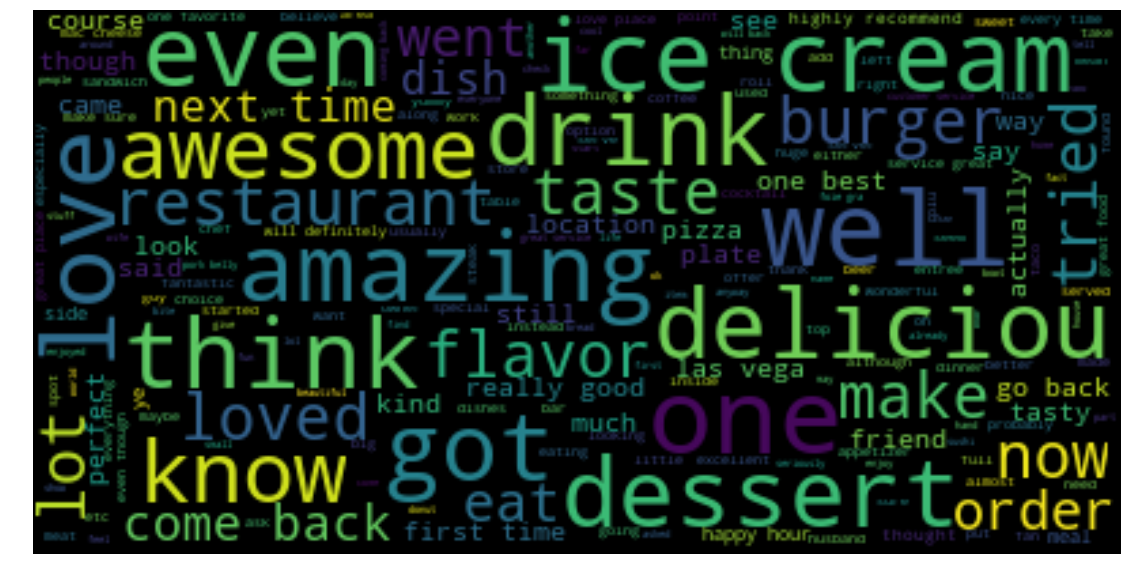

In [9]:
# 'collocations = False ' means that it will get rid of words that are frequently grouped together
# like 'oh oh' or 'beautiful place'. Otherwise you might have words that appear several times
# collocations = False' is an attribute that goes inside WordCloud(_____).generate(text)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
from collections import Counter
file = open('test.txt', encoding = 'utf-8')
wordcount = Counter(file.read().split())

In [11]:
for item in wordcount.items(): print("{}\t{}".format(*item))

there's	7791
a	488480
reason	2336
why	5543
emeril	44
lagasse	4
is	236931
such	8231
celebrated	179
chef.	319
his	9607
restaurant,	2332
delmonico	98
steakhouse,	145
provided	1132
impeccable	582
service	29607
and	651104
outstanding	1333
food.	9585
steakhouse	933
was	299117
our	53707
big	11172
dinner	12337
out	47210
in	206671
vegas	11670
for	194994
bachelorette	242
weekend.	653
9	780
of	320742
us	23750
were	91218
promptly	783
seated	4801
7:30pm	39
sunday	2940
reservation.	577
i	456709
ordered	29828
glass	3557
malbec	82
(my	822
favorite,	686
which	43799
rather	2225
had	99521
to	387413
find).	7
as	85338
table,	1382
we	145914
shared	3860
the	954365
bbq	4504
shrimp	6778
(which	2553
just	59059
right	16357
hit	3383
smokey	470
sweet),	22
truffle	2754
parm	290
potato	5305
chips	3712
(uberly	1
addictive)	3
lettuce	1187
wedge	364
salad.	2728
my	153959
entrée,	93
decided	8527
get	48808
bone	1839
ribeye-the	1
house	6378
specialty.	48
it	208090
did	14013
not	76604
disappoint.	1159
quite	8963
large	8814

heirloom	340
tomato	3403
burrata	278
cheese,	4083
onion,	721
extra	5253
virgin	143
oil,	497
balsamic	804
vinegar	572
torn	175
local	5719
basil.	182
sad	1062
compared	1362
tomatoes,	1057
2.	1105
butternut	399
squash	798
ravioli	683
sage	422
brown	1702
butter,	845
toasted	1546
hazelnuts	79
parmesan	1211
omg!	359
divine.	623
definitely	27326
again.	2929
3.	930
grilled	6177
marinated	1015
organic	1108
breast	651
potatoes,	1198
garlic,	605
natural	732
ate	5150
said	7410
flavor.	3764
4.	676
w\/	1919
twice	2192
baked	3848
(with	860
vermont	49
cheddar)	9
caesar	1029
mouth!	284
5.	570
surf	314
turf-	4
crab	5484
buttered	236
asparagus,	383
believe.	139
see	12665
menu,	3649
special)	47
cleaned	312
plate.	1452
desserts:	94
layer	660
cake	6051
pudding,	294
coconut	2741
almonds	262
amazing!	3416
pecan	740
oatmeal	387
shortbread	110
crust	2895
french,	112
vanilla	2650
shape	210
circle,	10
center	1278
ooey	95
gooey	563
yummy!!	101
price	5715
$300+	5
including	3112
tip).	40
outstanding!	332
actually	81

delmonico...).	1
altho	8
greasy	847
alll	10
runners	49
atmosphere	5385
steakhouses	266
wasnt	191
stuck	802
relaxed	627
heading	657
suggested	1537
tho	129
picky	701
tryin	3
decide	1387
desserts	2738
candle	257
boys	403
near	3510
$450	8
(5	197
$45-$55)	1
f	117
$190	8
hahahah	5
meal...in	1
atmosphere!	112
need	8512
+	2129
wine.,	32
notch	1053
connoisseur's	3
paradise.	84
booked	374
7-7:30	1
rush.	212
service-	73
carte.i	1
cant	704
underdressed	26
venue.	109
insane	223
on.	2032
rare.	395
leaving	993
dessert.	2461
exceptional,	127
especially	5747
claim	228
fame	73
pie!,	17
experience!	585
staff,	1085
cocktails,	507
dressings	99
goodness	1494
surprised	2807
lack	654
that,	2097
goodness'	2
sakes.	15
liven	15
decor	3965
bit!	35
go,	1189
please.	318
won't	4111
regret	1332
wow!	1305
money,	205
marbled,	17
rare-medium-rare.	1
slivers	74
oyster	1120
eerily	12
reminiscent	283
n.o.)	1
chili	2457
tasty.	3249
fred	39
flintstone	15
size	4135
dipped	662
whoa,	31
rush	756
dessert?	57
how.	16
polly	2
mari

remoulade	44
onthe	3
oh,	1652
behind.	90
complaints:	7
restrooms	164
miles	605
disabled	5
hard.	197
interior:	17
stark	37
white,	207
white.	87
alcoves	5
built	351
walls--	1
empty!	24
art,	147
color,	71
whimsy,	3
knick	36
knacks	19
(except	174
burgundy	76
rims	4
china).	2
medical	72
setting--	1
inviting	520
supposed	656
cave.	17
way...	52
bothered	106
setting,	164
ruined	164
mood	1274
a+	278
day!,	134
appetizer:	116
ahi!	4
ribeye!	10
quest	133
america	169
wandered	171
delmonicos	5
magnificent!	26
2001	18
odyssey	3
's	28
discovery	113
universe	41
also!	79
largest	270
needs	1167
butter?	35
(key	5
!),	8
through,	135
vs	248
trudged	5
eat,	725
hundred	155
pounds	210
heavier	130
evening!	68
steak....	8
steak?	30
else.....	2
dare!,	1
drowned	63
washed	232
poppy	110
more.,	255
fourth	192
july	188
below	352
sip	531
level.	497
cappacio	1
halibut,	79
walnut	461
place!,	624
man..	10
drooling	320
(courtesy	9
dearest	20
hubby).	6
theme	464
orleans\/cajun	1
inspired.	35
ordered,	454
ox	119
thingies,	5

lion.	8
kids'	42
fare	445
fingers,	84
leg,	48
frankfurter	1
nother	10
soon,	228
kids.,	26
puerto	54
rican	36
english	832
choppy.	2
patient.	108
sangria.	136
authentic	2861
check.	389
sometimes	2378
groupon.,	3
labor	97
#5	40
#20.	2
bright.	68
backed	91
there:	33
tomatoey	22
squid	497
campestre	1
combo,	213
stuffed.	305
frozen	1852
smoothies	363
comfort	1095
good.,	594
yayy	2
food!	1727
specialize	125
get,	291
normally,	136
afraid	512
luckily,	429
in-house,	46
plantain.	12
plantain	105
kinds,	29
ripe,	18
fried,	344
depends	172
preference,	49
cultural,	2
homey	314
vibe.	697
paintings,	24
family-owned	80
area!,	173
jewel--but	1
parking.,	51
plentiful,	127
clt	42
repeatedly	70
consistent.,	9
muy	66
bueno!	12
freedom	33
park.	307
garlic.very	1
rico...had	1
cilantro,	400
bueno.	14
tostones	23
platanos	7
firm.	22
nyc.	203
charlotte--one	1
chicken!	149
flan.	72
take-out	332
already!,	44
fall-off-the-bone	37
give.	27
tres	312
leches	178
rocked	115
convention	132
natalie	28
philosophy	37
local,	

signed	165
loyalty	118
program	151
website)	7
eligible	3
account.	26
great).	26
shmancy	17
mina	129
refined	166
fritters	210
single-handedly	7
award	244
potent,	14
loin	196
rainbow	446
chard	39
days),	6
sweetbreads,	32
supple	43
soup),	17
tarte	66
tatin	14
toffee.	29
half.	236
here!,	571
admittedly	142
forgotten	219
tastefully	102
subdued	30
soundtrack	43
residing	8
conservatory	17
autumn	70
tasting,	182
nick	94
sharpe	4
proving	43
skilled	71
former	385
jenkins	3
superlative	28
assuring	12
late-2016,	1
mina's	54
propensity	11
promoting	31
hawaii	450
prior,	44
arrival	260
began,	14
siberian	5
osetra-upgrade	1
worthy	452
distinct	271
contribution	13
melding	49
salinity	12
exaggerated	9
intermittent	6
belvedere.	2
pairings	250
sticking	157
aforementioned	140
refresh	26
useful	75
mopping	16
all-new	5
stacked	240
beets	354
on,	788
persimmon	15
chilled	444
amidst	87
bolder	33
terrine	71
frequently	389
replaced	244
yellowtail	619
calabrian	17
chilis	70
alongside	275
radishes,	55
mint	1108
aba

wars,	10
fallen	142
soldier	6
notices	14
lend	31
loss.	20
history	421
defines	29
charm.	130
(luckily)	4
bar\/club	6
scene,	94
twinkle	17
trees	148
surround	45
perimeter.	9
glows	7
candlelight	20
warmth	118
heats	11
guests,	94
gushed	22
environment,	160
carter's	2
child	295
mission	354
aji	84
amarillo	15
brisket	1591
biscuit	520
peel	118
alert!	21
ordering.	287
sale	228
kale,	170
eatable	3
non-kale	1
eaters.	68
italian	4387
farro	48
confit	453
meatballs	777
duck!	17
berkshire	53
briand,	2
carbonarra	1
crumb	128
sacher	3
torte	100
bliss!!	1
lengthy	99
goodbye,	10
fruit,	420
cocktails!,	9
patio.	800
parties--like	1
10-15	198
tops--and	1
ease!	1
harried	7
terse	2
prom	15
**cough	3
cough**cibo	1
cough**	1
treating	70
important.	57
burratta	12
silky,	58
leeks	91
oil...what's	1
love?	94
dressed,	33
chilled.	22
overseasoned	5
frenched	10
dish...the	5
meh....the	1
requesting	64
repertoire	11
household...	1
they've	1425
regular;	2
do!	171
hangar	91
biscuits,	103
crinkle	134
carbonarra.	1
latest	

communal	288
spotlight...the	1
sharing,	65
sections:	16
starts,	16
starts:	1
mozzarella	974
plates:	27
breadcrumbs.	15
smokiness	119
sharing:	4
balls,	168
idea!	100
queens.	23
great.,	226
opened,	218
pigs	100
coleslaw	401
prickly	98
cornbread...so	1
rotation	151
restaurants...it	2
green's	4
series	105
meatloaf.	52
scratch.	131
thursday,	62
meatloaf!,	1
fundamentals	6
loyal	175
cornado	1
surrounded	409
homes.	7
cross	307
roads,	3
entry	164
60	152
relax	460
neighboring	105
mixes	121
resist.	95
brussels	592
regularly	378
toasty	171
flare	56
proscuitto,	25
sizzling!	1
btw	120
illy	40
vary	137
thinks.	7
kidding,	63
residential	99
12th	17
oak,	7
showmen's	1
association.	2
rehab	70
lovingly	59
restored	48
dj	292
fernandes	1
coincidence	20
architect.	1
pulling	184
concrete	123
stamped	35
handicapped	13
brushed	58
stainless	51
pulls.	2
signage	158
blocks,	18
clever	159
grounding.	1
rehabilitation	3
original.	130
dj,	22
jessica	67
ruiz	1
chef\/consultant	1
mitch	5
hoverman,	1
interestingly	58
ec

diced\/chopped	1
clams.	90
piled	343
sauce\/broth.	1
triangular	16
man...this	2
kicker,	13
$11.00.	3
sooner.	162
pizza-	19
margherita,	33
sopressata,	14
chiles,	37
honey!	22
chew.	86
contemplated	52
nobodies	2
business,	240
it..and	4
$25.00.	4
bargain.	55
piazza's	1
web	55
listen)	1
http:\/\/www.lapiazzaalforno.com\/	1
jazzy	27
tune	62
consistent	595
character	192
piazza	20
ddd).	2
typically,	54
ddd	45
direction.	71
connection	75
dissuade	20
piazza.	6
resulting	52
owner's	136
persona	9
thanking	65
retired	31
york's	16
combined.	33
vibe:	16
testament	92
fundraiser	16
glendale	85
police	38
officer	8
killed	143
duty	91
officer's	1
stream	94
officers	8
firemen	1
respects.	9
respectfully	13
embraced	26
audience	38
ages,	47
seniors	7
walkers	6
infants	6
strollers	12
vietnam	61
vets	6
proudly	78
emblems	5
harley	11
rider	29
retirees	3
tourists,	52
mix.	240
slammed,	15
beverage	516
appearing	31
delivering	113
well.)	16
value.	342
aglianico	2
(italian	33
roast?)	1
$35.00	3
lasagna	341
than.	4
y

markets...	1
(dare	10
say)	12
broadway	54
buffalo....	1
bigger....	1
ours)	5
done!..,	1
shame.	127
gyros.,	3
cleveland!!	6
pierogis	77
brewing	359
co.	102
burning	230
river.	32
enjoy!	161
weekends	612
crafts	35
performances.,	1
covers	111
staples	173
fish\/	5
obscure	71
pre-seasoned	3
grocers.	4
see;	3
pierogi,	20
coffees	286
teas	622
uses	329
kraut	36
entertaining,	44
fantastic!,	66
batman	14
farm-fresh	16
steroids.	38
contributing	15
economy.	14
growers,	1
suppliers	15
lebron	10
karamel	1
korn,	1
november),	3
cooler.	52
minimum	209
cash,	124
easier.,	5
milwaukee.	7
farmers,	15
makers,	10
inexpensive.	97
nice...	24
fruits.,	2
paella	218
(though,	17
shorter).,	1
need!	27
hustlers	2
cards.,	35
homesick	35
older,	38
frequented	152
granted	155
own;	9
source	179
hawk	11
wares	33
imploring	2
awaits.	8
delicacies	80
ri;	1
kielbasi,	2
seeded	26
jewish	126
found,	29
way....but	1
glorious	264
premises	37
breakfast)	21
(bar	18
cento	15
biermarket	1
selctions	1
locales,	3
offered.,	6
unbeatable.	

5\/5.	148
bf,	31
refill,	32
swipe	27
$1.50-$4	1
(half)	3
uni	679
clipper	2
mailbox)	1
online.	110
4\/5.	26
buffet,	353
conveyor	45
pace.	90
4.5.	16
improvement.	30
drain	15
wallet!	8
1-2	121
rotation.,	28
range.	115
ha.	72
interesting?	2
taken,	29
brought,	10
tow.	35
unbeatable,	11
'sushi	3
boat'	1
centrally	49
beat!!	4
convertor	1
anywhere!!!!	1
hubs-	2
dinero	1
belts	14
4-6	64
sushi-	10
belt.	24
(conveyor	1
by)	5
tantalizing.	11
eel,	54
masago	47
real,	133
seal.	7
stick's	1
weight.	45
pick,	41
dolla	20
tatum	19
ooooh.	2
crawfish.	54
crabstick.	1
avoca-doh.	1
artsy.	8
gutsy.	1
caterpillar	21
boss.	39
(wasabi	6
wasabi:	8
tear	122
sinuses,	5
goodbye.	15
(small	59
appear)	1
heeeeey.	1
blame.	6
check:	7
biz,	6
wiz.	5
dollars,	68
ms.	58
cure.	28
rolls!	67
free?!?!	1
vermicelli	177
pho...	7
dac	39
biet,	4
choice...	12
vermicelli,	28
sauce!!!	20
though??	1
friendly...	21
warned,	85
crowded..	1
fair,	170
kinh	22
again:	38
*pho	1
*bun	1
bo	204
hue	113
*pork	5
*bahn	1
mi's	9
combo)	10
*vermicel

greg	55
koch,	1
annually.	4
taps	125
front!).	1
snafu,	6
homebrew	8
monthly	169
meetings	93
contest.	28
miller	29
coors:	1
kissed	31
discovering	143
firstly,	80
temple	68
mirror	46
rarer	19
slaps	11
wannabe	21
faces.	83
master.	17
masters.	10
brewing.	33
exotics.	2
(misty,	2
btw)	36
tasting\/sampler	1
tues,	6
best)	50
tamales(?!)	1
tamales!	3
cooper	8
plays	161
barstool.	2
smokers	48
everywhere,	130
there'd	27
smoking.	11
f*cking	17
billion	35
five.	95
big.,	7
karaoke.	19
out...until	1
9:00pm,	3
drank...oh	1
tenaya	32
evening:	22
crafthaus	9
brewery)	5
sour:	5
delirium	27
tremens:	1
draught,	6
lee's.	18
gingerbread	80
porter?	1
not)	48
karaoke?	2
reads	65
karaoke	217
junkie	32
kj	4
sound,	26
queue	87
management.	30
kool	46
katz	37
companies,	6
undertaking.	1
props!	8
kjs	2
sang	104
singers	25
singer.	13
supportive	18
encouraging!	1
karaoke.,	3
brewers	29
snafu.	2
divey.	7
selection..	3
comp	84
gabled	1
odd.	43
nellis	11
flamingo	103
unbeatable	46
k,	22
wendy	32
jeff,	19
accurate,	16
we

gyllenhaal).	1
attentive--	1
william.	2
william,	6
memorized.	7
hesitation;	2
80-page	1
(seriously,	59
jolly	44
rancher	12
shot!	49
bartenders...	2
bartending	18
tell.	88
bartends	2
events,	75
man!)	2
cf	8
stays	256
bartenders\/service	1
shops;	1
ever!!!!!!!!!!!!!!!!!!	1
peeked	40
interest.	38
hooked.	224
lol...	39
diabetic,	5
world!!!!,	1
cheapest	263
roadside	13
firecracker	58
tropical	251
mango.	130
(choice	25
lemonade)	10
offered:	7
quesadilla	365
prices!	148
atlantis	9
mai	130
superbly.	13
after!	26
palace,	65
appetizers:	160
favorite--always	1
tex-mex	43
artichoke,	69
scott.	7
caesars,	27
theory.	9
abso-freakin-lutely	1
mattered	12
moment...	5
beaucoup!)	1
topping....	2
waiter:	5
please..	5
melbourne..	1
casual).	3
leonard	6
option.,	36
der	73
lange	3
weg	1
durch	4
es	94
wert:	1
das	91
schlaraffenland	1
für	27
macht	3
seinem	1
namen	2
alle	5
ehre.	1
auswahl	7
ist	42
riesig,	1
geschätzt	1
varianten	1
von	57
original,	119
oreo,	36
nussig,	1
fruchtig	1
(z.b.	1
mit	37
himbeeren),	1
k

timid	17
mist	52
pedals.	1
ew,	53
are...well...awesome!	1
essentially,	25
wider,	3
noodles.,	16
rice.,	20
items-	16
masaman	28
light-	7
saucey	9
brendan	18
thai.,	9
resurgence	3
thai-inspired	2
comical	19
(9\/11)	1
order?	39
(behind	13
quietly	76
be)	35
clue	157
commoners	3
higher-up	1
25-30	34
posse.)	1
cam	34
karma	22
forward,	40
information	213
blah...	6
audacity	8
douche	27
kawabo	1
(yellow	21
mao),	1
$50.00	10
workers,	33
denigrates	1
opposite;	2
privileged	21
touting	10
outstanding?	2
revitalized	12
misty	15
god,	251
special-	21
might.	12
request-	2
la!,	11
drink!	150
(red,	10
'thai	2
wing',	1
hotter	101
diego,	103
thriving.	4
phad	25
resisted...until	1
ashley	57
spicy),	20
protective	13
times.,	83
mollified	1
trepidation,	3
no!	67
never,	73
grass?	3
mdma	1
cocaine	16
salver	1
orgasms.	4
except,	17
norma	5
rae	10
nectar	51
awash	6
serotonin	4
dopamine.	1
glosssy	1
strippers	13
escorts.,	1
sf\/ny	2
understated	62
stars;	11
throat.	40
mentioning.	18
pan-tang	1
spectacular!!!	5
ador

transit	23
bet.	55
laurier	11
goods:	20
surprises	110
fougasse	4
savvy	26
olive-y	1
spirally.	1
'nuff	39
point:	49
saunter	9
dawn.,	2
jean	290
talon	33
flavour!	30
sweet\/sticky	2
cute?	4
connection?	2
laurent,	6
sudden,	11
almondy\/buttery	1
almondy	2
melty.	16
hammercy.	1
obvs),	2
mushroom-shaped	3
cheese\/rosemary	1
days)	21
stacking	12
debit.,	4
brooklyn.	29
make.,	10
#mtl	1
#montréal	1
#breadporn.	1
ends,	40
re-visit!	2
viateur,	10
freshly-baked	9
racks).	1
assisting	40
cuppa	21
irresistible!	4
correct,	28
mtl!!,	1
guillaume,	1
digs.	12
longer!	18
beckoning	15
astounding.	36
boulangerie	24
aux	221
pomme	91
($2.50)	11
glaze.	131
pre-dinner	47
navette	1
betterave\/sumac	1
($1.50)	6
subtle.	41
spot!,	155
batard	2
noix	26
grenobles	1
joint)	7
$20-$25	6
champignons,	3
niece	61
cash!	29
debit,	7
cards),	2
airbnb	22
opposite,	7
deliberately	13
favorites....	2
brioches.	3
croissant.,	10
boulangerie.	3
happenstanced	1
brightest.	1
site,	57
caisse.	2
cooooooooooooooooooooreeeeeeeeeeeeey!	1


johannesburg,	1
moscow	206
http:\/\/www.yelp.com\/biz_photos\/-yapklefavvnyifvpnkwca?select=d9oubklmtul0oldu0hbqna	1
http:\/\/www.yelp.com\/biz_photos\/-yapklefavvnyifvpnkwca?select=eyuwexhclt_vyf1cj9irdq	1
http:\/\/www.yelp.com\/biz_photos\/-yapklefavvnyifvpnkwca?select=viwmoah_lz70ricz-tkfdw	1
http:\/\/www.yelp.com\/biz_photos\/-yapklefavvnyifvpnkwca?select=nymhbdtnwvhcleknrfsriq,	1
yums~!!!	1
desires.	46
gain	95
months.,	17
yum-yum-yummy.	1
lot\/neighborhood	1
ifg	1
unpredictable	6
plane.	39
do????	1
bulb	26
dialed	11
411,	1
cruised	12
rental	100
am-pm.	1
before?,	2
stuff!.	1
blueberry....	1
kill,	12
article.	7
cream,which	2
dense,unlike	1
club)	8
seeking	131
?	130
navi	4
detour	73
rocky.	5
froyo!	9
airiness	8
:)~	1
scene!	23
quaint...nothing	1
great...unique	1
'n	209
blanket.	14
complaints!,	12
leash	117
unleashed	5
anymore!	26
5:30.	19
6:45pm,	2
expect:	13
amazing;	62
arugula.	117
dog!	42
reflected	51
new-found	4
friends!)	3
sophistication	36
kat's	6
kat	69
storm	93
mamma	64
toled

pages	127
kid!	9
nancy	44
b's	52
had)	46
sundae's	4
perfect!!!!!,	1
sightseeing	8
brother-in-law,	5
pitt,	10
newbies!	3
weekdays.	50
favors	61
yorker,	16
serve,	102
cones.	39
brother-in-law	42
cone!	17
savory\/sweet	4
sundea's,	1
splits,	10
homestead	35
cookies?	18
silently	26
carson	171
real...	9
sitting!	12
overload	116
summer...	9
avoided!,	1
page's	10
page's...	1
:p.	14
incredibleeee.	1
esther's	1
amazing..	46
freckled.	1
tradition,	30
8).	6
win!,	28
$4.25	20
90s.	7
hop,	41
reason...	11
arctic	59
swirls,	3
dippy	10
cones,	52
southside	67
everyone!	93
a+!,	9
amaretto,	17
spring!	5
winter!!	1
nuts!!	2
!!!,	42
odds	52
warranted	17
mart's	1
army	45
disappear	44
appears.	9
willpower	20
snowing	10
pdm,	1
(window	1
overpass.	2
(hands	4
existence--in	1
reaches	29
cash-only	13
a+.	56
classic--small	1
summers	40
line--i'm	1
couples,	46
bikers...everyone	1
page's...a	1
poem	14
page's,	2
thee...	8
swirled	54
jimmies,	1
smiling,	45
cheek.	20
outing	78
popularity	96
rivaling	18
basics:	7
(cup	3


saints	17
littluns	1
totally.	9
macha,	4
divine.,	14
flavours:	14
romantique,	2
beauuuutifully.	1
soursop	18
kiddies	12
samples).,	2
posse	14
gelato:	21
care.,	14
softserve	5
explain;	1
said.,	63
passion-fruit	4
sorbetto.	6
flavours.,	7
unsuccessfully	9
monday's.	5
7:00pm\/8:00pm.	1
(obviously).	12
what!	30
$4.57	1
$0.65.	1
amaze	84
cycling	7
guilty,	13
perfecto.	12
again...after	2
ride.,	10
testify	11
disgusting,	15
delicious...imagine	1
fraîche	14
cocoa-content	1
leak	21
wacky	34
line!,	13
cream\/sorbet	7
hard)	7
bagel.,	7
chaudes	2
journées	2
estivales!	1
profitez	1
d'une	43
balade	1
déguster	17
merveilleuses	2
glaces.	1
choix	91
goûts	12
orginaux	1
s'offrent	2
auxquels	1
s'ajoute	1
molle.	1
hier,	2
cassis	22
(délicieux	1
goût	40
mangue-dulce	1
leche.	21
croustillant!,	1
choix.	6
dures	1
artisanales	2
(beurre	2
love.),	1
réside	1
molle:	1
oubliez	1
classiques	6
vanille	5
présente	8
vrais	2
d'oeuvres,	3
twistés	1
bol.	1
changent	3
fil	43
semaines,	2
passant	9
coco,	14
encore	192
d'am

children's	64
yoing	1
reccomendations.	1
samoan	4
hybrid	67
craving.,	20
'cheats	1
day'	6
6-7pm	1
usually!	1
answering!),	1
pinkbox	8
buy!!!	1
(close	18
home).	46
synthetic	6
willingness	40
campfire	65
s'mores.,	1
cereal-topped,	1
cronut.	12
loathe	24
cake\/old	1
worthy,	17
bww	2
fitness	60
(worst	2
placement	26
debit\/credit	11
donut:	8
frappes,	5
something:	4
s'more	66
gagging	6
house?!	9
ahh!!	4
weakness!	1
100lbs	1
portland,	53
'pink	1
box'	4
result!,	2
en-route!	1
delicacy,	6
frutti,	2
[all	5
succession	12
4-hour	4
haha].	2
~$10,	3
doughnuts!	19
judged	37
doughnut,	27
haughty	2
smores,	27
rapsberry	2
4.5\/5,	10
cronut!!	1
(friendly	4
it.lol	1
(croissant	3
doughnut)	4
doughnut.	58
pinkbox.,	1
$10!	45
frosted	85
velvet,	126
cronut,	14
lie...	7
24\/7,	29
snickers	59
donut-	4
amazed!	16
charms,	12
warm...	5
ummm	36
ahhhh.	10
(turtle,	1
regular)	10
fritter).	1
yet.,	36
bangkok	70
amounts.	12
flavourful.	160
?!!?	2
fractured	26
prune	29
glazes	26
maple,	32
mocha,	73
berry,	34
crackers,	

dish),	35
gomeh	1
(collard	4
greens).	5
injera.	14
sourdoughish	1
spill.	6
nyala,	1
ethiopia	9
angeles.	53
lalibela.,	1
teaching	30
hereby	3
confer	3
towns.	6
progressive	22
scenes.	14
towns	18
experimentation.	3
flagstaff	12
afford.	13
lalibela	23
budgets.	5
ethiopean	1
festivals	22
expire.	2
chanced	15
intersection	51
reside.	3
harlow's	15
elephant,	6
shack,	77
cheba	14
flags	17
lalibela's	4
artifacts	14
60-70	6
lingo	10
ahold	4
tossign.	1
(its	37
116	2
duh).	1
platters,	40
wimpy	36
aptly	46
utencil	1
stews	31
muster.	8
fingers),	3
(known	8
alicha	11
sega	9
wat)	2
simmered	51
fosolia)	1
(prior	10
applying	11
hospitality,	31
alike	67
when,	25
beer...and	1
fork!	24
kye	2
misir	12
fosolia	3
yebeg	5
kibae,	1
servced	1
powerful	74
cae	1
lalibela!	2
bere	1
vball	1
into!	15
more-recent	1
utensil-bread.	1
gals	63
appetites	49
rabid	6
athletes.	2
midwesterner	4
palate),	1
utensil-bread,	1
before?	80
nile,	1
nile.	3
salem	3
fix!,	35
injeera	2
awake	37
likes,	7
likes.	22
africa	13
singlehandedl

http:\/\/www.yelp.com\/biz_photos\/four-seasons-hotel-las-vegas-las-vegas?select=naknsdj8x-qxeirrdfx_6w#ao9ggqb7ftmxoonlbsvi6w	1
appointment.	22
seasons.	55
bay's	10
arrival--	1
record.	9
on--the	1
eventually--	1
resolved	18
mandalay.	12
rooms---	1
proof--	1
hallways.	3
styled.	5
room--which	2
bedroom,	5
pools	58
season's	19
--i	3
pools--esp	1
pool!	9
strip!),	1
terrace	152
(kobe	14
thermidor,	6
delivered!	31
un-vegas	7
wedding,	55
humidifier	3
charlie	76
palmer's	3
verandah	23
stunning.	98
excuse,	3
bay,	104
moose	53
beds,	9
slept	32
baths).	1
auction	10
treatment.	40
tranquil,	4
resort.	80
conference's	2
savings	41
extravaganza	34
paid?	1
five-diamond	4
hello,	69
sincere,	11
soars	2
bask	35
relaxation	24
$22\/night	1
housekeeping,	1
up'd	2
loveliest	8
hotels.	43
ballroom\/conference	1
centers	18
aap	2
fri\/sat.	3
plates\/dirty	1
continental	22
veggies\/salad,	1
freezing!	4
lectures,	1
haha.,	39
poolside	42
wanders	3
kind...frozen	1
snickers,	5
slushie,	4
popsicle,	12
poolside.	13
pro

creep	25
lol!),	1
beerhaus,	1
cpk,	4
rok	19
statue!	2
makers.	8
decors,	3
separator	2
semi-outdoor	4
($9.25)	1
side)	80
crunchy-on-the-outside-soft-on-the-inside,	1
(salty	4
slaw!	18
carb-overload!	1
waffles?	19
prettttyyyy	1
xd,	6
humorously	2
stained	61
tissues	7
cons	66
bruxie.	2
brixie	1
children.,	6
chino	85
omf-----ing	1
foodgasm	38
(sandwich).	2
hot:	5
thigh,	27
nhl	5
knights.	4
piped	34
$27.	13
blew.me.away.	1
wedged	26
noises	26
carlo,	14
promising	47
bland.	168
dense.	56
staple.	70
bananas!	14
swiss,	79
later--	1
berry--	1
sour!	5
pager,	1
registers.	20
cautious	34
amazingg!!	2
media.	25
shockingly	53
pleasant?!?	1
nyny	19
blossoming	7
carlo.	14
flourishing,	1
partnered	29
clucking	4
tuned	32
unfortunately...it	1
ranting	22
understands	40
safe,	21
moisture,	6
fried...it's	1
chick-fil-a	87
waffle-	2
crispy-	5
we'lol	1
sauce.i	1
smaller.	42
conditions,	5
trays.	21
split.,	3
fc&w	3
nutella\/banana\/sweet	1
pleaser.	22
irons.	3
adequate.	34
implemented	10
retractable	8
devices.	1

michellin	4
fancy..yes,	1
service...yes,	1
art...yes,	1
show...a	2
$160	17
million.	12
too...the	6
gauge	31
timeliness	5
knowledged	2
d'egustation	2
thousands...yes	1
from...ranging	1
limitless.	5
d'.	3
yah...we	1
instead...the	2
ruffino	1
chianti	47
faust	2
http:\/\/www.yelp.com\/biz_photos\/0q_bhpxbikvtprrlru-u0g?select=zscbs6zyix0c-hfk1oprfw	1
yes...scallop...singular,	1
goodiness	1
veau	19
(broth).	1
http:\/\/www.yelp.com\/biz_photos\/0q_bhpxbikvtprrlru-u0g?select=hc4f8kfjlvsawpkzdr8g1a	1
http:\/\/www.yelp.com\/biz_photos\/0q_bhpxbikvtprrlru-u0g?select=sfq-kemsnjxloueujzjrtq	1
tournedo	5
halibut.	39
http:\/\/www.yelp.com\/biz_photos\/0q_bhpxbikvtprrlru-u0g?select=19mjcppdcwluvwrtgsewaw	1
finale,	16
http:\/\/www.yelp.com\/biz_photos\/0q_bhpxbikvtprrlru-u0g?select=luod5br1tah1qqgsudj1fw	1
craps	35
rish,	1
fallow	9
chop.	86
zinfandel	36
begining	3
gretting	1
bar,where	1
morels	19
yoshi	7
sommelier,	53
acid.	12
creamy-tender	1
foody's	1
$100,	23
dollars)!	1
only),	19
mouth-tingling.	1


sticks!	9
cucmber	3
neer	1
consistancy	4
part:	32
insiping	1
girls)	5
juice\/smoothie	7
downfall,	9
jr.	23
buy.,	5
nicer\/quieter	1
smoothie.)	1
low-fat	17
3\/5.	8
ostrich	18
rude.	36
nutrient	13
values	38
contest	41
world!,	23
stevia.	7
out...steve?	1
courage	32
1-star	10
snyder	2
history..	1
company-owned,	1
best-paid	1
industry	122
bliss.,	7
fries!,	24
attendant.	11
obliging.	2
duh.,	4
12:45pm	2
$5.19.	1
noobs	9
wrapper.	16
thee.	33
keepin	6
works!,	6
me)!	7
tastiest!	2
recommended:	26
chest)	1
flabbergasted,	1
sweating,	8
redeemed	47
passageway	5
(tiny	3
drumsticks)	2
murray	23
kimonos	5
inspire	47
ghibli	3
film,	8
chaya	32
squirrel	104
fusion-sushi	1
corner...,	2
tables\/booths	2
katsu	587
dons	4
bowls).	3
chaya's	1
well-constructed,	2
recommend),	10
:x	11
not-authentic.	1
chaya!	2
experimental	41
sushi?	30
d:)	1
hear,	32
amaebi	43
$4.50\/each	1
$5\/each	4
assume,	10
asia.	29
kanpachi	27
kama,	19
=(	46
near-by	4
oceans.	1
lomi	32
salmon)	21
japanese\/sushi	7
sushi\/sashimi	26
umi	

shaka	39
meter:	33
\uuu\/	195
-it's	22
lite,	6
actually)	21
-wander	1
-stick	1
jun	64
-keep	1
surprises....you	1
piffles	1
(fennel	3
cauliflower).	1
tapas)	7
walk!,	6
rushes	11
1920's	15
boxcar's	2
machine!!	1
begin...i	1
worship	10
(shhhhhh,	1
me)!!	1
punch,	30
gallon!	2
hmmm,	26
rrl!	1
absinth	6
provocative	9
sexual	23
innuendos.	1
engaging	128
audiences	1
zone,	15
mean..it	1
acts:	1
duet	10
contortionist	2
up.)	4
pun?)	1
snooping	2
tub:	1
aerial	4
atherton	27
zarkana	9
straps,	2
border:	1
rocher.	8
foamy.	4
pun	68
==here	1
tip==	1
bar\/show.,	1
shocked.	38
immense	37
readied.	2
speakeasy-like	1
vibe\/atmosphere	1
arrogance,	2
belting	6
well-performed	1
first-rate.	4
choices\/tastings	1
end...	10
1920	3
2019	1
absinthe...just	1
unfold	9
venue:	21
entertainingly	3
weird!	12
abstract.	1
drug.	4
bar\/lounge\/restaurant	1
nonstop	20
frodo	1
piff,	1
dragon,	30
nudity	4
a?	1
perhaps?	24
worth!	18
#13,	2
10.29.14...	1
entertainers	7
*baby	1
flask!	3
edwin!	1
10:00	54
canto.	1
cantos	1
acts.

rwb	4
99%	45
cheeks	105
firmness	12
(salad,	7
boston.	25
watches	14
trigger	23
welcoming:	1
brew...oh,	1
un-mesa	1
rw&b	2
snarky	15
true)	6
non-chain-non-crappy	1
dive-restaurants	1
uncharacteristic	4
buttery...i	1
magic).	4
soup).	25
juicy--totally	1
seafood)	12
commence	13
topics:	1
politics,	3
family...my	1
full...even	1
tea).	25
nicaragua)	1
father's.	1
pps	3
obtrusive...	1
katie!,	1
canolis	5
help.,	8
jeannine	1
annoying).	3
tge	7
bread!!!	15
t-shirts	52
slaw's,	1
vinegary.	11
creamsicle.	12
krispies.	5
oreo.	31
thouroughly	4
slices!!	1
cranapple	2
livens	5
cheerwine!	1
vibrant.	24
canes	54
pdq,	1
(7-26-17)	2
fingers:	4
descent	31
spun	24
be!!!	7
staffed.	8
yummy),	13
had!),	4
cooked),	9
awesome!!!!!!!,	1
loveddddddd	1
sammy.	13
delivery!	16
crispy)	11
bleu.	4
buffalo.	33
peanut,	35
pulehu	26
well-marinated	6
tacos-	47
kalua	150
mind-blowing,	8
dangerous,	16
a-maaaaaaazing.	1
legit,	56
add...their	1
sauces\/salsa	1
mehhhhh.	1
.i	25
qualtiy	1
lucky???	1
knows!	9
grea	1
.all	1
hawai

eat-especially	1
gargonzola	5
caberbnet	1
burbon	6
upbeat.,	5
messages	24
barbque	2
burgatorians.	1
lupus	1
asap),	1
condemned	6
p.f.	4
chang's.	3
filibustering,	1
kay	95
amusement	18
barnes	8
noble.	2
mounting	2
favorably,	1
dine-out	1
lowbrow	2
exciting,	45
creation:	4
pencils,	3
(type	7
standardized	7
('it's	1
hon'	1
'house	4
sauce'...),	1
witty,	18
bearing	40
exceptional?	2
autopilot	3
y'know?	7
fixings?	1
tedious	12
mym	1
augmented	6
ribald,	1
brackish	3
grounded	29
brioche-encased	1
fungus.	2
once-fried	1
dwindling,	1
cookery.	1
viviants	1
brgr	10
equal,	11
trump	32
imperious,	1
gooey.	43
alabaster	2
quagmire	2
quicksand,	1
dismantled	1
waterworks	11
alaska	49
outrace	1
process,but	1
busters.,	1
else).	15
advertisement,	6
cabin	42
20-40	4
feet,	39
burgatory's	7
lead!,	2
theater!,	1
aspinwall	2
burgatories:	1
build-a-burger	2
setups	4
anywhere;	4
diet;	1
days).	10
regularly).	6
off-menu-meats	1
system),	2
expands,	1
burgatory.,	4
tablet	31
orlando	23
applications	4
rubs;	1
(pro	8


teapot	24
me....probably	1
bag-	1
it....its	1
dregs	4
life-	5
overs?	1
much..by	1
math!	1
(lol	6
cultivate.	1
bitch!	4
hobbies.	2
(imagine	14
hobby),	1
manual	9
store-	7
sugar...some	1
waste,	12
sweetening.	1
turbinado	5
alter.	3
accessories-	1
teamaker	1
vessel.	6
tumblers.	1
accessible...price	1
mainstream.	6
___________	2
comments-	1
tam	18
pushy...i	1
solicitous	4
team.,	5
fascinated	32
blends.	16
lint,	1
momotaro	1
antioxidants	5
looses	2
tins!	1
person...thankfully,	1
(samps)	1
name)...it	1
yesss,	2
pepsi!!?!)	1
youthberry	1
*siiiiigh*	1
anti-aging	2
radicals	1
useful...lol	1
like........well...like	1
unmistakable,	1
something...they	1
sonic	23
square...he's	1
jinjaa	1
rejuvenated.	1
g-ma	1
la....	1
learned)	3
door...	20
combos...	3
sicillian,	1
super,	37
craveable,	1
toasty,	28
and...,	2
minus,	2
sicilian.	5
quit,	4
mcgurkee's	2
mats.	5
above-average	6
meteor	1
favs.	24
lunch---	1
1\/1:30pm.,	1
props,	4
not).,	3
fridges	14
inclined!,	1
steph!),	1
mcgurkee's.	2
toasty.	20
time...

mango;	2
$58.32,	1
shank)	2
9-10	12
#4:	10
tweak	16
deviated	6
d's	51
sixpax	1
bespectacled,	1
scarf-wearing,	1
erudite	1
174.	2
gushy	5
mobility	8
economically	6
turbulent,	1
unequal	1
warrior	20
boylan's	7
spiel,	4
reiterating	8
youth	29
outreach	4
ministry	2
virtuosity.	1
ramekin	33
shredded,	17
herb-sprinkled	1
shivering	5
porous	6
ramekin.	7
dispatch.	1
possessed	17
sassier.	1
concurrently	3
coin,	7
somewhat,	1
spheres	13
root's	2
tunisian	10
smear,	4
animalistic	1
urges	10
rice...was	1
much?	30
kay's	28
shank.	29
bone;	3
undressed	2
friable	1
no...there	1
fracas,	1
pork-and-	1
charmer	4
pb&j	86
obvious,	20
bookended	2
critics,	7
snobs,	11
detractors,	1
malcontents,	1
smirking	4
muffled	5
reckoned	18
ordinary.	46
argula	7
belive.	1
belly?	12
woooooooooooo	1
desserts~~,	1
slivers.	7
$5.00.	18
delicacy.	27
innovative:	1
terrine:	3
relishes,	5
terrine.	12
scallops:	26
sides\/relishes	1
curd,	22
pistachio:	6
keith,	4
creepily	3
peering	16
livin'	6
15221	1
holla!).	2
slouch-	1
tostanoe

bellinis.	6
leaked.	1
again...bistro	1
lebo	4
carrots)	11
spinach).	10
garlicky,	46
mushy.	54
looming,	1
reservation-wise	1
destiny	14
scenic,	2
turbulence	1
patterns	14
fang-white	1
commodious	1
5pm,	26
metal-backed	1
dribble	6
anchovies-garnished	1
countering	1
inclusion	32
marmalade,	44
brackishness	2
quivering	6
disc-shaped	3
sensational	41
pillars.	3
dallying	1
arbitrarily	1
http:\/\/www.youtube.com\/watch?v=dfqspfbu8vw	1
foursome	7
bales	1
(he'd	2
stock),	2
lugging	7
observing,	2
halfway.	6
countered	11
pastry's	2
saccharine	11
want...to	1
try...that	1
sundae...).	1
bauer	2
relishable	2
apprenticeship	2
carlton	8
invaluable.	1
gastronomers,	1
commemorative	4
cheryl,	2
peachy.	1
p.p.s.	17
http:\/\/www.youtube.com\/watch?v=mrp2phljwxa	1
non-chef,	1
p.p.p.s.	3
innocently	3
http:\/\/www.yelp.com\/biz\/italian-village-pizza-pittsburgh-8#hrid:quaqwfgv9cragovxjvotpw\/src:self,	1
years!).	1
farm's	11
napoleon.	16
uptight.	11
choose)	9
glaze\/	1
*tear*	1
awed,	2
ohhh'd	1
gasped.	1
mid-may

cafe\/restaurant	4
nice..	7
wimpy's	3
paradise,	29
heavens,,	1
nebraska	24
a1,	7
etc,,	2
rocked...	2
sure...,	4
willy's	5
oh...and	15
wimpy's!	1
popeyes	10
corp	2
sinartra	1
checkers,	2
chess,	16
gangster	14
cut)	14
crowded!	14
breadsticks,	15
danny	39
boy's,	1
clogged	13
honkin'	4
...in	2
clevo.	2
crankin'	2
oooh!	4
words!!	2
dough!!	1
clever!!	1
ooh!!!	1
raffle,	2
lose?	2
weeknight,	32
menu!),	3
idiot.	19
olmsted	3
yelp!)	15
impressing	20
off)	9
foldover,	1
(smaller	11
pizzas)	9
intake.	21
clevelander;	1
salty-garlicky-goodness.	1
#yum	2
nine-grain,	1
popper).	1
pattern,	3
creative:	1
(watermelon,	4
seeds)	5
'shrooms	7
ppb	1
add-ons,	10
spinach)	21
misters.,	1
**vegetarian	14
friendly**	14
tapas:	11
spin,	10
11-6	6
2-6,	2
patio?!	1
pup-friendly	1
strong...it's	1
juust	2
noms,	5
$6.5	6
pricing)	3
were!!	4
nuttella	3
sunda's,	1
pick?!	1
dissapointed!,	4
gibsonia.	1
cream..	16
gibsonia	4
4x	15
churn.	17
gibsonia!	1
scoop...duh!	1
diggity,	5
affogato,	12
worlds:	1
gee,	16
divine?	3
gibso

hours;	10
limited\/shared	1
brie.	39
remodel,	9
sourdough-	1
boomerang	6
$hit	4
cooks.	20
engaged,	9
yum.com!!!	1
ketchup?	8
narnia?	1
besties.	3
plucks	1
kitchen..	4
hello...	3
1\/6	3
seeing?	1
restaraunt.	11
menu.i	1
n-e-v-e-r!	1
places??	1
simply...	7
jam?	5
tara.	2
dtlv!,	3
options...snuggle	1
rinds,	9
kidding)	7
talents.,	2
six,	27
ketchup),	4
favorite!!!!!	3
no-tell-motel	1
secret's	3
weather's	13
oppressive,	3
hydrated.	16
mezcal.	5
food-wise,	21
arrival\/escape.	1
upstairs?)	1
(baked	22
baguette)	7
(pepper	4
coolest,	7
vine,	7
simon's	20
hosts.	15
separators	1
streamers.	2
danny.	5
humorous	26
solicited.	1
aviation	16
cumber	3
sprigs	16
thyme.	15
town's	10
fernet	19
vittone,	1
amaro	19
regan's	1
sipper.	4
sexes,	1
spherical	6
harmoniously.	6
ritz	34
caraway	21
flatbreads,	20
vegas:	21
collisions.,	1
encourage,	1
dunderi,	1
lemony,	23
dunderi	1
lefty	2
caron	1
area....	9
3\/20...	1
veil	10
fgt	1
sliders*****	1
skins*****	1
banofee	3
pie***********beyond	1
abigail	2
17th,	3
23rd	

l.a.,	8
osaka	17
tokyo.,	2
(hokkaido	3
(kyoto	1
(nagoya	1
take-out-only	1
crusts:	1
habañero	6
all-crust	1
semi-home-cooked	1
fondness	17
eventually!	2
listen...	4
perfect...	31
veggies...	9
directed.	1
unbearable.	17
over!!!	9
homemade!!!	3
tlc.	11
takeout-only	2
uncooked,	2
marje	1
feliciano	1
pie!!!!!	2
mmmm!!!	2
discounts\/promotions!	1
advanced!	1
pinata	5
sauce!!,	5
chambord	12
floater	3
modelo	14
especial	16
peter,	12
rellenos,	6
too!!!	40
chain-	2
parlor,	31
shoulders	45
locale.the	1
evoked	4
(taco,	1
burro,	12
tostada)	1
marleen,	1
locale,	10
arduously	1
diminutive	5
unabashed	11
piñata!	1
hornitos.	2
mascot	9
cutest.	3
resteraunt	20
osborne	1
revamp.	2
a-mazing	3
tio	3
pancho	12
peeeeerfect.	1
ranchero	36
ace	74
tradition.,	6
osborn	7
missouri	9
albondigas	17
chimichangas	14
pinata,	1
(have	20
busy....i	1
why....because	1
(omg!!)	1
sopapillas	12
ps...get	1
lou!!!	1
amazing???!!!	1
beginning.....the	1
christian,	10
baby's	24
yu	30
sheng	2
aldente,	2
filling-	8
mochi.	59
bent,	

laminate	4
veneer	3
haven't!,	2
disgustingly	21
outfits	29
appreciate,	14
zack's!,	1
1950s.	7
unbeatable!	8
absolutely.,	6
fuggit,	1
retro-style	2
retro-style,	1
rockets.	2
in'n'out...	1
alert*	2
pay--i	1
atmosphere...very	1
demopolous	1
scaley	1
1975.	3
iou.	1
nicety,	1
trusting,	1
jester	3
ff,	2
60's,	5
***update***	2
homeland.,	1
write.	20
measured.	3
(nyc,	2
socal...)	1
cello's	1
vincent's,	2
domenico's,	2
luciano's,	2
mineo's,	2
piccolo	21
forno's	2
half-hearted	3
motherlode.	1
yuengling	6
swarm	10
goes!!	1
sarah,	12
twisty's	1
tablespoon.	2
kills!!	1
jackpot!!	2
myself!!,	1
favor-	1
twistys.	1
townies	4
southside.	16
hoagies	21
twisties	1
menu).,	4
underwent	5
twistees.	2
devouring.	10
prelude	7
a...well,	2
tshirt.	1
accomplishment!	3
megan	34
pitcher,	14
michael's,	3
you...i'll	2
turtle's	1
clock.	10
sometime's	1
(buffalo	13
chicken)!	1
twisters.	2
twisters	2
charlie.	2
buffa--oh,	1
.80	2
wedgies	1
regenerate	4
soul).	1
pokedon,	2
pokitrition,	1
ahipoki...	1
whew!	18
rolodex	3
(

scallions)	2
splitsies?	1
capers),	3
madhouse	21
obsessively	4
jackfruit\/	1
potatoes\/	2
devonshire,	1
wondered,	7
adequate!	1
siblings.,	1
rough.	48
illness.,	1
hash).	2
nyc!,	3
in-your-face.	5
glassware	30
risk.	13
crepes...	4
won.,	2
pottery	13
--czech	1
greensburg	1
pilsners	2
--the	20
gose's	1
lime-y	3
salt-y	1
gose	7
scenario	15
--mac	1
trompe	5
roundabout	22
roundabout;	1
--lamb	2
gus	13
versailles.	1
slider,	31
roundabout's	3
taproom.	13
monique	3
turntable	7
brag	49
ughhhhh	4
gose,	5
grist	28
mac-in-cheese,	1
non-divy	1
diversity's	1
smokers).	2
thrive!),	1
which?)	2
bars\/restaurants	2
(damned	1
verboten	1
stick!	17
tipple	2
adam's	4
creations,	35
syrups,	19
foams	6
butterjoint	15
encountered!	1
handcut,	1
recommendations...and	2
daquiri	5
fan),	11
ok...i	5
(she's	21
preggo)	1
sittting.	1
birthday.,	15
teachers	9
bundlette	1
bundlett	2
teachers.	2
birthdays.	28
buttercrean	1
(winning	2
flavors),	16
chocoholic).	1
refrigerator.	18
59th	13
bundtlet.	2
praline.	8
bundtlets	11
b

escargo	9
dinenr	1
end..	2
hour+	12
supervise	3
set-up.	13
scant	6
touch)	7
pre-ordered	15
slumber.	2
sauces;	17
corndogs,	4
grained	2
roulette...	1
ak,	2
(handwritten!).	1
perfection)	11
food...no	1
yumaliscious	1
freddy	15
intimately	14
tampinade	1
(gigantic)	3
appetizer...wow!	1
but?)	1
freddy's	53
definety	1
guu	145
panfried	2
fried!	16
gow	18
hargow	2
classiness	8
pricey-arm-and	1
60%	11
(jk)	3
i.m.	1
flavors-	13
invasion.	1
invasion	3
invaded	7
asian-y	8
missin	2
bronx	18
shroomy	3
cooked-to-order	5
accomdating,	1
bronx.,	1
transplant	37
comestible	2
(https:\/\/www.nytimes.com\/2016\/11\/08\/nyregion\/chopped-cheese-sandwich-harlem.html?_r=0).	1
pickles;	2
snacking.	3
rings.the	1
mile.	50
penny!!	8
closer..	1
...lol	1
shop!!!	8
welcome!!!	1
soared.	3
supurb,	1
buck.,	10
basket-	3
(ahhhh-maaaa-zing)	1
state-	1
41st	2
thanks!,	28
aziz	3
shit!,	2
criticizes	1
sandwiches\/hoagies	1
please!)	22
his).	4
traffic).	5
franchising.	2
primanti's	7
nonsense-we	1
doing-kinda	1
frufru	3
skyscr

proud,	4
(featured	2
ray)	2
potatoes...by	1
server;	7
fussed	3
appreciative.	5
froze	17
sweaters.	3
11-15	2
uhhhhhhhhhhhhhhhhhh	1
meat\/no	1
square-cut	1
robin's	3
but...not,	1
diabla	26
choose.,	3
--perfect!	1
($10.25).	1
($9.75).	2
--so	3
10:15am	2
($11.25):	2
($10.25):	1
($10.50):	1
avocado!!	2
shane	21
weekiends,	1
moco!	1
admit...i	3
fyi.)	1
trainee,	2
mariah,	2
pancakes\/bacon\/sausage\/eggs.	1
$9.99,	6
80-year-old	2
sweater?	1
pompousness	1
humpty	2
dumpty,	2
weak...that	1
towel,	9
$9.95.	14
setting?	6
eat....after	1
go-go	8
min-	2
house...it	1
is....and	1
criss-crossed	2
joint!)	1
miracle.	13
ohmigod!	1
accomplished!,	3
這間距離俗稱主街的拉斯維加斯大道有段距離、專賣美式餐點	1
的餐廳，其實是在當地相當著名且開設多間分店的。趁著某天在賭城早起的日子前來朝聖，自以為是早起的鳥兒有蟲吃，沒想到前頭排隊的人群已經滿到餐廳外了，看來美食還真是有能讓人早起不賴床的吸引力。	1
服務生的速度迅速態度也親切，入座後就可以感受到親切的招呼。在大份量的餐點外，這裡另外一項最出名的特色就是保證讓人看了眼花撩亂的豐富餐點種類，印製在像是「報紙」一樣的菜單中。	1
加入烤牛排的班尼迪克水煮蛋eggs	1
benedict本身就已經是口味鮮明，再加上大量的奶油蛋黃醬汁，還有一些包括甜椒、蘑菇、波菜在內的炒青菜，是一份讓人吃完能感受到飽滿精力的餐點。	1
加入培根和酪梨的美式蛋捲，不但是本身就以旁大的份量著稱，搭配得馬鈴薯也是給得相當慷慨，滑嫩透香的蛋卷餅與穌中

ace!	4
omnipresent	4
80's-early	1
tartufo	29
fab,	16
apologies)	1
marissa	6
fades	7
non-memory	1
nonna	12
mmmmmmm!!!	2
(greedy,	1
greedy,	11
once..	3
everyday..	5
dogs?	12
sniffed	4
seeking.	6
mis-nose-mer	1
bread-like,	1
grassfed	6
liberally	27
double-espresso	1
senses!,	3
leslieville.	13
meatball,	62
snuff,	3
heard.,	1
pre-party	6
closets	4
vault.	7
waiter!)	1
all!!	38
water!!!	3
failed!!	1
enjoy!!!,	20
that!?!?	1
resolved.,	1
paz	9
muertos	12
(paddles	1
crate.	2
cantina	35
funnest	6
cornhole!,	1
nader	4
unpaved	2
catina.	1
bites...you	1
high-fives	3
deal;	10
nines,	5
(quality,	1
nutshell).	1
urban,	14
family-size	3
photographing	4
unobtrusive.	17
toast!!!,	1
sheridan	40
accomplished.	10
isn't?)	4
reinventing	6
friday?	4
indianapolis	5
disappoint!!!	13
(tastes	31
again...i	8
tinga.	2
rematch	2
jb	15
paz!	1
brisket).	5
absorbent	3
brownies).	2
mile's	1
arrowhead	29
tinder	12
convesation	1
sixty	6
service,and	2
oponion,	1
theeee	7
chilli.	7
closed:	1
christown,	1
mile-	1
christown	3
co

part...we	1
resto)	1
however.,	6
cheques	2
veganism.	2
cc	22
could.,	23
canada!!!	1
simulate.	1
risk!!!	1
blended....	1
other..	3
fight,	13
full;	4
occasions..	1
chai.,	6
â	2
weâd	1
âthe	1
life.â	1
hot&sour	1
donât	1
practices,	4
pseudo-meat	2
youâll	1
itâs	2
thereâs	1
20-year	2
wheat-gluttenly	1
shreds,	8
sweet\/hot	2
so?	14
eggplant)	3
suiting	3
upper-scale	1
avoided.	6
chuch,	1
chucai	1
town..	13
legumes,	5
chuchai.	1
d'hote	9
thriftier	1
main-dish	1
plated!),	1
uncanny	6
tempeh,	12
seitan,	12
flesh-like	1
striations	1
emulates	3
realistic,	1
nuggets.	28
piquant	21
soy-based	19
astounded.,	1
hers!	6
drinks...to	1
amusant,	1
mère	4
n,es	1
aucunement	3
viandes.	1
amie!	1
désirer	2
tous!	1
exotiques!	2
donut....	3
shipley's.	1
shipley's	2
doughy,	32
kolaches??	1
stat!,	4
closet!	2
coalition.	1
choice...not	1
robust)...no,	1
constructed!	1
bi...i	1
choose...i'll	1
cuppa.	6
rest...the	1
coffee...outstanding	1
inexpensive...with	1
glaze)	5
dust-up	1
occurs	17
impulses	1
wrong...the	1
expe

rowdiness	2
wine\/shallot	1
foos	2
cs	8
cooker	9
well-priced	13
shame!,	4
boo-hoo...	1
d@mn-well	1
(mgm)	2
$30+	10
slurry.	1
baquettes,	1
9:30am.	6
lunch\/brunch.	2
unhappy.,	2
amelie	2
movie...either	1
floors.)	1
rose.,	1
bowel	6
ballagio.	1
food,service,	1
night\/1	1
'an	1
experience.'	1
'onion	1
soup,'	2
impostors	3
po'	45
joints)	4
imparts	8
onion-y,	1
bread-y......	1
piggies*),	1
---if	1
miraculous?	1
sniff.	3
heavens,	6
steaks.---	1
plow	6
ich!	1
puff-type	1
exclaiming	13
deciphered,	1
right???	13
sats.	2
stupendous!	8
alcohol-infused	3
*despite	1
supportive.,	1
rewards\/loyalty	1
program.,	4
presently	9
else!!,	6
plaît	3
frisee,	20
compensate,	1
bunched	4
eavesdrop	8
conversations!	4
slammed!	3
mid-rare,	5
daytime).	1
appétit!,	8
inside\/tables	1
bread\/jam	1
left!,	3
rare+	2
over-cooked!	1
soup....i	1
rail,	16
pricepoint	3
escargot?	2
7os	1
8.,	3
(...and	6
meals)....	1
bread...warm,	1
good....i	5
clean...it	1
seasoned....melted	1
cheapest).	1
table...those	1
rich....exactly	1
w

-farmer's	1
-topher's	1
-'roti'	1
-key	3
-coconut	8
*seems	1
pies...not	1
monthly.	6
restrooms:	6
rosti	10
highchair	6
bar\/kitchen	8
father-in-law's	2
mosquitoes	3
restriction	8
yammering.	1
pork?)	1
husband's.	3
lerrrved	1
motherfracking	1
ridonkulously	2
grassroots,	2
mbc's	1
celis	2
waldorf	19
move!	15
cajun-spiced	1
fliet	3
mustard-honey	1
reverse.	1
6:15	17
85259	2
asparagus?	2
peeper),	1
showered.	1
cardiff	1
re-visit.	1
buck...	1
*less*	1
three!!!	2
upgraded!!!	1
avalanche	8
cereal!	3
marshmallow!!!,	1
pricer	14
have-a-corn	1
ccw	2
pistol	3
2002.	6
http:\/\/sprouts.com\/home.php	1
sprouts!,	3
buy--vegetables,	1
etc--is	1
above.,	2
friendly!!,	5
westworld	4
freshbox	1
recharged	3
yuma,	1
mopped.	3
angeles.,	7
warrior.	1
quicken	2
deg	4
non-descript,	4
sub\/deli	1
7-8$	3
7.5	4
mark..	1
delicioouuss!!!	1
dilly's	30
order(	1
honey-do,	1
dilly's!,	1
bomb.com!!	3
yahoo,	1
blazin'	3
arizona's	21
dilly's!	1
wrap.,	6
.hard	1
humdinger	1
(pastrami),	1
(roast	23
mexi,	2
side-(chips,	1
poo

serious......!	1
delicious.....!	1
lyrical......!	1
gogi......!	1
gogi	11
book...and	1
mecca,	8
spicy;	13
rice....yeahhhh!	1
galbi,	15
another's	3
bibimbap!	5
bibimbap,	34
kimuchi	2
banchans,	1
garumjim	1
marrows	4
dolsol	1
bibimbop,	5
soontobu,	1
gogi!	1
dubu	7
koreatown.	11
hoodori	1
veggues	1
rice...yum	1
(buckwheat	7
chewey	6
generous)	4
womens	2
....those	2
photoshows.	1
norcia	1
bufala,	10
mushroom-truffle	1
nero.	2
atmospher.	1
partying\/loud	1
vivo.	1
tirimasu	2
vivo	1
vivo!,	1
maya.	3
yay.	17
($8.50	4
kudos.,	4
lakes??),	1
p.j.'s	2
smithwicks	5
non-irish	1
every-time.	1
p.j's	1
manytimes	1
band...shindig	1
goin	11
hurling.	2
peat	3
.40	1
thurdays	1
incestual.	1
achill	1
uggs.	3
morn	5
cutter,	2
michelobe	1
option..,	2
bar\/	13
irish,	17
isles-ish.	1
river,	24
abounds	5
space(stole	1
barrels.	12
newcastle(duh,	1
ale).	10
pretzels!!	2
calamity's(mean	1
reference).	9
praline,	15
seor	11
ak	12
$7ish	2
jap	23
chae	16
effortlessly.	4
discard	6
kimchi-chiggae	1
alley!	12
fails.	12
(2

absorbing	22
sweet\/tangy	4
berries!	5
one...get	1
one...just	2
mock-meat	1
so...anyone	1
damon	10
brasch.,	1
gluten.	15
for...especially	1
tho',	1
chicken...yum!,	1
@greendamon\/green	1
non-vegans)	1
gratine,	2
orecciette	2
paso	22
robles	6
devoured....	1
deserve:	1
beings,	2
blizzards,	1
pest.,	1
adept	10
non-chicken	2
kitsh-industrial-hippy	1
today...awesome!	1
non-veg	15
dq.	3
veg-unfriendly	1
stir-frys	2
undo	14
benefits.,	2
non-vegetarian	21
decent).,	1
nonvegetarians	1
slowed	20
bowls--we	1
players!,	1
all\/mostly	1
salvation	8
(fries	16
good);	3
_______________	1
12\/10\/07	1
2240	1
12\/11\/07	1
12\/12\/07	1
12\/14\/07	1
green!,	5
2010.	21
inauspicious	2
confirm).	3
me!!!,	6
edamame),	1
meatetarian,	1
vegan....not	1
slightly.	17
cautiously	10
fiance)	1
earlobe	2
pasta....overall	1
say..its	1
rampantly	1
itself...i	2
no...no	1
re-post	1
else...perhaps	1
pizza???	2
non-hippie	1
advances	2
po-boy.	4
too-hip-for-you	1
cashier\/servers	1
cut-corner	1
blythe	1
vegan-	5
deeelish!,	1
i

inlet	2
myrtle	3
sc.	5
catfish,	52
$18.95.	2
cobbette	1
no-brainer	22
replaced,	4
(??)	4
regulate	3
alligator	38
finally.....sweet	1
bones....or	1
shells,	37
shells....whatever.,	1
vegas..,	1
5pm!	3
davida,	1
cross!	1
puffer	3
practices!	1
drool,	14
attention...	6
budged	1
comatose.	4
dimed	1
grown-up	13
farm-raised	4
caught....either	1
gumbo...they	1
fried.....fried	1
right...it's	1
cuisine!)...they	1
either!!	6
feast...this	1
legs....yum!!	1
wondering....the	1
good!!),	4
catfish!!	2
wrong?!	6
this...i	5
cookin	5
places....vegas??	1
go...so	3
night...after	1
minutes.....we	1
clams....and	1
gumbo!	7
truth!	11
share...so	2
stop...but	1
greedy?	2
yeah...i	2
wouldve	9
but....it	3
owners?	6
coast..preferably	1
house....i	3
frightneningly	1
greasified	1
heaven...yum.	1
soppy	3
soaky	1
legs.,	3
hushpuppys	2
anywhere,and	1
screw!	1
medina	6
rueban	1
medinian!,	1
newborn	13
seviche.	5
benedrum	1
cats,	14
musical.	4
seviche,	3
(no)	2
familar	3
concept\/preparation	1
(yes).	4
awesome!!!!!	4
coin

quesadillas:	1
knew!	11
caviar!	7
instruct	5
mix-ins.	7
eggrolls:	1
(patio,	2
up-close-and-personal	1
'relatively'	2
michaela).	1
empanada's	4
(walt)	1
sharp,	21
guise	6
thos	3
discretion,	2
evel	17
cornicione	1
imparted	19
ferment.	2
rack,	18
overzealously,	1
char-style	1
'meat	6
lovers'	6
puddles	9
evel's	2
strip's	14
take-home	18
tin,	7
pizza-joint	1
'cheesepull'	1
vincent's	29
detroit-style	6
'celiac-friendly'	1
elasticity	3
'led	1
zeppole,'	1
crash,	4
oilless,	2
dabbed-on	1
yeastiness	2
****1\/2taking	1
high-flying	2
daredevil's	1
1972,	1
yorker's	2
'slice'	2
next?,	2
beer!).	3
hawaiian)	3
knievel	7
memorabilia,	8
debauchery!,	1
climax	17
fearless	14
inchers,	1
pork!!!!!!,	1
wowie	11
flimsy....really	1
kevin.	4
rattlesnake	7
minority)	1
tas	5
vip!	3
slice.,	11
prb	1
$5??	2
pbr...	1
,so	6
raiders	4
themed,	12
neonopolis	4
fanatic!	3
boardwalks	2
wildwood,	1
slice!!!	1
'now	1
cover'	2
slogan.	3
kneivel	1
hipster-rock	1
marriott.	3
knievels	1
ham,mushrooms,	1
evelly	1
favoriate	1
bou

naturalness	1
restfulness	1
motto-	1
ruzes	1
czechoslovakian	1
(clearly!)	1
-i'm	7
(they've	9
kitchen.)	1
sweets?	7
ruze!	1
ruze,	1
upped	35
spider.	2
crave!,	2
vacated.	4
passable,	8
plentifully	4
estimates.	1
mein,	42
fun..	3
lage	2
cubes,	26
schezuwan	1
wanton	7
biltmore.	11
tiny!	17
royal.,	1
l'm	1
vanilla-	1
delight!!,	1
stifling	3
serene-who	1
scenester	3
massage?)	1
minimalist-it	1
zurich	2
germany).	1
quiet....you	1
library.	14
royal!!!!!!,	1
milk!!	3
curbside,	4
arden	2
ralph	16
biltmore,	2
mid-town	6
biltmore.,	1
edmonds	1
foamy	27
tell?	5
clean-	8
4pm-close)	1
pro-	5
tempera	6
con-	5
face-lift.	1
carmine's	12
olives=	1
dressing?!!!	1
resist)...	1
gated	16
$1)	6
bar(major	1
carmine's.	5
a#1	1
ally,	3
pokeballs	1
patriarchs	1
eaves	2
dined-in.	2
inch.	6
$1\/slice	1
$.75	7
carmine's,	1
bulk.	21
hobo.	3
lawd,	2
kazstylins	1
lesson!	2
aero	9
doubtful	18
krua	3
dish--no	1
detest,	3
$23.	16
--looked	1
stirred,	3
ordered..	9
lord's	4
vain,	4
'medium'	4
extra-crisp.	1
duking	1
gradin

amazingness!	9
loaded!,	1
strombolis	6
coworkers...the	1
wolfey's	2
drank!	5
mate!	2
dining\/bar	2
streaming	14
manor.	5
w\/blue	4
pepperoni\/sausage	2
live(an	1
elyria	6
campground	1
7inch	1
killer.,	4
years...	19
texaz	12
7:30p	4
intersection.	9
vehicle.	13
(whose	23
shucks)	1
novelty.,	1
meat-lovers	7
transporté	2
établissement.	1
murs	7
regorgent	1
détour	7
demandez	3
abordables,	3
(6'4	1
linebacker).	1
cx	3
salted...2	1
51....the	1
here...don't.	1
wonder...just	1
night....because	1
texan's	2
bock,	5
southwest,	13
lands.)	1
instilled	6
travels!	2
conway	2
twitty	1
yee-haw!,	1
staggering	15
hope,	10
nap.,	8
8-10oz.	1
(gross	1
people...i	2
steak\/bbq	1
non-texans	1
republic,	26
teleported	12
broadened	4
snark	2
fascination,	2
commutes	1
everywhere.)	2
hanging.	9
gull	1
horns.	1
*ever*.	2
years!)	6
equation.)	1
non-fried	7
options!)	3
pinkness	3
transpired	3
amateur	27
bejeebers.	1
lonestar.	1
trinkets.,	1
1970's.	3
heads,	33
caps,	17
okra.	45
cfs.	5
barrow	2
refills!,	3
bumper	10
exp

aloooot.	1
musubi!	2
condiments\/utensils	1
furikaki	5
furikaki!	2
kulolo	3
chiffon	21
grab.	8
hawai'i!	1
mocos	4
salads.....	1
cevapi.	1
life-affirming.	2
zeljanica	2
(spinach	24
spankopita	1
thingy)	2
share!,	9
sarajevo.	1
facades	3
bosnian	31
obilderated	1
ursula	5
bosnia	2
small).	8
$5.45.	1
sad!	14
most)	5
cevapi	3
sausage\/kabob	1
ciabatta-like	1
borek	3
bosnia.	1
mud.	1
insider.	4
possibility.	7
them--they	1
community--can	1
come?	1
sarajevo,	1
skidded	1
middle-aged	16
teens.	5
lepinja,	1
yorks	4
l.a.'s	4
advantage!,	1
sarajevo	1
intersection)	2
region?	1
cevapci,	1
passersby...	1
artifacts,	3
saraj.	2
render	13
saraj	1
($7),	8
superfluous.	6
service-wise,	5
croatian	7
sarma.	1
hostess\/waitress\/owner	1
cevapi,	1
charcuterie's	1
shrink	7
wrapped.	9
hearted.	7
but.....	8
($5).	24
sirnica	2
restaurant\/store	2
veleki	1
spread!,	1
true-blooded	1
watered-down	6
thumbs-up	5
whatchagot?	2
pitas:	1
traditionally,	16
uncoil	1
ailment,	1
bosnians!	1
tulumbe.	1
take-your-time-when-you're

yaquis!	1
mountaintop!	1
the!	3
quesadillas!	3
embarrassed,	4
hail.	2
joking.	18
charlie's,	5
2am),	2
hobos	2
handout.	2
puh-leez.	1
purse\/car	1
with).	20
inconvenient,	3
charlies	3
(usually)	11
tacos....oh	1
advice...don't	3
post-clubbing	7
charlies.,	1
!!!!!!	8
lgbtq	20
it;),	1
baldwin's.	1
baldwin's	2
pharmacien,	1
'medicinal'	1
drunchies.,	4
mercer	1
mentioned:	1
barmacie	4
province;	1
barmacie?)	1
yelling.	14
retro-ish	2
5-à-7	1
impressive:	5
prosecco,	14
prosecco?	1
ails	5
lionels	1
115?!	1
baldwin	43
pre-trip	2
end-ish	1
balwin	2
barmaice	1
pharmaceutics	1
casted	1
baracie	1
english\/french	1
lightweight	11
j'allais	7
l'aimer.	1
l'audace	1
chaleureux.	3
lumières	3
tamisées,	1
musique	22
d'ambiance	1
perturber	1
espaces	2
basses	1
hautes,	1
confort.	1
déçoivent	1
pas.	7
disant	2
faudrait	2
revienne,	1
emmène	1
atterrir	1
soir.	6
cleared.	14
gastonia?	1
pshaw!	2
gratefully	5
lurks	3
within?	1
satay($6):	1
($8):one	1
($3):	5
($6):	5
wok,	4
thom	19
($3.50):	2
($10);	1
masago.	11
as

shitakes	3
tofus	3
fish-saucy	1
bt	17
differently;	2
crepe-like,	1
(awesome),	8
thanh,	5
this'll	9
tummys)	1
differently,	17
vials	3
hypnotically	2
i...,	1
laotian	22
translating	7
(combination	5
vann,	1
vann	1
yummmmmmy.,	2
#39	1
potatoes...yum!)	1
#47	1
(stir	10
#48	1
fry...and	1
inside...if	1
like...just	1
stranded?	1
gio,	2
wistful	5
(mint,	3
sprouts)	9
clownfish.	1
3x3	13
frier	6
26,	7
www.facebook.com\/edgarmadrid,	1
disbelief	15
sog	6
limp.	5
depraved	2
defnitely	5
desparate	1
jackson!,	1
in-n-out,	75
frankie's	19
obviously...,	1
in-n-out!	18
clean),	2
please),	10
whoop	8
both)	14
monkish	1
carnivore-ish	1
dutchman.	2
atkins	13
neapolitan.	3
goodness?!?!?!	1
soft-serve,	3
sahara!	3
tomato!	7
6x6	1
whataburger	2
double-doubles,	1
vanilla).	5
over-greasy.	1
cal...the	1
*ahemfiveguysahem*	1
walkers,	1
stop...i	1
peppers...i	1
too...but	6
order...i	2
given...they	1
too...so	2
feast...we	1
friends\/co-workers	4
haze,	6
rocks!!!,	3
mississippi	19
ems	4
awesomeness.,	7
melty-ness	1
loo

downside...it	1
go;	11
air-force	1
o'malley's	1
non-sense	4
alike!	9
greasy-that's-the-way-i-like-it	1
madison!!	1
friends\/family,	2
poke-	4
escargot-	2
jude	4
broiler	13
house...dimly	1
booths;	2
flash,	9
style;	6
loved​	1
inconstant	1
one-on-one	11
$4+	3
(#26)	1
(#20).	1
salad-type	1
real!!!	6
avocado-vegan	1
miso-peanut	1
tax...	1
(banh	8
cuon)	1
portabello.	1
meatlovers	3
vetnamiz	1
resturants	13
woshrooms	1
fancy​	1
wisly.,	1
#46	2
$9-10.	1
viet,	3
please...or	1
that?!.	1
fugal,	1
accounts,	4
overuse	7
steam-rolls	1
improperly	2
chay	7
broth...it	1
deteriorate	1
tltr:	1
food...forget	1
vegan...just	1
(non-alcoholic)	4
all).,	2
(non-veg)	1
tofu-avocado	1
discount)	2
veggies!)	3
(2).	5
components,	12
food.as	1
allora.	1
gels.	1
belly...	10
couldnt;	1
slicked	7
belong..	1
peas..	3
drunky	5
dominican	13
rum)	4
disappointments!,	1
(avocado,	9
flake)!	1
(chipotle	4
rouille,	1
sesame)	5
chopsticks)	3
chayote,	1
panchetta,	2
tpc	8
sunset.,	4
sunsets.	3
huge),	9
latin.	1
postnote:	1
hubby

dcr,	1
begin??	6
beth,	5
jaclyn	2
bullock	3
figured).	1
daikon-carrot	1
(favorite	6
lettuce!)	1
votes,	1
6:30pm.	13
6:30pm,	8
small\/intimate	1
vinegrete	2
advocado,	2
scallop).	4
balsamic-like	2
caramelization.	1
(pre	5
itttttt!!,	1
fancy-shmancy	4
snooty...	1
surface)	1
simplistic...	1
(gosh	5
everything!)	1
strip.)	1
neighborhood...	3
completely),	1
clawson!	1
seafood\/fish,	1
european-size	1
romain	8
(david-clawson.com).	1
vineyards	9
cuvée,	1
sonoma.	4
shimizu	1
ginjo.	3
willamette	13
nibbling.	3
blueberry!	1
mouth\/soul	1
bokchoy;	1
polczynski	1
(student	1
bayless).)	1
artichoke!	1
taragon-key	2
visions	15
quark?	1
vail,	1
tongs!!	1
bar\/liquor.	1
campie!!	1
queso!!	2
campasino	1
monroeville	10
coronarita	2
(corona	1
margarita!).	3
campasino!,	1
plaza)	7
lilliput.	2
camps	7
#11,	3
burrito......	2
flautas,	12
chunkier	5
campesino.	1
blick.	2
gooy	2
japanese\/	1
write-off	1
cris	3
**fantastic	3
kappa,	1
mayo...was	1
**crazy	1
crunch.;)	1
**chicken	2
don-	3
**legend	1
a-okay.	4
**tu

non-airport	3
jittery.	1
pry	9
denverite,	2
scottsdale?	11
peets	2
kills.	3
cremora	1
sp)?	1
wakeup	2
columbian	25
coffee?),	1
modern\/minimalist	1
himself),	1
(email	1
print).	1
granular	4
tea),	11
gates.,	2
c14.	1
gates).,	1
shtuff	3
barrista	10
or.	5
fresh-brewed	6
only!)	1
c12,	1
harbor!,	2
cartel,	10
flight),	1
batty,	1
asleep.,	1
riddle	19
batman:	1
haunts,	2
justifiable	7
nationwide	5
albuquerque	9
sunport.	1
travelin'	1
colorless,	1
murray:	1
familial,	2
cows.	14
airlines,	1
boarding	12
33,	1
seattle...,	1
sentiment-	1
enjoy....take	1
outbound	1
sparkle,	2
yesss!	3
metabolize	2
landing,	2
pound.,	4
lab.	13
boeing	2
737	1
runway.	2
americano's.	1
florida.,	5
layover.,	1
shelf..	1
minute...	3
i??	1
classy!,	2
illusion,	2
insofar	2
downtime,	4
animatedly	1
here....worth	1
measurement	3
cartel's	6
--,	3
layovers	4
morning-	5
smells.,	1
diminished	11
instrument	3
marzocco,	1
sophia	10
loren	3
ccl's	1
3-port	1
strada.	1
whoohoo.	1
allowed.,	4
aiport?!	1
cs.	3
dangerous.,	4
coffeeeeee

sanrio	1
spoons.,	2
flavorus	1
cups...and	1
competitors?	1
yogurts.	5
lollicup.,	1
yogurtland...new	1
prevail!!!	1
h&m.	4
appetites),	1
raspberrries...even	1
blackberries!	1
team),	2
guri	8
back!),	1
ounce!	3
weiged	1
pounds!	8
$10.55	1
tax....ha	1
yogurt...topped	1
*tisk,tisk*	1
soon...i'm	1
bacteria	5
calcium	8
also...*ahem*	1
infections.	1
froyo!,	4
serve!	18
pecan;	1
pecan!	6
kitty!	1
sometihng	1
gummi	15
bears.	8
haribo-like	1
about.).	1
cupertino...,	1
clowns!	1
nonfat,	6
.30	1
$4.00.	8
failsafe:	1
'adventurous'	1
mochi...the	1
mmmm-	1
nosy	7
passerby)	1
cream?!	4
easy-	6
hair?!	1
own.)	4
packages,	11
awww),	1
ooh!-	1
kids).	5
commenced	4
back);	1
chairs)	6
allowed).	4
oahu	18
corner)	5
waikiki-	1
craze?	2
galpal	3
sneak-peak	2
yogurland's	1
yogurt's	1
kiwis.	1
cringing	4
well-designed	5
sanrio,	2
yogurtland--	1
spooners.	1
$0.40	1
theatres	1
sugaring	3
08!	1
shmicecream,	1
froyo(which	1
huh...)	1
frog.	3
penguin!	1
delightful!,	7
38	13
cents\/oz	2
yw),	1
combo?	8
tum.,	1
yogurtl

soy-paste	1
(cook	3
longest)	1
(nan	1
hao	4
chi!!!,	1
sautee	7
(porridge),	1
(uci	1
campus),	1
cravin'	5
beyond?	1
fasho,	2
spectacularly.	2
none)	3
stank,	1
aaaalllllllll	1
buddy....this	1
seed:	2
ball:	3
porridge:	1
vegas:)	2
nilaga...yumm:))	1
kids:),	1
chinatown;	3
english;	1
non-asians.	2
bite-able.	1
ersten	1
rom	4
habe	4
jahrelang	1
davon	1
geschwärmt,	1
beste	2
eis	15
war,	4
leben	1
gegessen	1
habe.	2
irgendwann	1
stuttgart	9
kleinen	3
eisladens	1
vergessen.	1
probierte	1
begeistert,	1
endlich	2
hatte,	1
meinem	3
italienerlebnis	1
mithalten	1
sinn	1
ergab,	1
nachdem	2
feststellte:	1
beides	1
selbstgemacht	1
lecker.	1
egal	1
welche	1
sorte	8
jetzt	2
habe,	1
lässt	1
trinken,	1
ebenso	1
slushis.	1
natürlich	2
unbefriedigend	1
ist,	2
langen	2
wartezeiten	1
gutem	1
wetter:	1
erste	2
schlange	1
bezahlen,	1
zweite,	1
eistheke	1
kommt.	1
wieder	2
gelohnt.,	1
spitze!	1
mehrfach	1
geschrieben,	1
beurteilen	1
eisdiele	1
über	16
keine	2
sitzplätze	1
verfügt	1
besten	6
stadt.	1
stimmt,	1
hi

down...or	1
justice...they're	1
t&f!	1
brown's	12
puppets)	1
pies...eat'em	1
cold..duh!	1
pie!!!,	1
understandably,	7
until...what's	1
anita's	4
tonya's	1
sector,	2
toledos	1
acquired.	1
crumbliness.	1
ftf),	1
create!,	2
reviews?!	3
shameless	10
say...?	1
baker...?	1
showstopper.	6
realllly	11
limes),	1
ganache)	4
pies....	2
mmmmmm.....mamma	1
toledo's!!!,	1
5-inch	1
mini-pies,	1
comely	2
pinup	3
review...,	3
cream-based	8
pie!?!?	1
say...for	2
ambience....	1
start-	2
yummmmm!,	4
sirloin!	1
star!!!,	2
signed!	1
keg..	2
keg.,	3
worldwide.	4
ravioli....great	1
us!!,	1
kame	28
reason--i	1
experience!!!,	10
penultimate	9
saito,	1
yoshitake,	1
sukibayashi	1
tokyo's	4
arise:	1
symphony,	10
dispatched	7
nasturtiums,	1
medley.	9
kabosu,	1
beter,	1
forefront..	1
konbu	2
(tobiko,	1
japan's	9
nightly.	12
$150pp.	1
rant:	5
disrespectful	8
rant.	9
winston	9
churchill	3
through--consistently	1
uni...there	1
courses...perhaps	1
softshell	19
abalone,	13
seating's,	1
$165.	1
passionately	12
uses.	13
sh

nvm	1
take!	3
bayless.	1
fellazzz	1
backwards?	1
healthy...even	1
smashburger.	7
chimis.	1
claim.,	1
difference...the	1
deficiencies.	2
kitchen),	4
at\/near	3
jerry's.	3
(broccoli	4
parmesan),	3
(mushrooms,	7
echelon.	3
mix)	12
mozz)	1
wobbly,	1
wobble.	1
outdoorish	1
newcomers,	3
overpowering!	2
dressing;	3
bombe.	2
tartiness.	1
restaurant....such	1
pairing...since	1
alcohol.,	11
summerlcious.	1
summerlcious	1
brochette,	1
auberge	26
pommier!,	1
austria...	1
austrian	7
force-fed	1
miserable,	3
tortured	8
non-repulsive	1
complaining)	2
plasticized	1
windowsill	3
-tomato	8
farci,	2
fourchette,	1
maurice,	2
pommier	9
ocassions,	1
belonging	4
jump,	3
luma,	1
picket	8
fence,	4
checked,	9
service-wise	1
($21)-	2
beet-cured	1
bavarois,	1
ignorance,	7
garnishings.	2
-handcut	1
croustinis	2
unpleasantly	3
over-toasted.	1
cassoulet,	12
($45)	7
craquant	2
presse,	2
biere	5
(42)	1
procelet	1
sking	1
chiense	1
chataigne	6
-chestnut	1
marron	2
semi-frozen	2
chococlate	1
auberge,	2
parting.	1
surpri

bastilla,	1
arriving.,	1
cleo,	3
riches.	4
riches	13
unseated	1
expedia,	1
cosmopolitan-like	1
spencer	28
blonde)	3
blancs	5
dip-	11
starter(4\/5)	1
dumpling-	2
spencer,	2
back...again	4
cleo!,	1
apathetic	6
ricardo	28
pyramid,	4
**food\/drinks:	1
citrusy!	3
lotssss	2
h20	5
horitiaki	1
citrus!	1
tachini	1
**experience\/service:	1
**ambiance:	1
way!),	3
writings	6
tattered	3
wow\/whoa\/omg\/how?\/the	1
thank-you	9
cleo!!,	1
tender)	6
latkes,	6
moussoukah,	1
spanakopita.	9
3.,	7
whch	1
sls's	1
bonuses	10
something!,	5
clementina	1
moussakah	1
(average)	3
anyones	3
73	3
cleo.)	1
fixed-price	2
lamb...mmm.	1
taziki-ish	1
'gamey'.	1
'opah!'	1
'was	2
xxxx	1
ever'	2
ever!'	2
'great.'	1
sls,	4
hipster-worthy	1
enviornment	1
dexterity.	3
glories,	1
emery	2
macy	2
gray;	1
gray?	1
scam.	1
whatever;	2
crazy;	2
mediterranean-semi	1
disappointed!!!	4
into.,	2
bartender...	3
start...perfect	1
tartar...something	1
menu...this	1
plans).,	1
feared.	4
cashews:	1
spanakopita:	1
tasty..filled	1
overally,	2


promising,	8
(gelato)	1
buonissimo!	3
gelateria	10
davide	1
fiordilatte	1
bergamo,	1
milan.	3
trovare	1
posto	5
autentico!!	1
ciao!!	1
godsend,	4
cream...a	1
fresh--i	1
holy..	1
framaggio,	1
masses!!!	1
decor-	8
goods-	3
market-	1
cannolis!!!	1
succeed!	3
mesa!,	5
higley,	1
gelato?!	4
tiramusu.	1
enroute	5
it....sue	1
long!!!	6
grocer)	1
ooooohhhh	2
really???	5
container.....just	1
hahahahaaaa!!!!	1
...yaaaaaaasssssssss	1
stewie	1
says)	3
open-mic	1
no-consent	1
portobellos	6
and..parmigiano?	1
delicious'n'nutritious	1
piety	1
nibbling,	3
hand-cut,	4
golden-brown	5
coldness.	1
*huge*,	1
developmentally	1
bar-time	1
mama-made-dinner	1
craves...	1
*siam	1
*dionysos	1
*ty	1
12-1	2
toddlers.	6
utah),	1
calculator).	1
remarkable!,	1
octagon	8
keg,	12
shaped?!	1
underdressed.,	1
pictures),	8
classy\/romantic	1
overly-salty,	1
enthusiasts,	2
$190,	2
octagon,	1
menut	1
espresso\/irish	1
statues,	5
$215,	2
$15\/person,	3
$50\/each	2
neptune),	1
$20-$25.	2
*snaps	1
finger*.	1
request;	2
hugeee.	

milk....	1
aguapanela.	1
maduro	2
crepe-	7
cool!),	4
helvetica!	1
prosper,	2
em!,	5
service.i	1
price\/quality,	1
omelets!	4
soggied	1
http:\/\/media2.ct.yelpcdn.com\/bphoto\/mbo66wvl7cgjnaerzzwegw\/l	1
mdw	4
requirement:	1
callspuds,	1
she.	4
25.	11
omelett!	1
omelett	1
varietys.	1
restaurant\/lounge	4
foreigners.	1
mother-tongue	1
fatherland	1
espesh	1
rowdy-bar,	1
meat-market	1
euro-fix.	1
shisha,	1
ciba	1
mato.	1
disillusioned	2
syrup-drenched	1
rock-hard	1
kitchen-sink	1
prima.,	1
chaser's,	1
mcmuffins	1
exists,	14
4-4	2
w\/avacado,	1
from...they	1
sandwiches).	9
brochure	7
blast,	10
d'lish's	2
off..	10
samwich	4
fine).	9
mouth-so	1
perfect...combined	1
crispy\/fluffy	2
chais	2
else-it's	1
better-super	1
wifi!),	1
roosevelt,	9
dubs)	1
noticeable,	5
dynamics.	1
kayla,	2
safford	1
1-2)	1
cumin).	1
salad...yummy),	1
planet!	19
milkshakes-	3
dwarf	3
hamburgurlar	1
common:	3
milkshake)	3
sow,	2
hopdoddy	12
apple-smoked	2
mmmmm....milkshakes!	1
a.m.a.z.i.n.g	1
(bison,	1
shroom,	1
llano	

sauce...omg..the	1
poppin!!	5
lumpia\/eggroll	1
bernard's	4
place...the	6
transformation	22
dining...with	1
reporters	2
restaurants....and	1
background.....gives	1
vesuvio.	2
returning...there	1
try...like	1
nonna.	2
and...wow...what	1
counting).	3
owner...be	1
dishes...and...the	1
bread...to	1
rudy.	1
whatta	2
engagements	2
crave-a-licious	1
macmurray	2
blanketing	3
awake.	5
burruta	1
cheese...first	1
heavy?	2
outs!	5
woohooo	2
sentimentality	1
honor!	3
supporter,	1
papa.	2
gig!	1
rudy,	2
chianti--	1
phoenix)	9
oven!!!	2
comments...	2
excuses)	1
york...	5
italian)	5
purchased,	13
kelley	1
rummy	1
spumoni,	3
zeppole,	2
dawgs.	1
dawgs	8
dongs.	1
gawd.	12
canopies.	2
livingsocial,	1
clones,	1
restaurant.com,	7
marys!	4
help)	2
ragú	1
tiramisu....	1
chocolate\/cocoa.	1
gooooood.,	3
closest,	3
hayden\/thompson	1
sauce\/compote	1
prisoner,	2
caymus	6
bloodymarys.	1
casual-trendy	1
main:	16
layer-y	1
--b	1
cereal),	2
again...every	1
quickly...you	1
g-spot	14
(hum.......................).,	1


pro-tip	6
better?!,	2
omlette.	6
marigold's	4
coffee\/latte\/etc	1
home-and	1
bloodys	7
groupie.),	1
marigold.,	1
wi!	2
pinckney	2
lunch-ers	1
(omfg,	1
guys),	3
seven-layer	2
early-fall	1
sniffles	3
-seven	1
tourist-y	3
fan-tas-tic.	2
stop-in	3
solves	4
huggers	3
creator.	1
madison-ite.	1
paaaaacked.	1
wait-to-be-seated	1
unprepared.	3
was...delectable.	1
not-so-sweet	2
errr...brunch	1
madhouse.	4
marigold.	1
realized,	16
breakfast).,	2
peach\/apricot	1
order-at-the-counter	4
shortstack.	1
scrambler,	4
allées	3
soirée.	6
excellente:	1
(typique	1
apparemment)	1
ragoût	3
(nous	2
épaisse,	1
qu'à	12
l'habitude..)	1
plein,	4
étonnant	2
tenu	4
prix-là,	1
n'irai	1
jours,	5
tâcherai	1
manquer!	1
genre...	1
échaudées	1
regardait	1
convives	2
pleb	1
prix.	13
participe,	1
élevé.	1
revenir	11
helena	3
donc,	3
participaient	1
parmi	9
réguliers,	1
$39.	7
d'attitude	1
négative!	1
réception	1
professionnel.	4
éléments	4
péninsule	1
ibérique,	1
contemporaine	1
dynamique.	1
portugaise,	1
interprétée	1
c

underseasoned	5
wasabi-mayo	1
sake)	4
westerners	2
asians.	4
gg.	2
(5\/5	9
mexico).,	1
kiss-	1
uncomplicated-	1
customize,	3
porno	3
sonora	25
sh*t!	3
tininess	1
place!!!!!	17
soon...keep	1
shop.don't	1
spaniard	1
sandwiches--and	1
slice-	1
admit...).	1
covered),	4
crust's	3
the...wait	1
it...crust.	1
done;	6
destroyer	4
(14)	5
test!,	1
lakewood.,	2
cool?	9
explains,	2
pie!!,	2
cappicollo	2
hand-	4
preferable,	3
star!!	5
capocollo	2
10f	1
openers	1
1a)	1
(big)	2
joyfully	5
yeppers,	1
edison's.	1
perkuno's	1
retired.	3
ds	5
pax	2
dogz.	2
dogz,	1
siz	1
dogz	3
ds.	2
(tosses	1
hair).	2
stud.	3
what?:	1
usually),	4
20),	2
socialites	2
socialites)	1
barflys	1
(pitt	2
women!),	1
meant.	18
screaming,	8
perhaps),	3
bar-goers	1
hmu.,	1
fries...and	2
cave!!	1
(helltown	1
helltown's	1
dogs...these	1
it...yum.	1
bargain!!	2
(marinara	1
post-happy	2
franks.	1
35$	9
him!!,	1
beermosas	2
orange...	2
dogz).	1
d's!,	1
d's!	2
d's.	9
breezer	1
hotdog?	1
ballgame	4
mind...don't	1
punctuation	2
cartoon.	1
p

woops!	4
husband-to-be	1
mozzarella...and	1
eggplant...then	1
cooked:	2
feat,	5
expandable	2
franchisable.	1
8.841762e+30	1
create.,	3
work\/home.....then	1
spro\/latte,	1
gourmandine	26
street?,	2
(aw,	2
house...comfy	1
cushy-ness	1
awwwww!,	1
coffeeshop.	3
lawrenceville!	6
(dense,	1
wi-fi).	1
fifteen-day	1
$4\/each	1
16-oz.	1
(three)	2
arises,	2
(nomz!).	1
latte...,	1
thurs.	3
($3.65),	1
well-spiced	4
well-balanced.	9
coffeeshop,	2
impede	4
tones,	8
soapy	3
(lawrenceville,	1
chillin	8
cup...dark	1
shamrock	7
shame),	2
bloomfield,	1
greatness)	1
furniture;	1
connoisseur...the	1
mano,	2
mano!,	2
experience),	5
distance.,	4
globally.	4
(vivace	1
beverage..,	1
either...they	2
commonwealth,	2
verve,	2
boot!).	2
note--has	1
doors?).	1
skill!)	1
move!,	3
wall\/window	1
roasty-toasty	1
presences	1
mano.	1
clueless.	4
genial	3
eam	2
errr...	1
copacetic	2
song!!!!).,	1
laté	1
review...yawn...stretch...order	1
all--it's	1
warehouse\/garage	1
conversation)	1
plus\/necessity	1
owalla.	1
wahhhh.	1

semi-open	5
65th	7
penthouse	4
sexiness	4
swank!	2
10:30pm,	6
jaw-	1
droppingly	4
-amazing	6
savoy).	1
balcony!	3
goes;	1
carpeting.	1
rising.	3
reassure	10
wedding),	2
wedding\/reception	1
exceeded,	3
mix's	2
course).,	2
glutinously	1
unmatched!	1
inhale.	3
auerole	1
renoed	1
rad,	13
stressfree.	1
capture,	1
annoyed.,	1
stake.	3
lounge\/outdoor	1
lounge\/club	4
buildings)	1
york.,	8
steward	5
impress?	1
fee(maybe	1
lucky?).	1
clubbing...so	1
place(so	1
decor...what	1
pre-purchase	1
giftcard	5
glittering	10
beaucoup!,	6
hotel'	1
open,modern	1
properly..	1
brandade:	1
hotel\/casiono.	1
dinner-make	1
friasse	1
accommodating),	1
scale:7	1
:o),	3
hypnotizing.	1
burgers?!	1
chips?!	1
receptionist	13
trip.)	4
terrifying	9
clink	1
around!!!,	4
olivia	9
mixopolitan	1
poire,	1
germain,	7
olivia,	1
$9:	1
kellerweis.	1
dazzling.	3
regions,	9
discussion.	8
floor!!!!)	1
breathtaking?	1
15,000	2
helm	6
(truffles	1
galore),	1
http:\/\/www.alain-ducasse.com\/public\/index.htm,	1
rooms),	3
show.....and

machine....	1
peanuts?	2
like??	7
cheesybugery	1
mmmm...i	1
fgbf.	1
cheeseburgers)	1
markings??	1
fgbf	2
friends;	6
bojangle's	1
overseasoned.	2
allergic)	3
bellay	3
buttons!!	1
holsteins,	9
fairs.	2
just.like.that.	1
fr	7
flame-grilled,	1
flame-grilled.	1
hot-dogs	5
bland;	2
hot-dogs.	2
encounrged	1
juicylicous	1
miz	1
rancher.,	1
a-1	5
maisonneuve	2
frappes.	2
sugarholic	1
snack-yum.	1
katherine	6
l'adresse,	1
souvent.	4
tenté	3
(pas	4
touriste,	2
j'assume	1
totalement)	1
venais	1
comprenez)	1
reprends	1
onctueux,	3
épais	2
bourratif,	2
d'érable	3
prononcé	2
sente	1
d'érable,	4
salive	3
poser	4
discuter.	1
brownie-gelato	1
dwarfed	4
leisure.,	1
okay...i'll	1
amande	1
amazingingly	1
patiently.	6
overall....if	1
chocolatier!	2
chocolaterie	1
turtles...	1
(literally)!	2
reopens	3
*cue	4
song*	1
marriage,	4
choco-muscle!	1
inflate	1
chocolatier.	4
purdy's.	1
store\/cafe	1
carry-on.	1
follow!	6
contest!,	1
fondly,	5
ns.	2
monteral	1
testers	4
anyway.....	1
skeet	1
prizes,	3
that.......thi

breeze!!!	1
whaaaaaaat?	1
9hr	1
ride!!	2
not-as-great	1
*yum!*,	1
respek	1
bahamian	2
goombay	1
yaka	1
longhorn	12
52,	3
(m1,	1
m2,	2
f1,	1
f2,	1
f3	2
females).	1
cousin)	1
f2	1
m1	1
(cousin's	2
companion)	2
m2	3
(companion's	2
portion...just	1
propellers	2
boats.	3
meal....that's	1
this....bang	1
buck!!!	3
uye's	1
b!!	3
better...that's	1
impression...5	1
francaise,	1
tilapia.	10
lemon\/wine	1
b:	2
us???	1
francaise:	1
http:\/\/www.yelp.com\/user_local_photos?select=xpxtyxo3q0qc5ic8nfdoha&userid=y3fcl4bly0ellkb0sdpnbq	1
baklava:	4
http:\/\/www.yelp.com\/user_local_photos?select=hyc9tyvddzh8div7zdjrda&userid=y3fcl4bly0ellkb0sdpnbq,	1
of....they	1
mentions!	1
fours...super	1
environment....it	1
rose\/eastern	1
(45min	1
person....and	2
6:45pm	10
bread--not	1
ricel	1
cherry-wood	1
dine\/play	1
vegas......	2
really????	3
ok...they	1
stope.	1
(quality)	2
jalopenos,	3
sicilians,	1
repainted	3
review?!,	1
pizza--this	1
style)!	1
unbelievable--i	1
phoenix:	3
movers	3
ray's.	2
seat...they'll	1
w

sugary)	1
taste-wise.,	1
fold.	6
melt....like....ever!	2
drunk!,	1
excuses!,	2
remembrance	2
cake!).	1
poupon!	1
marquee's	2
easy!)	1
existent.	8
-24	1
-coleslaw!!	1
-their	11
-longggggg	1
-philly	2
7am.	5
puking.	4
hallelujah!!	2
life!!,	5
overspent.	1
salad\/potato\/dessert	1
buzzed!	4
bacon-y	10
drooltastic!	1
things...,	1
wonder!	6
bomb.com.,	3
bricks!	1
pick-up!	1
fix?	3
loser's	1
winner's	1
dunk's	1
drooool!	1
noms!,	1
disneyland.....not	1
pre-clubbing	5
turkey),	5
stuffinggg	1
round!!).	1
sammie?	1
asian?),	1
24hrs,	2
brick...1	1
3-minute	2
fart.	1
odors.	1
no-go	4
alas!!!!	1
sandiwch!!!	1
me!!!!,	2
caprese:	3
hehe.,	2
starvin'	4
marvin????	1
downhill.	6
disneyworld	3
yummmm!!!!	1
avocadoes	2
weekender	4
yummmmmmmm	2
toasty--just	1
24hrs!,	1
steak\/egg	2
deals)	1
above\/beyond	1
casino\/miracle	1
mgm)	4
soup...not	1
18\/100	2
cow-delicious	1
jimmyjohns,	1
monagu	1
swiss)	2
responsibly...,	1
over-hype	1
(aged	5
cheddar),	5
mortadella)	2
1779	1
panini-like	2
cheedar,	1
(~$6),	1
ch

sochu.	2
kyoto.	5
roll...very	1
suhi	1
proceco	1
guverziminer	1
groupon-style	1
dimmer	7
move),	1
salmon-avocado	2
ini	2
tatake,	1
akor.,	1
appetit...i	1
sushi...ive	1
ra,	5
grill...i	2
here....omg!!!!!	1
roka's	2
heaven),	5
(divine)	2
bomb-nonny.	1
shochu's	1
$300...but	1
'roka	1
akor'	1
dig).	1
investor	1
11\/25).	1
tenkatsu	1
misfires	4
(barley	2
spash	1
tonic),	1
tanuki	1
sake-tini	1
(lychee).	1
behaved,	3
sushi...the	1
cows...	2
cummon.	1
kyler	1
proportionate,	1
ocean.,	2
hotpot,	7
haves.,	2
modelesque	1
citrus).	4
marblized	1
maguro,	8
grated.	2
:)).	6
watch\/chat	1
owners!),	1
misgivings	3
billingsgate.	1
enclosing	4
popularised	1
stage!	2
abort	2
python's	2
('just	1
monsieur')	1
extracted	9
(london's	1
toro)	3
277	3
ozone!	1
'gin!	1
palendrome	1
roka?	1
'first-name'	1
whirlwind...i	1
(wink	4
wink),	1
pay?!	1
79	3
special...that	1
something!!!	2
passionately,	2
jana,	1
atmoshphere,	4
overwhelmed.,	1
b-days.	1
7pc	1
cream\/sorbets	1
omakase.,	2
hate)	3
meat?).	1
r.a.	1
tishri	1


christopher,	8
introduced.	5
booking.	4
persistently	3
booking!,	1
provençal	4
sorrel,	2
d'orleans.	1
intercourse	1
vadouvan-	1
provini	1
veal!	1
gamut-	1
should!).	1
foh	4
distorted	2
(oh!	3
you\/follow	1
(obvi,	2
530)	2
sauced!	1
$500!	1
us....hope	1
george...	1
$89	11
$65).	2
themselves)	5
dessert!.	2
bouche),	1
2.5-3hrs,	1
6*	3
overcoat	1
envelop	4
still?	3
overlap.	1
should!)	3
good?)	2
petite?	1
misses.	8
explosions.	4
weep-worthy	1
esoteric	12
intermezzos	1
cleansers.	2
script.	5
bath;	1
morels;	1
palm;	2
scallop--	2
alo.,	1
conductor	5
orchestra!	1
theatrics.	2
human.	9
front-of-house,	1
readied,	2
93	4
detailings	1
sommelier?	2
advance..	1
off]	1
caviar's	1
advised..	1
(seaweed)	6
himrod	3
deeeelicious!!	2
samphire,	1
pistachios!	3
loveeed	2
aaamazing!	2
(nyt	1
critic),	1
nomtastic,	1
mortals,	2
try)?	1
alo.	2
gaawwwddd!!!	1
myyyyy	3
gggaawwwddding	1
hugged	16
alo,	4
teardrop.	1
minuscule.	2
koshihikari	2
uniqueness!,	1
spoilers	4
advance?!?!,	1
10\/14\/09,	1
10\/14\/17.	1
pin

coffee.....	1
lord.,	1
area...look	2
warm:	2
*ribeye	3
*brisket:	1
*ginger	1
highlight!	6
arepas.,	5
(venezuelan)	1
coupa	1
argentine,	1
bolvian	1
arepas!	10
pabellon	22
beef)!	1
filling!,	9
talkers,	1
address.)	1
techenos	1
mysty	1
pepiada	22
pepiada,	7
polar,	2
tasty--a	1
strong--but	1
taken!	5
bottle--this	1
grades.	4
symbiotic	2
dealership	15
(pernil)	3
pastelitos	1
habits.	8
selected(at	1
parents).	3
that!!!!!	1
juices...mango	1
(air	2
conditioned)	1
felix.	3
batali!	1
butta!	5
felix...thank	1
besos!,	1
scrutiny.	1
($4-$6)	1
each...literally,	1
-shredded	1
stand\/shack	1
juice\/oil	1
(#shameless).	1
(9:30pm).	2
delish....somebody	1
prices...one	1
meat...it's	1
here...chicken	1
($5.99).	3
yuca...imagine	1
beast!	7
back...many	1
flay's	56
throwdown,	5
specialness	2
sopa,	1
spicy\/sour	1
peplada:	1
love???	4
butt:	1
rinds:	2
yucca!	1
salvadoran	16
emapanadas	2
c'mon....that	1
viva!,	5
menu...most	1
underseasoning.	1
cachapa	6
son).	1
-crunchy	3
new...but	1
share??,	1
question!,	4
(re

strausburg,	1
(anytime	3
6am-2pm)	1
denziens	1
stand's	3
ramp,	1
(8am-10am).	1
mini-marathon,	1
sniffing	9
bouquets	17
post-run	2
july\/august	2
producers	17
*prices	1
strollers,	3
entertaining:	1
*political	1
coherency	1
farmer's.	1
(mid-september)	1
pleasure-	2
185\/365,	1
capitol.	13
walked.	11
produce:	5
(requires	1
care)	4
(celiac	2
spoons)	1
mid-april:	1
8am-noon	1
mid-april	3
nov:	2
8:30am-2pm	1
december:	1
7:30am-noon	1
counterclockwise	1
draconian	3
yes...squeaky	1
tip-go	1
rubbernecks	1
wielding	2
slowpokes.,	1
litter.	4
chemicals,	4
peppers?	3
dill???	1
honeycrisp	4
9am)	3
caddy.	1
emu	3
handful.	4
parking-	4
clockwise,which	1
7:20)	1
catnip,	1
buns.,	4
seller's	1
((better	1
am.))	1
summer\/early	2
bushels	3
not-really-grown-anymore	1
buy...they	1
ect.!	1
yes...we	3
produce!,	3
growers	6
offer?	5
bounty.	5
kiss.,	1
littles	6
7:45am.	1
murph's	2
yang's.	1
rhubarbs,	1
pumpkins.,	1
prices\/what	1
grabs.	3
growers\/producers	1
shopping-	2
eat-and-go	1
navigable	2
vendors;still	1

douchebaggery.	1
lose.	9
baja,	4
parking's	3
location),	11
locomote	1
weeknite	1
today(with	1
ftr.	1
goldmine,	1
wish...)!	1
raven,	1
builds,	1
firepit!	1
luck).	3
accommodating)	1
ameliorated	1
weekend....i	1
vignature	1
cocktails...and	1
sliders...yum!	1
complaint...and	1
love...there	1
chow...but	1
mule...which	1
appetizers...and	2
mastered...the	1
discounts...i	1
categories!)	1
gambinos.	1
zone...and	1
(gonna	1
sure!)	2
bartender!!)	1
newsfeed,	1
i-n-s-a-n-e.	1
or...the	2
iconic.	2
strongbow	4
greatest!,	1
preempted	1
well-buttered	1
duce	2
bag\/	1
aurally	1
yet.)	2
1794	1
~~calamari	1
~~charcuterie	1
persons):	1
~~wild	1
libretto.	6
tv's...this	1
detract.	1
caveman	17
biftekia.	1
episode...nah...no	1
name...which	2
1794,	1
building(in	1
avenue)i	1
forever(five	1
depression,	1
korken	1
steam\/heat	2
had--the	1
thai...pretty	1
i:)	2
lassi's	1
pooch:)	1
coventry's	2
thai'd,	1
disappointingly,	3
bags).	2
thai'd:	1
jalapeno.waiting	1
triumvirate	2
hunan.	1
kun	6
salmon.,	5
tea!!!!!!!!!

-killer	1
'family'	1
textures;	3
silkiness,	1
herbs...etc.	1
(superb),	1
vinagreta	1
ever!),	1
little!)	2
45\/50	1
toritos	1
bellwood	2
paellas!	1
'paella	1
carmen'	1
carmen;	1
safron	1
5\/5!!!!!!!!!!!!	1
segovia	1
speechless...lol.	1
primicia	1
3bite	1
filling..pure	1
ibiza!!!!!!!!!!!!!!!!!!!!!!	1
paellas	10
carmen's	2
like!)	3
alcachofas	2
artichokes:	2
veggie-lover	1
carmen:	1
paella....	1
ours).	3
paellas,	3
interrupting	19
(20+	3
chef),	6
squidink	1
croqueta,	1
(amazingggg!),	1
potato-cheese-sausage	1
paellas.	1
manghego.	1
romanelli's	16
cannoli's,	3
astonishing!	3
want.....imported	1
there,(you	1
case.)	4
ware,as	1
,next	1
cappicola	4
joseph,	6
blimpie	2
ummmmmm,	1
huuge	3
hommade	1
occassional	5
sandwish	2
capicolla,	3
grnoa	1
thinnly	1
brusque.	1
place..anywhere	1
fuggedaboudit!!,	1
absofrigginlutely!!!	1
varieties\/brands	1
two-thirds	6
mario's,	1
lydia's,	1
harkness	1
him...	8
fiction!	1
nathan;	1
in\/take	2
(remember...	1
romanelli's,	1
marzanos.	1
flutter.	5
eclair....and	

*self-check	1
dawdle	3
(stopping	1
simpler,	3
consumeristic	1
life.),	1
-excellent	7
-quick	4
-helpful	1
purposes:	1
hangovers,	5
unemployment.	1
expires-tomorrow-so-eat-it-tonight	1
surprises?	1
$3?	6
shopping...but	1
everything...including	1
bashas',	1
safeways...but	1
concept...brilliant!,	1
trick!	5
cuba,	3
fritter...	2
roncy.	3
speedily	8
fizz.	11
seafoam	1
cubana,	2
consequence	3
bang.)	2
cubana's	1
go'	5
medianoche	1
typography	2
7pm-8pm	1
spot.it	1
balder	1
overlea,	1
kabob...be	1
people...if	3
out...now	1
kabob...if	1
zipcar	1
membership...totally	1
claimants	1
optimized	3
spice.they	1
kabab's,	1
kofta.	6
kebabs.	8
kabilee	2
foodgasmic!	3
firni.	1
kabul	1
-avoid	1
derry,	1
family.....all	1
ray's!	1
delicious.....have	1
were....can't	1
rays.	2
li,	1
ale(or	1
mushrooms...delish,	1
gerties	1
by...,	2
mofo!	2
hawks!,	1
burgers...handsdown!	1
alumni---of	1
fav----though	1
it---the	1
star.[1]	1
brother)	2
sister-in-law)	1
15th,	2
went.[2]	1
dumb,	4
...what's	1
rhyme?...booze,	1
cock

creamy!!!	3
casinos!	2
philippe!,	1
homogeny	1
$10.75.	3
am!,	4
(yah,	2
priced\/sometimes	1
crepes\/ice	1
cream\/shakes\/coffee\/pastries	1
6am-	1
cases)	1
melting.,	1
regret)	1
pistachio!	5
$6ish	1
2.5-3	4
-amazing!!	1
gelatos,	18
up.....i	1
jpm	1
best:-)	1
parfets,	1
macaroons.,	3
sandwich\/wraps	1
fave.,	7
f-a-b-u-l-o-u-s	1
brioche!	7
facilities...	1
patisserie!,	1
bakery\/pastry	1
'merca,	1
day's)	1
sugar...vanilla,	1
advertised.,	1
austria	4
(europe)	1
*minus	1
that.*	1
cocolini's,	1
3\/31\/2011:	1
5\/14\/2012:	1
guiness),	1
d'amandes;	1
jpp!	1
cheeba	2
monkies	1
monseur	1
delicious....perfectly	1
pastries!!!	2
croscant	1
philipee's	1
beauty.this	1
displayed,	9
pretty!)!,	1
place...all	1
disappear....you'll	1
cake\/person...and	1
share...),	1
storefront's	1
gelato!,	12
belliago	1
belliago.	2
lovers...,	2
dispenser!	1
located..hmm.	1
crepes:	5
forest-	1
scrampled	1
chose!)-	1
caper\/dill	3
spniach,	1
psto	1
veggie-	2
saute,	2
mhm	2
$4.5-	1
(ie,	6
existed).	2
keycard	1
charging,	2
e

cookies...i	1
squealing	7
everything...well,	1
child...but	1
prevailed.	3
jumpsuits	3
arrested.,	1
raintree,	1
california--built	1
educated,	8
(handles	1
oenophile.	1
bitches!,	2
allergens	4
healthy\/special	1
olives!!!!!	1
depressed.	4
shiver.	1
waterboarding.	1
torture!	1
kalamata's	1
picholines	1
hitching	1
belts.	4
money),	2
hearts-in-eyes	1
kissy-face	1
overselling	2
chipotle),	3
lululemon-wearing	1
groceries.,	6
yasmin	1
yummyyyyy!!!	1
picker	5
upper.	3
(distilled	1
apple\/cider	1
flax,	3
roving	6
dept.),	1
maca	5
refrigerate.	1
non-dairy.	3
4b.	1
http:\/\/www.yelp.com\/biz_photos\/whole-foods-market-phoenix-2?select=asrclt_bpmvpg_rm98ileq#asrclt_bpmvpg_rm98ileq	1
super-convenient	1
tacos\/burritos,	2
takeaway,	3
7p,	2
8p...	1
counter!	12
malt:	1
yes),	3
http:\/\/www.yelp.com\/biz_photos\/whole-foods-market-phoenix-2?select=bshnl7k5sod3qoyt2nic0w#bshnl7k5sod3qoyt2nic0w	1
http:\/\/www.yelp.com\/biz_photos\/whole-foods-market-phoenix-2?select=fupumuzjpfttls3dny0cig#fupumuzjpfttls3d

fiddlebacks	1
exquisite...	1
overdose.	3
-10f	1
spelt,	3
turnip.	5
poêlé,	1
honshimiji	1
cochonnet,	1
lamelles	1
longe	1
veau,	3
courge	1
comprosed	1
flocon	1
(snowflake)	1
pavlova,	4
sorbe	2
parisian-brest	1
krispies(similar	1
banaspaty.	1
means),	4
t'aime!,	1
cathedral	8
pache	1
*fries	2
repaired	4
(literally?)	1
make-your-own,	1
dark\/milk\/white	1
artiste	2
(naturally)	4
cryptonite.	1
i-deal	1
flour.,	1
dream?!	1
once!)	4
sprinkles...	2
cookies\/muffin	1
($11.55)	1
(fuck	4
(w\/sweet	1
chocolate...brb...	1
crumbs)	2
tastebuds)	1
redonk).	1
'authentic	1
italian'	2
thing??),	1
ella,	1
meal....then	1
beer....for	1
location....there's	1
dogs....especially	1
beef\/chicken	4
weaknesses	3
strengths.	2
(dfw	1
(anywhere)	1
tomato...so	2
delicous....and	1
cofffee	2
impress.,	7
run.....	1
ex-large	1
why?.....	1
engulf	7
smells....	1
decaf!	2
cheaper)	4
supermarkets,	7
$8.00,	2
shakes...the	1
us(i	1
matt)	2
gelati,	5
complaint.,	10
faintly	5
hard-to-fiind	1
w\/vanilla,	1
varies).	1
gelatti,	1
s

again......,	2
trailers	2
truck..definitely	1
lettuce\/kimchi	1
dudeapalooza	1
lush!,	1
12\/2\/15	1
falafel-fix	1
osi's	1
hi-tech!	1
baggett,	1
pargiot,	1
merguez!	1
shakshouka!	1
hanukkah	1
cowfish,	7
zink.	3
m5,	1
zink	13
zink?	1
somewhere...oh	1
zink-a-bink,	1
zink!	2
(wins	1
business-all-the-way.	1
lunches\/dinners.	1
mall....however	1
zink,	1
m5	3
local!!).	1
re-imagined	3
subtle-yet-present	1
zink's	1
demonstrations,	2
$35\/person.	1
(pretzels,	1
yes!)	5
shocker,	3
these):	1
trophies	6
5church	2
today!).	2
drinks.)	5
gypped.	1
cowfish	72
pull-pork	1
addicting.,	3
cult-y)	1
accommodating-	1
panicked,	1
okay???	1
hello-	1
luncher.,	1
portions....wow!	1
no...ginormous	1
$1.50!!!	1
sure...i'll	1
tasty!!!!,	2
amorosa	1
kakes!	1
armenian,	2
audi,	1
well-stocked,	2
geesh,	1
head!!,	1
drinkeries	1
game),	3
omb),	1
growlers.,	4
tap-room	1
drink-your-beer-and-go	1
seasonal\/special	1
rum-barrell-aged	1
8.8%	2
cuddling	3
extracurricular(s):	1
(fairly	2
flat)	3
undo..	1
re-hydrate..	1
spaces

yogurt\/gt,	1
happenin	3
(monta	1
greatness:	1
caffeine-sensitive	1
notebooks	4
figurines.	2
chop!	9
sounds*!	1
end...if	1
add-in.	2
percentages.	1
oreos?	1
no-brainer!!	1
am....i'm	1
sight-challenged....life	1
band??	1
5-stars!!,	1
times--most	1
timo's	2
fajitas..	1
viva.	4
fideo.	3
entree'd	1
tax..	3
margarita?!	3
sporadic	3
tuesday)	4
michoacan!	3
work..	1
upscale-kitsch.	1
warblers	1
malagueña.	1
belt!	4
bamba	2
parangaricutirimicuaro.	1
chipotle-tomato	1
ton...	3
bingsu,	2
bing-sha.	1
snoh,	16
snoh!	3
s%&$	1
fan-freaking-tastic!!	1
asked?	1
ice...	5
'u'	2
desserts\/snacks.	1
glaze:	4
urban-esque.	1
nomming.,	1
fusiony	1
perfer	2
mochis	4
to-go),	1
austin!	3
snocone	1
pebbly	1
funkier,	3
grittier,	1
silkier.	1
pomegranate-passion	1
everrrrrr!	2
sad\/glad	1
(lame)	1
place...let's	1
topings	1
(vegan)!	1
robots!!!	1
arizonans...	1
artwork.,	3
hangouts,	4
snoh.	10
flavor-less.	1
snow...	2
go-to),	3
updaaate!	1
snoh's	11
lived...what	1
dislike,	4
snoh's.)	1
sitcom	2
'90s.	3
....that	1
n

tonto's	2
taco\/burrito,	1
tontos!,	1
tanto's	1
zephyr.	1
ksu	1
crapoly!	1
suited!	1
salsa!)	2
lakewood!	2
chick-fil-a!,	4
purell	1
favorist	1
serve...yum!	1
handspun	1
milkshakes...	2
thru--	1
interested.,	2
sabrina	5
in--first	1
correct),	2
samples\/tasting.	1
($48	1
pretax).	1
packages--you	1
cleanse...not	1
day--they	1
(ciruclate)	1
sabrina's	1
recommendation--great	1
manageable,	8
essential,	3
yummy...essential	1
sauages,	1
geman	1
hippos.,	1
ketchup?)	1
german-fusion	1
twirler	2
danish?,	1
deutsch	5
vegans).	3
$3.05	2
lemomony	1
hula's	69
saver.	2
times'	3
3:30p-6p,	1
reason-	6
mba.	1
else's,	4
hulas	10
tai's!!!	1
i'm-gonna-fuck-you-up	1
fire!)	2
-outdoor	1
dd.,	1
tacos.only	1
,it	2
assortment).	2
,plus	1
p.a.	1
,sometimes	1
mimosa's.	5
tiki-ish.	1
brunch-lunch	2
7:00!!	1
scratcher	2
ada	8
handler	1
funks)	1
(fishes?)	1
order?),	1
longboard	3
hula's,	3
knockout!	2
hula!	1
funk,	8
hula's!,	2
hulas.	1
awe-some,	1
tiki-chic	1
hula's.	8
it...with	3
man...the	4
edamame...take	1
lunche

moist...and	1
sosticated	1
(rain,	1
phoenix?)	1
relocate.	2
palces	1
presh	1
tequilatinis	1
pelase	1
realtor	1
townhomes	1
pest	1
j!	1
janel,	1
meatloaf!!!	1
play-	1
thanks.)	1
i-10,	3
tonight!)	1
*tip-	1
comfortable...been	1
snazz	1
calf-brain	1
eurobass),	1
eurobass	5
croute.	1
eurobass,	2
it\/take	1
ziggy	5
stardust	5
banane.	3
(mussles	1
brioche),	4
aligot	3
(mistakingly	1
one...)	3
ossington-esque.	1
aligote.	1
aligote	1
60's\/70's\/80's	1
busting-at-the-seems-busy	1
serviceable	8
aunt's,	1
tempura-esque	1
mascarpone-sweet	1
raspberry\/strawberry\/blackberry	1
base\/crust	1
goldfishes	1
(pierogis	1
kraut).	1
kindergarten	11
(straifght	1
avoidable	2
chicago!!!	2
melt-tastic	1
micro-brews,	4
tattoo!!!,	1
watcher,	3
long-ass	3
1.5hours	2
45mins,	1
roofs	2
garlic-tomato	1
sauce-y	2
melt;	2
bastard,	6
monologue	2
pre-written),	1
apres-onions.)	1
amendment	6
10.5%	1
dara	4
(aside:	2
ny.)	1
pierogi)	1
northcoast	3
shores:	1
somesuch	1
okayyyyy,	1
grilled:	1
broccoli-red-pepper-alfredo	1


gyzoya.	1
dmv.	5
dad's!	2
wonton!	1
10:45	10
still-crispy	1
terminator,	3
savoring.	5
again~,	1
peanuty.	2
wooooohooo!!!	1
sever,	1
beach...,	1
626),	1
pancake....another	1
term?)	1
shang's.,	1
locals!).,	1
skin's	1
(yuck	1
road\/sukho	1
core!	5
(-0.5	1
soi.	22
(catering	2
palette).	2
trades,	2
classification.	1
pattaya	1
1994,	2
6:05	1
dotting	5
'home-style'	1
top-offs	1
delivered;	2
midwest...though	1
oe.	1
ketchups	5
habenro	1
was...the	2
chow,	6
yesteryear.	3
slaving	8
hash....not	1
interstate.	4
clean-noboothes-all	1
mid-western	3
jam,fresh	1
hash!!	1
togo!!!!	1
$10!!!,	1
go?).	1
hasher.	1
cristo?	1
fella.	6
go.....	2
diner'	2
walla....	1
masterpiece...	2
interesting...)	2
thing......	1
compare....til	1
awful),	1
hashing.	1
circuit	6
jelly...my	1
hous-	1
ago-go	1
community...	1
overblown	2
,.	1
',	2
`	2
\	17
-'	1
,'	1
lj	3
a-go-go	2
egg\/spring	3
vnam	1
e-san	7
refuse?	2
record).	2
e-san.	5
pui	3
rodger	2
pongtratic	2
70-80	1
summer?).	1
isan)	1
drumstick-like	1
speciality,	4
krok

grew...when	1
restaurant\/brewery.	1
warehouse....and	1
21)	2
awesome...like	1
attractive..maybe	1
comments...)	1
celebrated...something	1
awesome....these	1
wa!).	1
knot!	1
reacquainted	2
drags	6
bandersnatch,	1
nachos!,	2
thing??)	1
wait\/hostess	1
summer..	2
casual,but	1
(brews	1
raved.	4
mm....	1
watchers.	3
ipa.,	1
arguably,	6
;)),	3
(107	1
maltines.	1
hoppiness	1
hefeweizan	1
beer...oh	2
freak'n	1
fantasy,	2
pitchers.,	1
nights...	5
everywhere).	5
yourself'.	1
pleaser,	4
prefers-go	1
growler-its	1
area-even	1
feel-check	1
dessert-y	3
encompassed.,	1
tempe-goer	1
visitor.,	5
wobbler	1
sunbru.	1
wobbler.	1
vikings!	1
racquetball	1
kayaking	2
beery,	1
asshole.	5
_know_	1
there...now	2
discs.	2
tomorrow).	2
bars\/breweries.	1
**salmon	1
blt**	1
**pretty	1
cheeseburger**	1
**southwest	1
rolls**	1
*pesto	1
*fish	1
chips*	1
'seal	1
approval'!	1
birthday*	1
pseudo-indoor	1
xpress.	2
hummus's!	1
jalepeno-a	1
eggplant-	4
falaffel-	1
dragonfire	1
non-meat,	1
yourself--get	1
lot--however	1
c

oughts,	1
pel	5
meni	4
regs	2
takeover::boycott::restaurant	1
victorious.	2
re-opens	3
gorham.	1
fixin's,	4
hajj	1
shop\/a	1
gorham,	2
craftmans	1
meat\/potatoes	1
(mentioned	1
hmmph,	1
goodddddddddddddddddd.	1
crook.,	1
pel'menis	1
cliched	4
stockpots	1
also)	7
warms,	1
brightens,	1
pel'meni)	1
butter...vibrant	1
powder..sweet	1
sauce..fresh	1
cilantro..and	1
cream..forget	1
fitchburg's	2
evp	1
potato-half	1
russian\/eastern	1
pel'meni.	2
chew;	1
paul's.	2
pelmini's	1
pelmini	3
pauls	1
premini	1
grateful)	1
cooperation.	2
dumpling\/tortellini\/pierogi	1
(half-potato,	1
half-meat),	1
(grass-fed)	1
pel'meni?	1
busyness,	2
pelmeni...	1
pelemini	1
pelmeni.	1
gorham	1
nicely-cushioned	1
dumplings??	1
eye-opening	3
siracha-rice	1
neutralizes	1
~~	4
dumpling!	4
~~~,	2
yumumumumummmmmy.	1
open\/sparse.	1
whatev,	1
café!)	1
scenario,	4
bundles,	2
mashpo.	1
pelminis	1
drunk)!,	1
yuquitas	3
huancaina	7
($16.50):	1
peru's	1
long-grain	4
y-e-s.	1
settlers'	1
peruvian-chinese	1
($2):	3
semi-healthy

yelp?	12
counter\/bar	4
11:30.,	1
salsas).	1
also...the	4
starvingggg.	1
anita's.	1
slices..	2
upstairs).	3
cafes\/take	1
sunner	1
conditioning.)	1
additon	1
sad)	2
ttc'd	1
varioud	1
aahhhh...	1
donut-like	3
florence!	1
stereo,	2
cusions	1
resplendant	1
pan-fry	1
stody,	1
one-side	1
middles,	1
stroooonnnng	1
(clear,	1
'hydrated'.	1
scratchings.	1
accompaniments!	1
£7.50,	2
£5,	1
£6.50	2
£2.	2
£43.50!	1
flavoursome.	2
mischief	3
cotija?	1
tortillas!,	2
mothers'	2
tipsy!)	1
coule	2
'goats	1
flavoursome	2
kitted	2
rugged	5
pretentious)	2
oy,	2
pummel	1
(how's	1
across?)	1
whet,	1
unwound	1
slushee	3
board;	2
standout;	1
winner;	3
roganjosh,	1
(northern)	2
steroids!!!	1
(strawberries\/cheesecake\/strawberry	1
(strawberry\/banana\/nutella)	1
snack\/dessert,	1
waffle).	4
almonds!	4
back.....it	1
same....delicious!	1
crepes.....i	1
pouring!	1
filling.....which	1
thriftys	2
ahhhhhmazing!!!	1
one)!,	1
it...boy	1
lord...i	1
1:30pm....the	1
min...which	1
kids...they	2
respectful...nice	1
s'more.,

hole's	1
buffalo-ish)	1
preference...i'm	1
saliva....it	1
shuck!!	1
home....i	1
gastrohouse	1
appointed;	1
however....	1
junction.,	2
scotches,	4
whiskeys,	11
junction.	2
hipster\/brooklyn	1
sighted	1
anaconda	1
multitasking	3
alvarinho,	1
inviting).	1
heidi.	2
chubby,	1
alvarinho.	1
fruity-fresh.	1
3030dundas,	1
meekly	2
(thitw)	1
thitw	1
blusey	1
($5-17)	1
glendale.,	6
firepot	1
thing-bo	1
nho	1
choi,	3
57,	1
.00000000001	1
table)!	2
glitters	5
ifs	4
(taro)	5
powder..say	1
what??!,	1
springrolls	5
(outstanding)	3
pow-savored	1
cylinders.,	1
addict\/lover\/enthusiast	1
goi-cuon-chay	1
mi-xao-me.	1
(mi-xao)	1
digression:	1
saigon.	3
(mì	1
#20)	1
downloading\/transferring	1
8's.	1
vortex.	3
types...all	1
vortex,	1
the...get	1
jacksonville,	3
*drumroll*	1
picazzo's	4
peppers.it	1
restrictions!,	1
puttanesco	1
(artichokes)	1
efficient..	2
1.00	8
eva's	9
cookie),	4
picazzo	1
expending	2
now.....	3
hmmmmmm...their	1
promised)	1
impressed...a	1
awesome?!	2
bella's,	1
feta.......wow...just	1


authentic-style	1
decent!),	1
yuxiang	1
='(,	1
ribbon.	11
wise?	1
legs\/oyster\/shrimp	1
rib\/lamb\/ny	1
steak\/korean	1
bbq\/	2
ever...,	1
waiting!!!	2
desserts!!!	9
wen	7
50,	6
http:\/\/www.yelp.com\/biz_photos\/lngbeeelqx4zbfwnlc66cw?select=avc7xxpybfex0zqx1169ba	1
7am-10:30	1
10:30-2:30	1
4pm-9pm	1
9am-2:30pm	1
fri:	1
4pm-10pm	1
2:30-10pm	1
dinners)	4
http:\/\/www.yelp.com\/biz_photos\/lngbeeelqx4zbfwnlc66cw?select=-2r7iqn7p-btqdgqaczhxa	1
loin,ham	1
food\/mediterranean\/mexican	1
\/indian.mussels,	1
ciopinno,	1
resort-	2
mediocore,	1
*but*...	1
ossobuco.	2
reeled	7
scampy,	1
optimal,	2
12\/31\/2011,	1
pm-ish	1
amphitheater).	1
(imitation	1
body)	1
juicy)	5
fruit-stuffed	1
http:\/\/www.themresort.com\/studiob\/american.html	1
puddings,	8
molton	5
fri.	7
7:00am-10:30am	1
$33.99	5
thur.	2
4:00pm-9:00pm	1
4:00pm	2
$26.99,	1
2010's	1
guru.	1
unisen	1
verde-	2
meatloaf-	1
cantelope,	2
sausage-	3
cannolis-delicious	1
ecclairs-delicious	1
flan-	3
puffs-	1
bowie's	3
tulips,	3
stand?	3
man-

dundas)	1
chine	1
deadline.	1
caldron	1
caldron.	1
flavor...incredible.	1
(965	1
km)	1
dive...this	1
dor-stop	30
followers,	3
(half).	1
ask...has	1
sweet....or	1
grill--get	1
ricci's?),	1
goooooooood!	2
hole?	3
zeppelin	3
comfort.,	4
sexy?!	1
accomodated.	2
years...never	1
tuesday;	1
packed....	1
tuesday!!!	2
implied).	2
column.,	1
mulan	1
ming-na	1
wen.	1
step-father	1
inn!	3
mein:	2
out..it	1
$11?	1
dough!,	1
dynamo	3
oc,	10
defunt	1
weho.	1
$1.25-$2.25	1
gooooooooooood!!!	1
yuuuum!!!	1
coincidental	3
man!!!!!	2
'smores	1
statement....this	1
nag	3
champa!	1
captin	1
calorie!,	2
s'mores?	1
happiest,	1
*need*	2
theirs...the	1
nate's	27
cyme	1
dough:	3
plentiful:	2
capers...so	1
flavor...its	1
number.)	2
week...i	1
searching.)	1
sprinkler	3
on-foot	1
($1.35).	1
sorry...i	2
diabetic.	3
f-it!	1
oface!	1
mayan!	1
doughnut.)	1
mayan,	1
aloha.	6
malama	1
pono.,	1
fillling,	1
condominium	4
tea-infused	2
enforcement.	1
nom....	2
marshmallw,	1
kindly!	1
6.29.	1
completely!	3
$4-$5.	3
klove	1
fr

deck!	2
mmkay?	2
mil\/fil\/sil	1
whomp	1
absofrigginlutely	1
acs	1
ranch?)	1
building--totally	1
tierra,	1
pros),	1
seafood...	7
you.are.missing.out.	1
occupied!	2
drinks!!!!	1
(cajun,	1
bread!!!,	2
(aw	2
trapped.	2
trifecta,	3
toleration	1
manicure	4
scraps!	1
phx!,	5
acb,	1
scribbles,	1
hancocks	1
wimpy)	1
wimpy!	1
extras\/sides	1
ratchet.	1
tools).	1
relationship...	2
out-freaking-standing.	1
abandonment.,	1
(loud,	1
rowdy).	1
gilbert\/mesa	1
acs.,	1
$178	3
got?	4
amenity).	1
(zero	2
$15.50,	1
startling--gave	1
boil,	5
($5!)	1
boils!	1
...product,	1
strangers).	1
firsthand,	2
2-medium	1
3-hot	2
seasoning\/oil	1
(muck).	1
self-control.	4
muck	2
question?).	1
bestie's	2
camo	2
ceci.,	1
tteokboki....i	1
mammah	2
oh's...	1
miss....	2
up....lol	1
mixed...	1
chans...a	1
rock...	2
jun.	6
tteokboki...	1
tteok	3
o-dang(fish	1
oh's.	1
(10\/5)	2
dishes!!,	4
soondobu	2
(sunset	1
park)and	1
(sunrise	1
curries...(minus	1
nitayyas.	1
circumstance.	6
opinion:	6
broth\/onion	1
taiga	1
rices\/noodles

vsc,	1
geez!	2
vehicles?	1
aig	1
sincerity:)	1
choices...fear	1
btw:)	2
vermonty...an	1
deadhead	1
vermonty	1
chance:)	1
lemonade...lunch	1
case...i	1
you:),	2
and...wait	2
it...crumbled	1
salad...really	1
salad!!...not	1
myself:)	1
shops...that	1
crap:)	1
uninteresting	6
afterthoughts...at	1
inedible,	4
costco:(	1
salad...all	2
trail...and	1
scows	1
there:),	1
tsm	1
booster!	1
course.checking	1
inning.	1
9th)	1
(sandwich	3
paperwork.)	1
poorly....	1
plea	4
place!!!)	1
presentation.no	1
together.ok,	1
sg;s	1
menu\/takeout\/delivery	1
fry;s.	1
oakland!!!!!	1
dvd	5
eccentrically	1
vermont-icana	1
hippie-ish	1
verbiage	2
deadhead)	1
tradesies	1
maple-chocolate	1
recipe!!	1
met!!!	1
it...there	2
l(heart)vermont).	1
said...a	1
restauran	1
multi-dimensioned,	1
lemak	6
soos	7
$10-20	3
lee\/bent,	1
cameos.	1
grenades	1
laksa.,	1
$40-55	1
group\/sharing	1
soos,	3
ossington.,	1
me..).	1
outstanding)	3
inside!).	2
anyways,i	1
dinner..?!)	1
restaurants.)	2
kapitan,	2
'tacos',	2
tzatziki),	2
(nyony

a-maazing.	1
bahned	1
taker:	1
(figuratively)	2
mi---but	1
spicy--which	1
restaurants'.	1
*either*	1
*or*	1
frick.	1
open-	2
inflation,	3
often-	3
droppings,	1
filthy,	1
behaviour	2
prata,	1
sandwhich:	1
broadcast	6
broadcast!	1
3-4,	1
indies.	2
frequently...	1
soon-to-open	2
bread-to-filing-and-sauce	1
food-boner!	1
inappropriate?	1
mach-3	1
(stops...reflects...salivates).	1
bawse!!	1
smoke-ception.	1
fab-tastic	1
come).,	1
poutine...	3
flavour-	3
half-assing	1
salty\/slightly	1
bread\/baguette,	1
hard\/stale	1
tofu\/kimchi	1
mi's!!!	1
buttercup	7
pang!	1
pang,	3
commodity?!	1
temp!	2
baguette?	1
bun?!	2
swimwear!,	1
take-out\/pick-up	1
20-person	1
$7.35	2
taxes),	1
clarence	2
hostel,	4
place!the	1
fast!my	1
rainy\/snowy	1
4ish	3
hit!!thick	1
delight.the	1
caramialized	1
tastebuds!!	2
baos-next	1
bun-mis	1
fries!!i	1
reasons!!	2
fries?,	3
$3.49	4
re-eat	1
(tampa).	1
city:	2
bao\/order)	1
sandiwch?	1
soon...but	2
taco--	1
sandwhich;	1
kind?)	1
hooves.,	1
11:15ish.	1
baos!,	3
gogi.	1
le

4pc	2
11am-1pm	1
decore,	1
orem	1
matiki's	1
bulgogi!	5
bulkogi	4
spelled.	1
mac-potato	1
alone!!	3
aloha!!	2
bulkolgi),	1
'creamy	1
dressing'	2
fryer\/char	1
grill\/flattop.	1
listening.	5
bulkogi!	1
kauai.	1
girl.,	9
dealbreakers	1
mmmmm....everything	1
potato\/mac	1
manapuas	1
yum-foods!	1
three..	1
anythings	1
familiarity,	1
legit?	1
perfect-just	2
chicken-not	1
j.r.	1
said.)	2
hawaiian\/polynesian	1
board-you	1
yearly.	1
a.'s	2
5\/6\/17,	1
tables.)	1
islandy.	1
(4pm)	2
browns...	4
s&w	7
strip...duh!	1
all-you-can-drink.	1
brainer!,	1
coctails.	1
s&w.	2
netting	2
chunka	1
crenshaw	1
bet:	1
exaggeration.,	1
fancy...	7
'kitchen	1
anyways....steak	1
specialty.....	1
women....	1
rubber-eeeee	1
spice....	1
blta...	1
wollensky.	1
prada.	3
modern-day	3
1977	2
presentable.	6
staff!!!!,	1
un-friggin-flippin-believable!	1
bueller	1
(brad)	1
chris...i	2
coporate	1
gluton	1
strip...no	1
heck...go	1
wahnsinn!	1
altes	1
eingesessenes	1
verwinkelt,	1
dadurch	1
sitzt	1
schön	1
fantastisch,	1
gedic

glares.	3
telepathically	3
lingered.	1
ahjima	2
ominous.	2
pajun,	1
doobu	1
high-class,	2
laggards	1
bonchon	4
kyochon.	2
dang's	1
poprocks,	1
fluffernutter,	1
cake\/dark	1
chocolate\/banoffee	1
1616	1
nearly-bitter	1
sparkles,	1
topnote	1
cream\/gelati,	1
chocolate\/pistachio	2
chairs!!!	1
cleanness:	6
deyree	1
herb!	1
italy?	3
siciliana	6
pannetone),	1
arepas)	1
fail!	4
(gianduja	1
sorbet-wise,	1
intake.,	2
decision....	2
(orange),	1
butterfat.	1
rocoto	5
reverie	2
(milky	1
-holy	2
aof!	1
goddess!,	1
pbx3	1
(banana,bacon),	1
&j,	1
gelatoccookie	1
desyreé.	1
(sorbettos)	1
(gelatos).	1
characteristics.	5
chile),	1
pairings!	5
bravo!!	4
(01\/18\/14):	1
competitors:	1
additives\/artificial	1
pistachio?	1
cinnamon?	4
hazelnut?	4
alley-	1
og,	1
shopping).	2
financed	2
shields	3
*amanda	1
orice	1
decorations),	1
**new	1
milestone:	1
#400.,	1
ok...don't	1
pear\/blue	2
cucumber\/ginger	2
(cioccolato)	1
....o_o.	1
dessert-lover's	1
flavor!!!,	3
berry...awesome	1
panini...recommended	1
summer..

x100.	2
convos!,	1
trew	1
email\/text	1
annihilator.,	1
rule...	1
breve...	1
a-holes	2
cough,	7
starbucks**.	1
wannabes,	1
smoooooth.	1
depaul	2
not-lao-but-knows-lao-sista	1
sista	6
biek!	1
matua..	1
dodnt	1
biek.	1
nam...	1
fione	1
dao!	1
soup(banh	1
piak),	1
mustttttt	1
larb!!!!!	1
fails!!!	1
banhcanh(kao	1
piak	1
kao(crunchy	1
coming(there's	1
tteokbokki,	2
yakult	2
retry	2
bap,	4
spunk.	3
wait!).	3
post-feast	1
omgsh	2
non-english	2
toes)	1
deliiiicious.	1
juggies.	1
rapid-fire	1
many!)	1
pah	2
kahm	2
gopdol	2
octopus\/squid.	1
sadly.,	1
ohio)	1
donkkaseu	1
deik	1
(jelly	2
panjean	1
helpless\/overwhelmed	1
pajeon\/pancake	1
ddukbokkie	1
remembered...it	1
benching,	1
orange-creamsicle	2
hence...the	1
pout.	3
tasty...but	2
smoothie)	2
pine!?	1
ahs),	1
joyfulness.,	1
tears!,	1
family-style:	1
pot),	1
ribs).	5
say...along	1
yogurt?,	2
bimbimbop.	1
failures.	1
med\/large	1
bbq...one	1
hardworking.	1
koreanized	1
wakame!!!	1
banchon	1
abandoned\/nondescript	1
yakisoba\/udon.	1
synergist

'nduja,	1
-guinea	1
fregola,	1
-sicilian	2
cheese-gravy	1
slowly-cooked	1
duck-fat	8
fries.)	4
rubbery!	2
broth--i	1
juice).	7
peach-bourbon	1
platter...,	1
intimate-some	1
monikers,	1
carbs),	4
(fantastic).	1
($111	1
stayed).	2
klaus,	1
proteins:	6
2015!	2
invigorated	2
gastro-pubby	1
brackets.	1
[minor	4
pity.]	1
cocktails.]	1
(pickled?)	1
ask.]	1
slice.]	1
poutine:	9
balls-	2
communional	1
coffee-like	3
$6!),	1
detests	1
agnolottis.	1
lulls,	1
component).	1
calculate\/input	1
sharing?	1
freezing,	4
crispy?!	1
tasted...and	1
coats...everything	1
two-spots	1
meatballs\/	1
reggiano\/	1
ravioli\/	1
bacon\/	1
ricotta\/	1
sprout\/	1
finish...no	1
too...which	2
possible).,	2
fickle.	2
metaphors,	1
for...ice	1
fishing...i'm	1
musts!	2
contrast.,	1
feasty	1
sunflowers.	2
forequarter,	1
gelatto.	1
brittany's	1
delicately.	5
noooooo.	1
omigawd	1
yaaaas	1
kweeeeen!	1
mouse.	4
excelled.	1
intriguing:	1
sfingi:	1
buhh?	1
on...perfectly	1
glow,	4
$8...seemed	1
dinner...come	1
http:\/\/www.yelp.com

paterson	1
beşiktaş	1
şişli).	1
borek,	2
izgara	2
(semolina	1
walnuts)	3
(corkage	2
fee).,	1
restaurant.this	1
(15),	1
-server	1
-mr.	1
01\/08\/12	1
styles.,	1
carpaccio!	3
sasa.	2
literally..	1
yucatán	2
omelet-	3
sprinklers,	1
sustain,	3
semi-crazy	1
estonia	1
kringel	1
10:00a,	1
alicia.	2
10:35,	2
migrate.	1
mango\/ginger	1
moment's	4
--especially	2
{chicken,	1
tofu}.	1
saad	1
{...it's	1
pleasure!}	1
all.the.time!!!	1
health?)	1
caesar...	3
jipped	4
differ;	1
astronomical!!	1
healthiest-but	1
busy--and	1
riser-quinoa,	1
comforting)	1
cafeteria).,	1
lemonades!!!	1
vinegarette!	1
build-up	1
perfect--if	1
balls-long	1
early--lay	1
grandparent	2
dinner-time,	1
ok?!)	1
wheat\/flax\/chia	1
hummus(!).	1
(shiitakes	1
teas\/lemonade\/not	1
found?	2
refreshment-face.	1
round:	3
fc's	1
three-trips-in-one-week	1
arrived!,	2
thrilled!!!	1
seconds)	3
spinach.)	1
can;	2
(nuts)	1
non-allergic	1
(hence,	1
(hotter)	1
cauliflowers	4
yelp-friend's	1
emulation	1
fruit.)	2
hippie-like.	1
mats!	2
well-man

counterparts.,	1
***bring	1
back!!).	1
though!!-	1
tilefish	3
gen.	7
tsoa's	1
slammin!,	1
*****authentic	1
food*****	1
exit).	1
pho-enix.	1
43	15
lua.	1
daaaayum!	1
d.c.,	4
bigger-i	1
hungrily.	1
skeptically	4
leua	1
jaw!	1
tot.	5
meaty\/veggie	1
cuôn	1
lá	2
nho:	2
grape-leaf	1
express?!	1
wahhhhhhhhh!!!!	1
laveen!	1
compliment!!!	1
beef\/brisket	1
soup--meaning	1
about--vietnamese	1
rice???	1
prepared--not	1
sometimes?	1
38a	1
maccarons....	1
maccarons	1
won;t	1
counselor.	1
macaron?,	1
ultron,	1
defender	1
gastronomically	4
macaron)	1
luong	1
building\/parking	2
over-flooding	1
($1.75\/each)	1
sandwiches...that's	1
da,	2
pandin,	1
velvet)	3
pineapple\/coconut,	1
macroons...,	1
highlight!!!!!!!	1
(intestinal	1
lining).	1
semi-sketchy	1
rau	1
order--i	1
10°c	1
reactivated	1
wihoo!!	1
quebecers	2
nom's	2
after-swim	1
707	5
scadding	2
gushi's	1
squeak,	1
poutines!,	1
stamos	2
onions,homemade	1
freah	1
flavourful),	2
:')	3
goozed....it	1
woukd	1
queen\/highway	1
410.	1
english-style	2
din

awkward...but	1
kustard	1
softee.	1
(single,	1
review...but	1
yum!!!!!!!!!!	1
version...	1
flavor\/any	1
weird.,	5
shroomburger	2
york)	7
milliseconds.	1
up-charges	1
yet:	3
nice......,	1
shacksauce),	1
cafeteria-style!	1
shacksauce).	1
mouthwatering?	1
obsessed!!!	1
(jackpot	1
monogamy.	2
value-wise,	3
chick'n.,	1
humbled.	1
http:\/\/www.yelp.com\/biz_photos\/shake-shack-las-vegas-2?select=a3att1zykfgnymkviocwga#fu4yiaffkdwmoilf7kayjw.	1
http:\/\/www.yelp.com\/biz_photos\/shake-shack-las-vegas-2?select=a3att1zykfgnymkviocwga#tvjzf0wiulurapznewk4iq.	1
crazy...actually	1
great~	2
rivals.	3
eask	1
shack;	1
smokeshack,	4
encounter:	1
artisan.	3
objectivity	1
shak's	1
custards,	5
area?!!,	1
mint..	4
ino....	1
coutremounts	1
ss.	2
hand-spun	3
over-bear	1
concretes,	4
yumy	4
cream...yummy!	1
(degree	1
doneness)	1
shroom!!,	1
custard!,	3
berlins	1
shakeshake	1
shakeshack	4
concrete-shack	1
wahlburgers,	1
yorker's...	1
york-based	1
negligible.	1
nachos)	1
well-ventilated!	1
dispensers,	2
vegas

(anti-'burgh	1
bias,	11
traditional?),	1
petty,	1
irrelevant.	3
gimmickry.	1
smashingly	2
honeybun	1
oppressively	3
medium-well).	1
recovers.,	1
site;	3
1950's.	3
bun-to-beef	1
superfluous;	1
soot,	1
twice....and	1
burger...simple,	1
toppings....tessaro's	1
bartley's	1
rotier's	1
gets).	1
chuck),	1
75-80%	1
dry;	5
heinz,	3
much!).,	1
thanksgiving...	3
omfgherkajhg.	1
someday!	2
off-the-bone	1
$10.25,	1
picnics	3
touché,	1
twine,	1
brendon,	2
no-waste	1
lorain,	1
explicity	1
boxers.	1
orchestra,	1
coalescing	1
justifying	7
boxers	2
valiantly	2
(lumache).	1
off-menu,	1
centro	5
tavola	1
reaervations	1
polents	1
bocconcini.	1
(diavola	2
linguine).	1
chick-un	2
was....eh.	1
hippy,	2
chilliquiles.	1
farrrr.	1
twice..	1
joes..	2
beverages..	3
timeshare!,	1
pornographic.	3
our-forks-are-vegan	1
squash),	1
jinx	3
(griddle-dipped	1
(coconut-based	1
date-nut	1
layers)	2
coffee-choco-nana	1
afterward...	1
rut,	1
faux-chicken,	1
rendezvouses.	1
(boring)	2
(kamut	1
(brûlée'd	1
ab&	1
tuesday-thursda

everyone...and	1
way...when	1
vegas...its	1
gamble...its	1
club...its	1
am)...im	1
buffets...specifically	1
recommended...this	1
tiao	2
bacchanal!,	4
congee.	12
hassles.	1
legs).	1
having:	1
ginseng.	2
coquettes.	1
(!!),	3
heaaveennnn	1
day...nahh...this	1
downer,	2
slicing.	2
(sad).	1
caesar's.,	1
pre-visit	1
meself.	1
~$54.	1
lunch?!	1
perrrrrrrf,	1
stingy).	1
utensils!	1
dizzown	1
bizznazz	1
surriously,	1
station!!!!!!	1
semi-quickly.	1
myself...but	1
peeing,	2
pooing,	1
wisely!	4
rib...etc.	1
sugarless\/fat-free	1
totalrewards	2
winnings!,	1
jetlag,	1
clocks'	1
delicious.),	1
us)...	1
grotesque,	1
feedbag	1
vomitorium.	1
ones)...	1
vomitoriums	1
sushi.)	1
gritz	11
*groupon	1
bacchanel,	1
69.00	1
responsible,	3
bummed-	1
romanesque	1
you-like	1
me-when	1
mexican-which	1
soup-my	1
tycoon	2
slim?	1
disappointments:	1
two-star.	1
carver	14
oyters,	1
$46.95	2
$54.95	1
ramakin	3
soufflies	1
pho...a+!!	1
line...totally	1
hubs'	3
5-6pm	3
cleared!	1
station!!	3
drool~	1
$58.,	1
~$45.)	1
buf

brunch..crab	1
$45\/	1
wynn..	1
lines...btw	1
discount\/person	1
waiting.),	1
goood),	1
betterr),	1
delicious??	1
rib?)	1
-fingerling	2
non-card	1
long...as	1
seriously..get	1
trc,	1
-king	3
-roast	5
-kim	1
belly....	1
howeverrrrr...	1
thought..	3
hell..	1
tonktasu	1
strat	2
15-minute-only	1
woa	1
(words	2
advice):	1
touch-screen	2
platinum\/diamond	1
plate...,	1
bakes,	3
2.20pm.	1
slim..	1
sashimi),	5
p\/d	1
expecting:	1
p.s.-	2
dollar--	1
(chinese\/japanese),	1
anc	3
hunger)	1
changed...,	1
vegas--and	1
is--a	1
stoppage	1
buffets--most	1
status?	1
miserable?	1
$60+	4
needed..	2
slump.	1
aficionado:	1
isle\/dessert	1
sibs.,	1
65-90	2
~$75.	2
sashimi\/sushi,	3
items...pretty	1
though...fresh	1
immeasurable.	1
caesar's!,	1
tables!).	1
here...tacos	1
huevo	4
gag,	1
this...service	1
renovate,	2
sauces..the	2
(groups	2
(gold\/general	1
diamond).	1
(weekday	1
stations-	2
490+	1
list?!	2
ayce..	2
tots..	2
fruit..	3
(6+)	1
rooms\/seating	1
lethe	1
yumm!!,	1
implemented.	4
330	3
545!	1
out....

jalapeno:	3
sunomono:	3
9:45pm.	2
katsuya's	1
victory,	3
mandarin:	1
englist	1
($18.00):	1
yusu	1
($13.00):	1
salsalmic	1
($24.00):	1
crsipy	1
sashimi!,	2
sushi-chef's	1
hosomaki.	1
stuns,	1
flavored!!!!	1
lvb...	1
7-8ish	1
$215.	1
sushisamba,	9
tamago!!	1
dates\/guests	1
entertain,	2
(5-7p)	1
coedo	2
sls)	1
katsuya.	2
houhoushu	1
calangalo	1
refils.	3
cheapskates	1
pedro's.	2
marcos	3
tacos....they	1
juicy....flavorful...perfect.	1
storage.	1
music...and	1
burger!!!!!!	1
to...huge	1
okay...i've	1
luckie	1
maounds	3
sampled...about	1
would...with	1
g'damn.	1
*o.j.	1
hear),	1
hearty!!!!	1
melted!!	1
*grits	1
yeah...enough	1
mid-centruty	1
hvh	2
zuzu	37
place..so	2
amazing..so	2
cline	2
cellars'	2
gris.	1
cashmere	6
mouvedre.	1
$52.50	2
2000's)	1
dwindled	2
[maybe	1
closer?].	1
azrw	2
1960s\/70s.	1
7\/8p	1
subject...can	1
was?!	1
zuzu!	2
eff!	1
zuzu,	9
gray-green	1
(unassuming)	1
jus?	2
bocca's	1
examples.	3
shanks,	3
savory!),	1
(chard,	1
buck?	1
potable	1
smash,	4
illegitimate	1
getcha

doesen't	1
deepfry	2
$280	6
math!)	1
saucy!	1
bombbbbbbbbb	1
munch*	2
ebimayo	2
gojiya	1
racist?	1
bimbimbap...	1
irasshaimase!,	1
(exists	1
lovedddd	2
(unagi,	1
works!).	1
reccom:	1
gyumri	1
150ish	1
again!!!!!!!,	1
!f@@@	1
me!~	1
sarnia.	1
forgiven!!!	1
btw-real	1
a@@es	1
150th	2
rhymes!)	1
151!!!)	1
anytihng	1
embarassed,	1
jellyfish.	1
well-prepped	1
while--	1
japanese-	2
tataki-	1
ebimayo-	1
outdoors;	1
face*,	1
rocketfeller	2
elastically	1
halu	1
quiet..i	1
craziest\/indulgent	1
vancouver's	1
cuisine!!!	1
(obvs).	1
3(4?)	1
nutcracker!	1
she:	9
wait....and	1
yes...first	1
jingu(?)	1
guy...lol!	1
bill....nice!	1
loudly!	1
kinka.	2
$30-35.	1
comforting).	1
suited.	1
slimey	4
engulfs	2
yukke-chopped	1
(natto,	1
thurlow)	1
yuuummm!!!!!!!!!!!!!!!!!!!	1
http:\/\/what2eatz.blogspot.com\/2011\/09\/guu-izakaya-toronto.html,	1
owns.	3
creamy\/overwhelming.	1
imo),	3
hidden...	1
oysterballs	1
5.bbq	1
=$60	1
tip)...	1
whaaaat?!?!	1
(@guutoronto)	1
shout-greetings	1
argue...	1
$3.8	2
seaweed)	

area....i	1
marcellino	11
busch	2
antipasti.	2
justice)	1
perfectly...tender	2
fagottino	2
porri.	1
sodi,	1
badia	1
morrona	1
albana	1
colle	1
tenor)	1
ortolana,	1
canestina	1
affogtai	1
mother-in-law-to-be.	1
basket...	1
believe...	5
paccatelli	1
scaloppine	2
galetta	1
$159.85	1
lobster\/seafood	1
marcellino!,	1
scialatielli	1
cum	4
laude	1
marcellino's	6
(boston's	1
contadina	3
pasta?!	1
parmesans,	2
marsalas,	1
sperate	1
torteillini	1
drinched	1
capriesse	1
paying!,	1
(owner's	2
cabaffe,	1
tamasos...etc.	1
marcellino's.	1
marcellino.	1
bastardization	1
amatriciana,	1
tiramisu)	4
discuss.	1
outstadnding.	1
alleviates	3
oh-crap	1
chubum	1
muchim	1
namul,	1
ann-yeong-hasayo,	1
formality	7
goong,	1
2-3ppl.	1
banchan(side	1
(hobak	1
marinates.	1
goong.	1
garbi,	1
chococrepe...	1
bistro-y	1
chococrepe	5
distributed.	3
#adasfoodcrawl	1
categloue	1
kitchena	1
drizzled,	2
ikea'esk	1
panelling,	1
salty\/sweet\/bitter	2
bistro-inspired	1
tong	8
chococrepe.,	1
phemom.	1
(2.00)	1
banana's,	1
kiw

friyums	1
calabasitas	1
lowlights	1
madison?!	2
duh-ritos	1
gluten-sensitive	1
food\/menu:	4
tomato\/spinach	1
town...it	1
amaro!,	1
participant.	2
tagan,	1
tagan	2
mauricio,	2
nj)	1
personalita	1
mauricio	2
vodka-midori-pineapple	1
oxymorons	1
croccante.	1
kantak	3
tellegio	1
mauricio's	1
idiosyncrasies	2
chicken\/provolone	1
garlic\/tomato	1
giardino	1
evoo).	2
step-daughter	5
carciofo	1
fully,	4
spinach\/artichoke\/prosciutto	1
noise:	1
punishingly	1
nd!	1
life????	3
tempura;	2
resto;	1
attention;	2
sushi&grill,	1
overdone)	2
melt-in-your-mouth-delicious	1
mentai,	2
nomé.,	1
malpaque	2
burgers!.	1
nome!,	1
nome	4
(sliders	1
6:15pm.	3
sheppard-yonge	1
crowdedness.	1
malpeque	6
$7.5	3
decent...	2
balls..	2
nome.,	1
nome,	1
repetoire...	1
bellinis...	1
now?!?!?!?!?	1
nome.	3
yapping,	1
up...)	1
buck-a-shuck.	2
getaway)	1
imagine)	1
hosted!!)	1
keya	1
wendy!	1
accomdate	3
ratchet)	1
(nome	1
forward)	1
stretched)	1
stretcher	1
bests)	1
interval	1
leftovers).***	1
5.80	1
(kara-age)	1
(gin

go!!!!!	1
ok..a	1
greensboro,	2
cft.	1
waitlist).	1
pourhouse.	1
cft	1
wonderfully.,	1
long...but	1
margerita's.	1
d-lish),	1
reviews,we	1
(5:45	1
nt)	1
packed,like	1
friend,dos	1
tuvaroo(incorrect	1
bathroom(right	1
nice,he	1
after-tone	1
mostly-pescatarian)	1
salsa-our	1
recommend-my	1
(4\/20	1
margaritas-this	1
coool	1
crunchie!	1
soooo...if	1
jaming	1
marssa	6
marssa.	3
nevada....bold	1
for....romantic	1
loews	4
fuji's	1
smokin'.	1
$20...but	1
eat...almost	1
sakekasu	1
miso\/soy	2
squid\/scallops\/prawns\/king	1
tiramisu...the	1
pumpkin....the	1
light...definitely	1
6-7pm....well	1
salmon\/tuna	6
montelago	1
steak)!	2
verde:	2
(yellowtail,	2
limes)	1
opakapaka	8
kobocha	3
'release'	1
shirakaberuga	1
junmai,	3
dewazakura	2
oka,	1
hoyo	1
osama	2
fujita!)	1
12\/08	1
allison.	1
crab\/cucumber	2
marssa,	1
body\/head	1
katayakisoba.	1
fuji..the	1
scotts	1
u-bet	1
it--thank	1
drinking...	6
fig's	4
basel	2
($.50),	1
($.5)	1
($1)!	2
appetizer\/tapas	1
owen's	29
sharecropper...	1
two....	7
e

recommends),	1
(rendered	3
(2-4	1
butterjoint's	1
can--they	1
disappointments!	2
fads	1
speedy's	2
nogales.	2
koolaid..hence	1
car?	2
tortillas!).	1
hecho	2
syrup?!)	1
(bummer),	2
shaft.	2
quesadilla.....	1
place!!!!!,	3
bar-stool-next	1
speedy?	1
4:16.	1
red-hot	1
birthday\/	1
lockkeepers,	2
swankiness.	1
you...everything	1
x10.	2
gloriousness,	1
lockkeepers	6
lockkeepers.	1
instructions.,	3
bar....is	1
12\/19\/16	1
r;	1
lockkeppers	1
plumpest	1
spritz--a	1
try--fantastic!	1
glacé....wow,	1
gnoche.	1
cannolis--homemade	1
fresh--two	1
limoncellos,	1
snobbier,	1
grazie!!,	1
rockside	2
7-person	1
independence.	5
picatta.	5
cracks.	2
(dining	1
walleyeas	1
reyna's	8
clambering	1
edgars'	1
barbacoa--all	1
estas	1
edgar's	9
griddles.	1
sweetening,	1
i.e,	2
disruptions	1
barbacoa,carnitas,or	1
spins.	1
out--apparently,	1
(edgar,	1
chocolate?!?).	1
unfavorable,	1
stars.)	4
relocated,	1
pulse,	1
reyna's.	1
(barf),	1
underwhelming)	1
fresco....	1
just...so	3
funny--they	1
hooooooly	1
offer..i	1


courtoisie	1
assidue.	1
whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy	1
choc\/pb	1
wiser...).	1
follow-you-around	1
br?	1
reviews...since	1
(ccc)	1
ccc	3
nancy's	3
b's?!	1
random-	1
$3!!!!	1
type!).	1
levain).	1
hazelwood	1
sandcastle.	1
overshoot	1
thumbprints,	2
linzors	1
linzors.	1
weekdays-no	1
kennywood,	1
levain's	1
crazy-especially	1
enigmatic	3
orbison	2
alabaster,	1
grease-stained	1
bolts,	1
washers.	1
where'd	3
utility	1
unfastened	1
mountainside,	1
miraculous.	1
darren!	1
'im	1
rhapsodic	1
bunker	2
feared.,	1
been!!	1
world!!!!!!	2
workers!!,	1
avidly.	1
chopped)	1
ate...but	1
shirt!	2
mistress!,	1
flower-shaped	1
b-fast.).	1
$15-$20.,	1
squash's	1
hyper-critical	1
full--which	1
toughness,	1
claw--the	1
(open-faced)!	1
danish!	1
energizes	1
az...	3
selections..	1
serve?	3
*at	3
place?).	2
book),	2
overlooked:	1
herbs-	1
heart-ish	1
underbelly	1
westminster-	1
name...can't	1
closed-	1
empty..=(	1
rock-on.	1
here--although	1
fantastic--are	1
blurs	1
recouperating	1
ecellent	1
attention..	2

wtferak???	1
freakingggg	1
(downtown)	2
spicyness!!!!!,	1
(welcoming)	1
heavenly....	1
1\/2lb.	1
jetsetters:	1
carryon.	1
carryon	1
fast!!!,	1
lbs--mine	1
sissy,	1
creamy\/butter	1
seasoning:	2
sweating.	7
accumulates.	1
atx	1
spicy?,	1
friends....now	1
h&j	1
spices..	1
deliciousness!!,	1
c.!!)!!	1
crawfish\/shrimp	3
plasmas	2
dodger	3
excitement!!	1
smell!!	1
seafood....a	1
crawfish\/shrimp\/sausage	1
corn\/potato	1
great....we	1
fridge!!	1
soon.........probably	1
tomorrow!!,	2
yummyness.	1
brains\/roes.	1
cravings....i	1
mussells,	2
contingent).,	1
food...oh,	1
bib!,	1
haven't.,	2
disgusting!	3
cravings...and	1
same?	7
rocks!)	2
fooled...the	2
duplicated!	1
is....hot	1
(cringe).	1
pound....	2
females!!!	1
cajan.	1
honolulu???	1
diligent!	1
brookhurst.	1
biased)	1
memorize.	1
unexplainable!	1
logo-imprinted	1
brothers-in-law	3
channel's	1
asian-owned	1
youridea	1
bins.,	1
cajun-styled	1
hnj!	1
crack-a-lackin	1
crack-attack,	1
nails.	2
dexterity,	1
seafood-smelly-give-away	1
aruond	1
b

toppings...they	1
froyoland),	1
why!?	2
counted)	3
flaves	3
lemon-lime,	2
lychee!!!!	1
11p	5
kool!	1
y-e-s!	1
froyoland!!!	1
place-duh!	1
hard\/frozen	1
yourself-so	1
clean-always	1
pistacho,	1
creame	2
enlightenment:	1
deeeelightful.	1
embodied.	1
'in	1
'sample'	2
studentinsider	1
(*)	3
t'was	1
(surprise),	1
trend.,	1
yogurtland's	1
radness	1
unremarkability.	1
ordinariness.,	1
weighed;	1
m&m's)	2
larsen's	5
protein-low	1
preparation!!	1
larsen's.	1
mouthwash.	4
refinement.	5
too--from	1
hearts...and	1
this...goodbye	1
trimming	4
elevated,	4
s:	3
therapy...they're	1
people...lol!	1
session...lol!	1
empanadas...very	1
tasty...i	3
cheese...with	2
mnch	1
chole's	1
week...it's	1
food...hard	1
therapy's	3
withlettuce,	1
piñas	1
smash:	1
waffles)	6
therapy..	1
tartars...	1
jocelyn's	1
bs...	1
anyways?)...,	1
wood-plank	1
zing--something	1
botanical.	1
dizziness	1
dizziness,	1
soft-ish	1
ironic).,	1
'foodie	1
shoes'	1
walking...	1
refer,	1
smash)	1
roasted\/charred	1
kale....	1
dense...proba

tfk	7
tucson......pleeease!	1
zesty!	1
organic-farmed	1
buns!),	1
crusts)	1
\/couch	1
crudette	1
refreshers,	1
weil's	2
inflamamtory	1
inflammatory	1
cashew\/tofu	1
december...,	1
awesome:)	1
veggies!),	1
juice!).	1
healthnut	1
trendy),	2
seabass...	1
emulsion...	1
twirl's.	1
twirl's	1
highland.	4
wafflers	1
okay?),	1
winners.,	1
twirl!	3
midcentury	1
highly-touted	1
yogurttttttttttt,	1
loveeeeeeee.	1
disguise...	1
location\/interior	1
entertaining!,	1
businesses!!!	1
neighborhood!!,	3
shop...as	1
stalked!	1
renewing,	1
re-invigorating,	1
maizee's	1
'dignified',	1
grownup	6
besides:	2
bears!!!!!	1
(fyi-i	1
'steve'	1
thought-translated	1
'spaghetti	1
meatballs'!),	1
hulas?	1
bevy:	1
kats,	1
rolos,	1
cereal?	2
*more*	1
sauces...there	1
favorite!!!!).	1
snobs!	3
hipster!	3
hipster...	4
kai;	1
pork!!!!!	1
yyyyyyyyeah	1
(25-45	1
llx	3
sweet\/saltiness	1
fuhget-about-it!	1
phet	7
gang-galli	1
large-ish	3
perhaps).	2
pet-peeves.	1
lao,	1
[a+],	1
[a+]	1
[c]	1
poisoning,	3
s\/se	1
irritant	1
mo

extinguished!,	1
aspect),	1
mmmmmmmmmmmmhm	1
cocolicious	1
blogs.	1
hazelnut),	2
style\/vintage	1
milk\/semi-sweet\/dark.	1
((just	1
instills	1
meanest	2
else.))	1
yes!.	2
hy	1
vee	1
seafood\/meat	2
hy-vee,	3
department.,	4
$14.95\/person	1
hy-vee	5
fitchburg!	1
atmosphere...often	1
tsnh	2
closed.)	1
cramped-	1
electrolytes.	2
(http:\/\/www.yelp.com\/biz\/ichiza-las-vegas).,	1
na.	5
right)...but	1
yeaaaa,	1
signified	1
thai-ny	1
en-thai-cing!	1
appe-thai-zing	1
rated:	28
s11	1
guay-teaiw-loard	1
unidentifiable,	1
unexciting.	1
thailand).	1
to--	3
$10..i	1
rice(ask	1
padak	1
sunny..	1
space..?,	1
*shoves	1
food*	3
tea?!?	1
cellular	5
tea???!!!!!!	1
upset!!,	1
caution-	1
resataurant	1
ew..	1
cloaked	3
oil\/soy	1
it?..	1
sparringly	1
strip--perhaps	1
vegetarians-	1
goes!	7
venture!,	2
takeout!,	2
mf'ing	1
meat-less	3
frogger	1
beef...more	1
numbed.,	1
dumplies,	1
payaya	1
reviewers!!!)	1
khua-kai	1
realness!!	1
f**k's	2
hard!!	1
*duck	3
looked!!	1
*pad	2
*cant	1
hoy	2
something...mussel	1

sweeeetttt	1
tibbs?	1
watt?	1
pierre's	3
chagrin).	1
fielded	4
holocaust	1
nanking?	1
debate:	1
shuro	1
(chickpeas),	1
inguday	1
(mushrooms)	1
hands...the	1
vegetably	1
nothing...nothing	1
fitfit...a	1
smack,	2
reasonable...last	1
falasca	1
falasca.	1
carini).	1
(min.	1
gr),	1
day\/hour.	1
napoletano	2
matriciana	1
andiamo	16
mangiare...	1
'nnamo	1
magna'!	1
whisky\/whiskey.	1
listings!	1
attic!	1
(1986	1
bowmore!)	1
lyft.	1
liqour.	1
(wonderful?)	1
rye's,	1
scotch's,	1
1,100	1
carmer,	1
whiskey's,	1
($150	3
attended),	1
interested:	1
'reservation'	1
more\/other	1
uber!	1
ex-pats?	1
huh?,	5
rossco	3
lukje,	2
rossco's	1
carlee's	1
renegade	1
coldwell	1
improvisations	1
grainier.	1
flour?	1
pavlola.	1
base's	1
fearlessness	1
non-italian	2
$53.	3
kellerweiss	1
using,	4
yelpers....you	1
farms)	2
chills.	2
pizzeria!!,	1
https:\/\/www.youtube.com\/watch?v=ticoh-3-y5c	1
cooper's	2
motherland,	1
fatherland?	1
...underland???	1
hiker.	1
(piestewa).	1
glider,	1
stick...	5
upload.	1
dundee	2
roma

apparu,	1
persiste.	1
hawaii...,	1
cookie\/sweets	1
lover!!	1
pre-boxed	2
$6.95-	2
shopps	1
sanitary,	1
reviews--yes,	1
quickly--i	2
cookie-loving	1
chocolate\/desserts	1
bahamas's	1
kona,	7
samples?	3
hcc	1
lilikoi)	1
cookies..and	1
well...a	2
palazzo;	1
brand-	1
kalakaua	1
mmmmmmmmmmmmm),	1
trips;	1
chocolate-covered-	1
(lilikoi	2
mini-chocolate	2
chocolate-covered,	1
sanitary...	1
vegas-themed	2
increment.	1
make\/select	1
macadmia	2
germophobes	1
cookiessssssss!,	1
lori!!	1
guava!	2
wantttt!	1
boxes).	2
chocolateee.	1
keywords	1
lilikois	1
dippins	1
packaging.,	2
mocha?)	1
head-to-toe	2
sexying	1
trick.,	2
boxes,and	1
sprit	2
embellishments.	3
anybody!).	1
063\/100	1
hawaii....but	1
stores?!	1
burger\/steak	1
$1\/piece!	1
t__t	1
(gal	1
short-bread	2
(chocolate-dipped	2
cookie!?)	1
short-bread).	1
koana	1
white\/dark-chocolate	1
fill-your-own	1
$36.95	1
lonzo	1
rip.,	1
mcgregor!)	1
(sampling	2
mmm.....just	1
good.....,	1
.84	1
dice-shaped	1
shack\/dunkin	1
germ-a-phobe	1
kueh	1
nasi

brothers-in-law's	1
syrup---they	1
hillbilly!	1
priced--therefore	1
alby	3
garlic-mango	1
buttermilk-chive	2
rubbled	1
wusses	1
table...,	1
high-nosed	1
magarita:	1
mr.bobby	1
flay.,	4
prettier.	1
dion's	3
round-up	1
licquors.	1
rabbitt.	1
flay....are	1
word...delicious!	1
chorizo-goat	2
dealer!	1
explain..	2
celebrity...	1
priorities...,	1
raiding	2
chin?	2
naughty,	3
therapist's	1
devil-may-care,	1
relleno's	1
fauz	1
pas)	2
(luke	1
night\/pre	1
cheftastic	1
signture	1
nowing	1
shell-off	1
300pm.	1
partida	7
(nonalcoholic).	1
mango-habanero	2
pringles.	1
jalapeno-mint	2
horseradish-maple	1
caesar's...	1
eeeewwwwww,	1
vegas...',	1
bread-jalapeno,	1
ancho-chile	4
honey-glazed	1
tex-mex.	2
(barbecued	4
chile-star	2
more!!!,	7
perfectly!!!!,	1
busy!!!!	1
tamale..$16...	1
try!....	1
tenderloin.$36..it	1
spicy...it	1
lovesthe	1
ribeye.$46..	1
thing!!!!	1
cake....not	1
muhammed	3
digesting!,	1
752	1
(appetizer).	3
entreés.	1
chips\/tostadas	1
cactus-pear	1
**breakfast	1
grll,	1
humble..	1
ht

http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=_yplrv5dbahb6ac0tkq0hg#vhzqx8ijde17fytpkzjdyg	1
botargo	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=_yplrv5dbahb6ac0tkq0hg#qepsacg4mph3gwtwmscgka	1
velouté.	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=_yplrv5dbahb6ac0tkq0hg#yoc7fldk93dmtfoce3vs2g	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=_yplrv5dbahb6ac0tkq0hg#vmmamxsqt8j7zxtxcmyrqa	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=ekglhgdwnq1cdxb24amwda#anofkurzuplkafsndbh6ew	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=ekglhgdwnq1cdxb24amwda#qtu_80wjnrjzwfrvkyqpog	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=ekglhgdwnq1cdxb24amwda#zff11odymwtgaz2wovhjia	1
cheeses--some	1
http:\/\/www.yelp.com\/biz_photos\/joël-robuchon-las-vegas-5?select=ekglhgdwnq1cdxb24amwda#1zeltwxdkqnnrsq0ck09zw	1
http:\/\/www.yelp.com\/biz_photos\/

bowed).	1
intangibles.	1
asparagus-	5
rice):	1
freshly-grated	2
fishcake-	1
pork)-	1
sukiyaki?),	1
truffle-	1
sets!,	1
terirne.	1
omae's	3
mascaporne	1
tsukiji.	1
omae,	1
creation)	3
$100\/person.	1
froe	1
simlpy	1
heartbreaking,	1
hiroyuki	1
marscappone	1
badly),	1
chawanmushi)	1
ancestry	1
luxurious...	1
barracuda	3
um....stop	1
like....ummmmm....	1
taos,	2
purée)	1
(jalapeño)	2
~60	1
vings:	1
bruchetta:	1
20!!!	1
bucks...and	2
(3rd)	3
fall-off-the	4
maraschinos.	1
yepp.	1
bartop.	1
vig!!!	1
norte	1
(chicken):	2
vings	2
chili):	1
coating!	1
broccoli):	1
agree!!	1
pozole:	1
shandy:	1
(sweet\/spicy)	1
sweater!,	1
mccormick,	1
kelsee,	1
kelsee	1
password).	2
logging	1
orange-mango	1
bagels)	3
italmelody	1
motta	2
saq!	2
scooter.	1
circulate.	1
hodge-podge,	1
(meats),	1
poissonerie	1
(fish),	1
needed!),	1
vendors.,..,	1
artisenal	1
warm-weather	1
...poutine	1
n'aime	2
talon?	1
boucherie	4
marché,	5
(fromages),	1
(pain)	1
(produits	1
québécois).	1
producteurs	2
offrant	1
saison.,	1
jean-t

crampedness	1
kirstin	1
institution....i	1
looooves	1
hyperactivity.	1
contributes.	1
wing),	3
sacrilege)	1
n'cheese	4
pancreatic	1
islets	1
peer-pressure	1
quart-sized	1
#8-	1
georgia.	3
beeeee,	1
savoryyyyy.	1
syrup:	3
craving),	2
mute.	3
at\/around	1
4-page	1
wifesky,	1
bre's	1
(field	1
beans...not	1
skin\/batter	2
bite\/crunch	1
chicken-onion	1
slap-yo-mamma	1
them.....a	1
cool-aid.	1
perfection.....oops	1
whooped#	1
idealized	1
$7.60	1
samich	1
ok...not	2
person...not	1
waffles?!?	1
embracing.	1
commotion.	1
vegetables!,	1
m'fin	1
ghetto?	1
cinammoness	1
hnngh.	1
huuuuuuhhhhhhh.	1
may?	2
sidesteps	1
over-full	1
snotty....?	1
phatt	1
cake...if	1
pretend:	1
bestfriend	2
greasy--the	1
jars--i	1
lolo's!	2
cheese\/beans	1
chickennnnn!	1
50,000	1
cardinals,	1
blige,	1
hamilton,	3
dogg,	1
iverson,	1
cubs.	1
marion,	1
together!!!	2
knawing	1
tea....yum!!	1
ca\/bay	1
phoenix.....i	1
town...kind	1
in!!!,	5
boop,	1
aid!!!	1
southern!	1
flourished.	1
yes...yes...yes!	1
kool-aid?	1
amadi	1
acq

tagliarini	1
carrabba	1
sogno	1
cioccolata	1
loooooooooooved	1
fancy-schmancy,	2
carrabba's!	1
bindia	1
impolite,	1
job),	2
raïta.	1
gta!,	1
land-not	1
coupon...glad	1
rocha	2
bites!!!	1
have-by	1
counter......and	1
shhhhh.	2
spoon-cough*).	1
lychee!!!	1
maaaan.	1
yogurtland?	1
yogurland!!	1
cookie;	2
nigth	1
afforable,	1
yougurtland,	2
begrudging	1
yummmm....	1
7),	2
ragoons.	1
ragoons!	1
sloooooowwww	1
provided...	1
protein...they	1
burning).	1
around...every	1
dad!!,	1
absinthe......and	1
autographs	4
aunt.....seems	1
03\/02\/11	1
$415.	1
divvying	1
beautiul	1
marrow...add	1
creme:	2
restaurant...especially	1
on....marvelous!	1
potatoes.....so	1
sweet...i	1
here.....the	1
http:\/\/bit.ly\/wm7uj8	1
two-square	1
-flatiron	1
-brie	1
flambee	5
breakfasty,	1
go-all-out	1
rarified).	1
overstaffed,	1
rug!)	1
sommlier	1
often...it	1
heck...why	1
beautiful...small,	1
romantic...and	1
floor...super	1
utensils...the	1
personal...many	1
bucks...well	1
all...in	1
bill...but	1
ok...the	1
(delish)

chicken!)	4
unclogged	1
coronado\/brentwood	1
bread.the	1
temperature;	2
delivery...however,	1
royalties	1
waterboy	1
aces.,	1
soigne	1
food52,	1
detweiler's	1
kindred.	3
highchair,	1
melon-sized	1
studied.	1
detweiler.	1
tweezer-wielding	1
southerner's	1
10-month-old,	1
heard!,	2
skillz.	1
ravs.	1
ravs	2
w\/clams	1
touched,	2
dim\/quiet	1
kindred,	2
charlotte\/davidson	1
appetit).	1
reinforcing	1
milkbread.	1
2015?	2
milkbread	2
kind.we	1
oyster:fried	1
katsuobushi	1
heard!!	1
shrimp--my	1
scallops--mouth	1
crab--savory	1
--savory	1
tartare--another	1
fries--mm-good	1
bread---addictively	1
s'one	1
atmoaphere,	1
cochiglie,	1
fashion).	1
plancha-	1
conchiglie-	1
instagrammed	2
frose	2
conchiglie	2
(fantastic),	2
oyester	1
(lovely),	1
taretare	1
(omg).	2
inconveinence	1
fault!).	1
memoriable	1
it.is.good.	1
hand-churned	1
sottocenere.	1
tagliolini.	1
moonwalking	1
flocka	1
tequila-like	1
smokey)	1
i-don't-care-it-was-amazing	1
wrecks	1
provider.,	1
davidson!	2
joneses	1
kindreds).	1
snug

opened...	3
pack)	2
ny?	3
did.....,	1
(merita)	1
sin!).	1
manna).	1
***skip	1
hushpuppies!,	1
backgrounds...	1
hairnet	1
retort	1
office\/house\/school\/park.	1
more....,	2
deanna,	1
$4.21	1
tiny?	1
tot\/hash	1
buzy	1
carry-out..no	1
tasted....not	1
shealy's	1
batesville-leesburg	1
only...no	1
pub\/bar.	1
looking.this	1
say...desperation??	1
(fcuk	1
tressa	1
fries:(	1
tressa,	1
joeys.	1
ovofest.	1
channels,	1
trucks'	1
cne.	1
combination....	1
pouring.	6
scoop!!,	1
lovable!	1
wazer	1
location\/direction	1
yelp\/google	1
langka,	1
hike\/bike	1
oberon.	1
*relief*	1
toddy...i	1
@therootcafe,	1
aaaaand,	1
morning\/afternoon,	1
skim--which	1
benefits--melikey.	1
offices.,	1
reviews...but	1
coffees-	1
toddy-	1
cocoa-	3
hipster\/young	1
instructions,	3
(local!)	1
journeys	6
peripatetic	1
chalk+art	1
obtrusive:	1
apparatuses,	1
jangly	1
old-school-cool	1
allure,	2
well...more	1
chai-y	1
tongue-stinging	1
travel-sick,	1
fluke),	1
non-pastry	1
detraction.	1
12\/2016	1
matter)!	1
hoffman's	1
reso

coke-a-cola	1
dominate!,	1
lovation:	1
sunday-tuesday.	1
delano.	1
themself	1
hurt:),	1
enclose	3
bryce,	3
bryce	13
drakkar	1
corbin.	1
corbin	1
pratt	1
guardians	1
galaxy)	1
(bitters,	1
manager..	1
rx.,	1
cephalopods	1
(octoupussies!)	1
wing's	1
server...so	1
deloosh	1
steampunk!	1
but....why	1
retro-futuristic	1
helmet,	2
apothacary	1
finery,	3
pizzazzerac	1
coctail	2
gibroni-negroni,	1
bacon-n-egg.	1
citrus-braised	1
delicious...already	1
tinga...both	1
malo	2
it!'	2
zach,	5
belly?),	1
tato	1
caraveo,	1
frida	28
11\/18\/2017:	1
6:50pm	1
5:40pm	1
5:50pm.	1
veal)	2
by....walk	1
cineplex	2
timone	2
money?....	1
screenings.	2
gratings,	1
self-perceived	1
restaurants....well	1
:humble	1
hemma	2
ages)	1
good-natured,	1
(£8.50)	1
fries'	3
hemma,	1
mismatched,	3
mosaic)	1
meagre	1
water-voles	1
hostage,	1
full-blown	4
syndrome.,	1
phoenix...and	4
85258	1
and...best	1
all...beer	1
(***tip***	1
want!)	2
delicacy)	1
...watch	1
($20\/lb	1
salad...unfortunately	1
spareribs.	3
shea\/101.	1
entert

hand),	2
chevron	3
doglicious!	1
dogs;	1
tables\/stools	1
doglicious.	1
(chevron	1
sacrifice).	1
naked-hands	1
haw!	1
'crunch'	1
napkins!	4
p.g	1
panzarotti,	1
panzas	1
bitondo's.,	1
panzerotto	6
pasta!!	3
panzerotti's	3
bloat,	1
pizza...usually	1
panzarottis	1
everyday...but	2
bitondos!	1
extra-well-done	1
(re)heated	1
abruzzo	11
bitondos	1
chandler).	1
shiner,	1
know!!,	1
passion..	1
$18.31.	1
backwards:	1
chevy:	1
cadillac:	1
bentley,	1
chauffeur	1
kc.	3
lb!!!!	1
'mmmm	1
good...?'	1
violence	2
daily...that's	1
shack-like	1
appearence	2
misfortune.,	1
lubbock.	1
afternoon?)	1
om-frickin-g	1
thing...).	1
hotlinks.	1
pepper-y	1
smokey...well,	1
lip,	1
clap...	2
clap..clap..clap.clap.clap.clap!!!	1
fellas...	1
sauce-stained	1
brisket...amazing!	1
favorite!!!),	1
tender...delicious!),turkey	1
flavorful!)	2
booths...they	1
tv...it	1
settlers,	1
corpus	1
equivalent)	2
corn--	1
mondays!,	3
deliberated	3
in....a	1
que!	1
stop......	1
adjective.,	1
voice.*	1
ever-so-tantalizing	1
before....me

hyogo	2
tajima	2
slaughtered.	1
statuette.	1
musculature	1
fattened	2
bellota:	1
acorns.	3
pig:	5
'heart	1
soul'	1
famaliar	1
lechon.	3
vsop	1
meathouse.	1
($140)	1
charcoal\/brick	1
$65\/lb.	1
well-timed.	1
yes...#1.	1
adrion	2
biale	1
makridis	1
gonzales	1
helpful..great	1
magbitang,	1
pano	4
arguriades	1
bugeya,	1
biale,	1
more-than-a-bottle	1
admire\/stare\/swoon\/adore	1
(fyi)	1
olive-y.	1
carpaccio's	2
neat...	2
2x-2.5x	1
foiette.	1
verdejo,	1
said?)	1
parade:	1
said...again?)	1
buffalo-style	1
sacromonte.	1
sweatbreads,	2
even!)	1
itwas	2
ferran	7
bulli\/tickets	1
annually!	1
super-giant	2
pork-skin	2
chicharrón	5
(mindful	1
holstein).	1
looks\/feels\/tastes	1
game-y	2
cosmopolitan)?	1
washugyu\/angus	1
90\/lb.	1
cusp:	1
lifetimes.	4
laquer	1
$250pp.	1
mallet	2
,sweetness,	1
restrictive,	2
sparely	1
food!!!:	1
craime	1
freche	1
tartares.	1
taratare	1
nor,	2
occassions,	4
saam	2
obliterated	3
foie:	2
grissini:	2
s'mores:	3
neck:	3
tartre:	1
leeks:	1
missable:	1
foieffle:	2
chicha

$8-$20	1
drinking\/eating!,	1
aftwr	1
realm...san	1
leinenkugel	2
response?	2
totonnos	1
pizza=an	1
==	14
hoped...	1
one*	1
*another*	2
elses,	1
around...consider	1
then...they'll	1
desert...yum.,	1
(chandler	2
santan	14
though...grimaldi's	1
take;	1
mos)	1
stoking	1
(#wtfisthat	1
#crapanextrawait).	1
babysitters).	1
tomoatoes,	2
basil...a	1
2\/21\/17***	1
limey!	1
crayola	3
tattoos!	1
pad.,	1
shaky.	2
oyters	1
thorndyke	1
cancel,	2
chesapeake	4
duxbury,	1
bunk).	1
food....they	2
mineral-y	1
trojan	1
lightly...	2
pilaf...	1
re-fill.	2
reminded).	1
11.11.17.	1
bardstown	1
tile...	1
n'awlin's	1
lemon-nut	1
die...	3
describe..you	1
ovalate	1
ovaltine...	1
drinks...).	1
-brussel	3
-korean	3
-pig	2
chimichurri)	3
24oz.	3
linguiça,	2
*standard	1
matty	3
crew..	1
mixtape\/fav	1
sugarcane:	1
staff.the	1
thai!!!!!!	1
cylinders!	2
torrejas	2
raw\/crudo	1
octopus..	3
croquettes-	1
yummy!),	1
chills!	1
fab-u-lous!	1
wright's	8
billing.,	1
biltmore's	2
wrights	1
mcarthur,	1
f.l.	1
historic...read	1

of...what	1
tastic,	1
ultimate!	2
scantly	1
male-dominated.	1
wanna-be-hip	1
lounge\/nightclub	1
hungry!),	1
meat-lover,	1
needed!!!!,	1
bone-filet,	1
cosmopolitan*,	1
stk..	1
had=	1
solid),	2
*awesome	1
vibes*!~,	1
allyson,	1
filets-mine	1
sirloins	4
doughnuts!).,	1
darlin'	1
at...stk!	1
claw...all	1
(lime?)	1
hyper-cool,	1
vowel-free	1
k____,	1
k-word.	1
linguistics	2
stk,	5
ultramodern	2
pour!)	1
oil!)	3
**amazing**.	1
huckeberry	1
pore	2
rules-style	1
prfct.,	1
stk..what	1
ahead....and	1
progresses!	1
stk!!,	1
seriously...one	1
collin?	1
company...what	1
ph).	1
serpentine-like	1
$40\/oz)	1
butter...dessert	1
stk.,	3
one---two	1
september\/2014.	1
stk!	1
ambiance=5	1
food=8	1
service=12	1
drinks=8	1
gallagher's	32
on...the	2
carryover	1
vuve	1
$150!	1
cougars.	2
must..and	1
california..the	1
steak...along	1
bravo..don't	1
stk.......how	1
height!	1
ciao....see	1
smashing!!!,	1
racquel	1
raquel!!	1
expect...dark	1
$40\/person?),	1
etc...the	2
$150\/head.	1
just...can't.	1
obnoxious!).

fg-od.	1
trotter,	1
aupied	1
cromquisse	1
puppie\/fritter	1
puree.)	1
porktastic	1
unfreakingbelievable!	1
is...fries,	1
gras...it's	1
impérissable	1
papillonner	1
mangeait	1
doigts,	1
divinissime	1
plateaux	2
pinces	1
crabes	1
carapace	2
neiges...	1
molle,	2
échoué	1
crues,	1
préparées	1
30km	1
boxy	2
apc	3
sex!	2
lipitor.	1
!!!,,	1
trotter.,	1
tremblant	1
canadian-french	1
crosmequis	2
croquettes),	2
cheese\/gravy	1
*try	1
nit-pick	2
absent-minded	1
gladlly	1
tartlet,	3
phobias.	2
gall	4
$60\/person,	3
preperations	2
(pied)	1
escpecially	1
helm!!!	1
http:\/\/www.travelchannel.com\/tv-shows\/anthony-bourdain\/travel-guides\/quebec	1
(44.00$)	1
refrigerated.	1
'tout	2
nu'	2
willd	1
fable	1
instagrammable...	1
applicable.	1
chomere.	1
succulence,	1
tailspin\/shock	1
-wow	1
margret	1
dragonboating.	1
conserve.	1
calls,	5
miscalculated	1
cochon!	2
quebec!	1
attentis)	1
especialment	1
francophones	1
fondle	4
dca,	1
redeems	3
slur,	1
(reminiscing	1
(monsieur,	1
entry),	1
teats	3
oreilles	1


times...,	1
lugged	3
....omg...yum.	1
goddd,	1
tho)!	1
oven!!,	1
(walnut-potato,	1
almond-potato,	1
angelo's-	1
pączki	1
(poonch-key	1
doughnut),	1
invested.	2
surprise--delightful	1
pretzels...	1
descent).	1
poppyseeds	2
diligence,	1
laval.	1
laval	4
oven...which	1
blaze.,	3
$8.00!	1
cheese,italian	1
non-carbonated	1
(packets)..	1
(robinson)	1
taste\/quality:	2
pathetic..	1
blaze..	1
comparison!!	1
thanks..blaze	1
fire'd	4
gelreat	1
chou,	1
groomer	5
veterinarian.	1
suspension	2
'comprication'	1
curry-style	1
flatts	2
somplaint.,	1
flats!	2
queso....	1
$15.50!	1
soralala	1
closed..	2
bar\/lounge\/patio	1
marissa..	1
lollipops:	2
-something's	1
-geisha	1
creamstache	1
-bubble-wrap	1
bubble-wrap.	1
glass..	3
milk~	1
-shots:	1
tricks...	1
hookah..	1
($6.45):	2
sunday's)	1
-honestly	1
benihanas	2
wore.	1
lu?	1
boombox	2
spatulas.	1
locomotion	1
her..	2
dance!!!	1
girl!!!	2
shaker!	1
ales!!!	1
everlasting,	1
belizean	5
salbutas,	2
shall.,	1
elvira's	1
splendors	2
elvira's,	1
salbutes	1
elv

freeze).	1
fish\/meats.	1
(mclendon's	1
***************hidden	1
alert****************************	1
began's,	1
ahzar	1
beer)....which	1
amoirs	1
asparugous	1
prosuctoo	1
watiress	1
azhar	1
proprietar,	1
(7.95)	1
(7.95).	1
pepporoni,	1
$10.95-17.95.	1
..chipolte	1
chipotle...)	1
salsas?	3
pizzazz.,	1
sofritas	1
commonalities	1
machine\/condiment	1
pavillions	1
poaching.	1
giants,	3
conflict.	3
unequivocally,	2
re-heats	1
cubs!)	1
discount?!?!	1
wcbnp	3
discover,	1
endorphins,	1
endorphins	2
(heated	1
plasticware	1
location..i	1
($18.75),	1
($21.50):	1
(weak	2
50-cent	2
blackhawks	4
ire	1
1\/25\/13	1
1\/17\/13.	1
32+	1
pepperoni\/bacon	1
my!!!]	1
sausage\/onion	1
wcbpn	1
beef\/mushroom	1
have....it's	1
flimzy	1
sporks	1
2010)	2
whaz	1
satisfuckinfaction.	1
pa-lease.,	1
themed..	1
duno	1
wnccprkw???	1
crust?)	1
dished,	1
fork?!	1
deeelightful	1
esctacy.	1
well...willing	1
rf	4
hyped...but	1
bomb-diggity	2
garlic-parmeson	1
porky-cheesy	1
these...are	1
roots)	1
ground...but	1
accompaniment

salon.,	1
receiption	1
year!!!!,	1
special!!!	1
umph...	1
hahahaa.	1
just......	1
pb&honey?!?!?!?	1
3.00	1
bao..	1
sheridan...	1
place..yeah..you	1
place..or	1
dirty...sorry.	1
1o	1
boss\/wife	1
mushroom\/	1
padawans	1
there....go	1
bao'd.,	1
wowee.	1
hard...perfecto!	1
w\/duck	1
jenny!	1
decatur).	1
mik	1
powders)	1
bao's,	1
sheridan.	2
starred,	1
sona	1
rpg	1
ippudo's	1
ny's.	1
rec'	1
endeavors!,	1
bao....delish!,	1
rush!!).	1
salon's	1
chefs-	2
chang.	3
(correct?	1
taste\/feel.	1
posthaste.	1
ultra-please-please-please-don't-die	1
11p.	1
tastiness.,	1
wow!?	1
harrisburg	1
pobre	1
sauces....	1
beans...and	1
slender)	1
yucca).	1
nomination:	1
http:\/\/www.bonappetit.com\/restaurants-travel\/best-new-restaurants\/article\/to-50-new-restaurants-chada-thai-wine	1
owner\/sommelier.	1
riesling:	1
reuscher-haart	2
'10	1
nim	1
krueng	2
(seabass	1
(rib-eye	1
chada.	6
schaefer	1
graacher	1
domprobst	1
marinated-cornish	1
nok	3
kata	2
kaduk	1
atcharawan,	1
'heat,'	1
w\/questions	1
mark-up.	1
ka

view),	2
rasa),	1
2014!,	1
entrées.,	1
greeeeeaaaatttttt!	1
enjoybale	1
service\/speed	1
observes	1
sura.	1
dooh!	1
price......dam!	1
cheap!!!!!!!	1
#31	1
-efficient.	1
painless!	1
dobbokki,	1
catch?!	1
disbelief!	1
club...,	1
alodia,	2
($20.99	2
k.f.c.	1
shotty	1
table\/area	1
-gen	2
galbisal	2
samgyubsal	1
breakneck	1
$19.99,	3
3948838457	1
'hood!	2
unlimitness	1
gen!	1
$22+	1
salt...it's	1
daaamn	1
closing!)	1
henderson\/se	1
samgyupsal	2
what...that's	1
hamster.	1
yuhao	1
only$19.95.	1
the'll	2
wait-list,	2
natasha	4
steak])	1
($16);	2
kimchie.	1
22)	2
alodia	5
modern\/hip	1
foods...including	1
place,so	1
robin;	1
entrance;	4
k-elements	1
dip\/sauce.	1
ozzy,	1
(brisket),	1
(interesting),	1
peach\/yogurt	1
ozzy.	1
strawberry\/mango	1
colada\/yogurt	1
chevy's.	1
14.99	2
night\/bar	1
$2.83!	1
(tablets)	1
a-gen	1
neon\/purple-blue	1
meatsfrom	1
comin'!	1
cerritos,	1
heights...	2
limit;	1
(yangyum	1
galbisal).	1
4-6?	1
(#10)	1
better\/fresher	1
($19.95)	3
haro.	1
dimmed.	2
-$20\/person	

running...	1
work-around.	1
rivet-heavy	1
upholstery?	1
dress?	2
tornado.	5
afterwards?	2
doane's	1
(johnny	1
delmonicos,	1
gibson's	1
mafioso.lots	1
dope.,	1
cardiologist!	1
split-	3
28-oz	1
smoking-	1
smoke-trap	1
tornado!,	1
stools).	4
formost	1
either...their	1
calorie)	1
'mixologists'	1
hacks	3
sf)...this	1
guernica.	1
wards.,	2
christen,	1
acompanyments	1
'50s.	1
relic-	1
poivre-	1
jacques-	2
purr	1
1970.	1
coop.	2
gfb.	1
lobbyist,	1
politician,	1
salesperson,	1
bingo,	3
ladled,	1
turd.	1
tattered.	1
marsha	1
gfb	1
ilttle	1
uber-obnoxious	1
(drunk).	1
(yummy)to	1
menu\/experience...	1
scabs	1
10:15pm	1
tornado's.	1
ommmmgggg	1
crandall's	2
1990s.	1
(incidentally	1
whs,	1
nosh.)	1
waylaid	1
(malibu	1
gimlet)!	1
cracker-crumbed	1
fenwick's	5
**queue	2
song**	1
fenwick's.	1
82%	1
bed?	1
inhale-ably	1
clt...and	2
staples....and	1
re-discover	1
town.....the	1
all....it	1
(tako),	1
lihing	2
baskteball	1
frozen,snacks	1
3:30-4ish).	1
aku.	1
hawaii-	1
ocean\/seaweed	1
car....and	1
limu\/

edinburgo.	1
compramos	1
destilería.	1
placer.	1
guía	1
tenían	1
posta.	1
divertidos	1
ameno	1
pese	1
duración	1
prolongada.,	1
andrews	2
fife.	1
glens,	1
tour..	1
skye,	1
b&b's	1
(driving,	1
deejay,	2
grant,	1
man--very	1
questions--and	1
15\/16	1
which),	3
contemporary)	2
castles,	1
scenery),	1
inverary	2
doune	1
outlander	1
enornous	1
guide).	2
mini-naps	1
site--if	1
islay,	1
(highland	1
cows!)	1
monuments...it	1
bowmore	2
washer\/dryer,	1
dishwasher,	2
bruichladdich	1
cheeseball	3
get-to-know	1
on-your-own	1
skeptic=	1
*tend	1
-$5	2
nugateau.	1
de-glazed	2
roselle	13
éclair.	2
memorable..	1
roselle.	2
oh-my-god.	1
roselle!,	1
pills.,	1
#treatyoself,	1
8-11pm	1
friday\/saturday.,	1
upgrade;	1
seasonal\/occasional....	1
injection!	1
corktown,	1
too...mmm,	1
tea-flavoured	1
pavlovas.	1
pavlovas	1
raspberries!	1
addiction.,	3
desserts\/baked	1
toffee!),	1
canele.	2
matcha).	1
entrement	1
canele...	1
nadege!	2
toffee...	3
(okok	1
five-block	1
facilitating	2
3.20pm	1
madeleine's...	1
bol

blueberry\/lemon	1
bacon\/butterscotch	1
bean,and	1
maddie	1
lowball.	1
underwhelming...	1
chicken!!!,	1
nyccole	1
everyone!!!!,	1
waffles...cheddar	1
2\/12\/2015,	1
3.26.16	1
chicken*****full	1
cheese*****cheesy	1
*****the	1
pies*****heaven	1
*****just	1
mamas!!	1
cocktail!!!!!!!!!	1
yardbirds	2
weights,	1
cornbread​,	1
then​	1
2293	1
review)?	1
bristle	2
salamander	2
sell),	1
llewelyn's	2
cobbler....soooo	1
yardbird!,	2
revival,	5
miami-	1
chivey,	1
yes..good	1
elvis)	1
frisee.	4
money?,	1
yardbird!!!!,	1
munt	1
belly!...the	1
[figures],	1
~$20.	1
palazzo\/venetian.	1
promptly..	1
haydens.	1
clipboard,	1
this...there	1
shrimp...wow...that	1
special...and	3
seafood...raw	1
cooked...but	1
chicken...fried	1
casual...in	1
jeans...but	1
had--personable,	1
berries...oh,	1
juyoung	1
revival--perfect	1
best...from	1
maned	1
anything-fried,	1
bird...we	1
evil-ish-ous.	1
greens...hmmm	1
bitter\/sweet	1
review....time	1
it:-)	1
9:15pm.	2
annnnnd	2
81,	2
amaaaazing--	1
outside--	1
#777.	1
bucks;

protions	1
-snicker	1
assuming...	2
giong	1
flabbergast	1
excessiveness	1
(appeared	1
sucked...maybe	1
drinks...with	1
favs..but	1
mentioned...these	1
portions1	1
times..highly	1
hours!!!!	1
modern\/industrial	2
cozy\/family	1
(sorry).	1
lamps;	2
(over-medium)	1
whaw,	2
whaaaaawn.	1
morning\/lunch	1
freezers.	1
wreaking	2
inhibition	1
could...amazing.	1
hhhhhuuuugggeeee.	1
damnnnnn	1
fatties'	1
...seriously	2
fat\/carbs\/overload!	1
noisy...you	1
trendy\/high	1
surburbs	1
empied	1
moxie.	1
(snickers	1
(o'hare	1
moist,...	1
2:30-5pm!!!!	1
appealing?!	1
heard...	1
amazing!....the	1
-awesome!...and	1
portions...do	1
car!!!	2
hungover\/drunk	1
taxied	2
it....round	1
$45!!!!	1
rock-n-roll!	1
andd	1
partyin	1
beeeeeeeee	1
4:30pm?)	1
sahara...	1
fun\/friendly	1
tomorrow!)	1
mimosas=	1
share...there's	1
don'tpay	1
'split	1
fee'.	1
do'in	1
wow...where	2
hit...hash	1
moley....if	1
large....you'll	1
01.	1
02.	1
world!!!)	1
03.	1
04.	1
05.	1
beneficts	1
($12.25)	1
06.	1
07.	1
fries....such	1
squee

president,	1
spot...for	2
neko!,	1
referral!!	1
objects!	1
eye?	1
breakdance	1
a18	1
omgarsh	1
advantage!!!	1
sushi'd	1
ratio?	1
toasts!	1
nigiri!!best	1
buffet!!!**	1
neko's,	1
americanize,	1
planks,	3
**options**	1
**highlights**	1
okoda	1
nigiri.,	2
sushi\/nigiri.	1
mvp!!	1
ever...kinda	1
tooth!!,	1
flavours\/tastes).	1
food\/vegan	1
(talking	1
non-raw	1
profile)!,	1
pricey--even	1
toronto--but	1
10:38a	1
early!).	2
but...go	1
-build	2
howie's-type	1
dad\/daughter	1
build-a-pizzas	1
sauce-to-crust	1
sufferers.,	1
boo.,	1
waves:	3
co-worker....i	1
into...but	1
tea...uhh	1
solved!,	1
buffalo),	1
hearts).	1
price...$7.95.	1
while...seriously!	1
macdaddy	2
comte'	1
ceviche.,	1
cotton.	1
flavor\/topping	1
bootdaddy?	1
circumstances)	1
perception.)	1
patron)	1
47	1
pescaterians,	1
categories?).	1
wooden-burning	1
collegue	1
calzonne	1
mentionne,	1
70!	1
boulot.	1
mots:	1
payé.	2
gagnante.	1
c'est,	1
avis,	2
l'infinis	1
contenir	1
alimentaires	1
bouchée!	1
ridiculement	1
bons!,	1
(#35)	1
(

scot.	1
(...tbh)	1
steer's	1
swept.	1
day...&	1
crotchedy	1
bar..&	1
one..lol...	1
codgers	1
nonetheless;and	1
mafioso...	1
monroe;	1
dimaggio;	1
andretti,	1
potatoe..	1
spinache..	1
cabernet..	1
offed	1
vanilla--y	1
that!..	1
10-10;	1
brûlée...it's	1
goodman's	1
carolyn's	1
showgirls.	1
gueridon,	1
muhammad	2
joltin	1
replica,	1
gawdamn	1
est1958.	1
'dinner,'	1
diner(s)	1
garnishments,	1
1958	1
'oldie	1
goodie'.	1
wow~	1
tour?	1
ali's	7
https:\/\/www.reviewjournal.com\/news\/diners-requesting-eaterys-ali-booth\/	1
(e.g.:	2
tuxedos)	1
foster!	1
assistant...	1
oblivious,	2
condolences	3
excellent--a	1
fiberglass	1
grable's	1
actor),	1
starlet!,	1
dim-but	1
winnings.,	1
confirmed!	1
lagunitas.	1
cru.	1
beer?)	1
also...check	1
curtain...a	1
randomness...and	1
la!!!'	1
microbrew,	1
macrobrew,	1
start...and	2
'giani'.	1
chillable	1
extreeeeeeeeeeemely	1
(navy	1
narnia-like.	1
narnia;	1
clientele..	1
sour..	1
knew..	1
ya!!	2
white's..	1
labatt's	4
molson's..	1
molson's.	1
pointless,	2
devils

surprenante?	1
oui..	1
dépanneur	2
quartier.	1
surprendre,	1
quartiers	1
ouvriers	1
casser	1
travail.	1
rétro	1
simplicité.	1
surprenante	2
haloum	1
choux.	1
promets	1
gouter.	1
atypique.	1
électro-underground	1
jouait	1
sourdine,	1
ajoutait	1
réunit	1
halloumi\/salade	1
chou\/menthe,\/mayonnaise	1
chipotle\/miel	1
craquer.	1
l'vpp	1
(végétarien	1
powermade	1
composée	1
cannelle	3
cute\/cool	1
stade	1
uniprix	1
(rogers	1
(cuban),	1
deps	1
porc)	1
bean-curd	1
vibes!!!!	1
shelve,	1
dépanneur,	1
cool!!,	1
paw!	1
porc.	2
available...why?	1
péter	1
l'après	1
relevée,	1
commandées	1
fondantes,	1
vendus	2
tiré	1
(tx	1
qualitatif	1
quantitatif.	1
renouveler	1
osheaga.	1
imposition	1
overpiced	1
stringy\/chewy	1
un-seasoned	1
bread.),	1
fast\/fried	1
utahans?)	1
inspections)	1
11-times	1
trans-fats	1
alin	1
http:\/\/www.smartlocalshoppers.com\/store\/view\/promotions\/1054\/	1
deli-licious	1
capicola\/sopressata	1
ahhed	2
fountain-dispensed	1
chandler!!!!!	1
generation)	2
supermarkets\/restaura

pais)	1
garnered.	1
husband?).	1
ensue.	1
understandable!!	1
encocados	1
camaron,	2
shake!!!	1
pais,	2
arapa	1
masa).	1
chef\/cook\/owners	1
leap;	1
nacks	2
aound	1
resturaunt,	1
continuum,	1
exclusivity,	2
piping.	1
swayed,	2
ecuadorian\/southamerican	1
more,.	2
t-bell	1
server\/owner's	1
counted...	1
half-made	1
charming;	1
ethnic.	1
ecuadorian)	1
explore.,	2
pais	3
pensar	2
güero	2
sabe	2
comida?	1
drive-thru-facing	1
fuscia	1
puerca;	1
pico-like	1
nortero	1
comida?,	1
xangu	1
ethnic?	1
tandoori?	1
adventure?	1
marks?)	2
ecuador,	1
southerly	1
colombia	2
mango-painted	1
familiar-ish	1
conflated	1
digress!).	1
avena	1
milk-shake	1
entree-wise,	2
shrimp-stew	1
same-time.	1
carné.	1
beans-rice-sad-salad	1
mush-pudding	1
flan\/lettuce\/sauce	1
advertised;	1
ecuadorian\/peruvian	1
colombian,	4
patacones	2
colombianas,	1
batidas	1
guanabana,	1
there..he	1
soda-inca	1
plantain)	1
deeeeelisssshhh!	1
you--i	1
comida!,	1
(sodas	1
jayme	2
11\/2	1
potato\/grilled	1
vegetables\/mashed	1
konw	1
f

henderfornia	2
addiction...we	1
gd,	1
toecurl	1
inducing;	1
nominating	1
ju!	1
nomenal	1
(umm...yes!)	1
..ever.	1
crunch..onolicious!	1
hotcakes!	1
fats...just	1
215\/valle	1
---stamp	1
---your	1
clint,	1
yelpers\/hipsters\/and	1
r.s	1
serrano?	1
else!?!?	1
burn!	3
buns!...	1
reaaaal!	1
soon..oy!	1
clarification.	1
dip's	1
4\/6	1
sparklings	14
trailblazer	1
po-boy...	1
saying...,	2
tummies!!	1
black!,	1
too...you'll	1
**tip**	1
dellay!	1
description...nothing	1
dellay	1
suggested?	1
eesh	1
loooooooooooooove.	1
noooooope,	1
heat...it	1
arrived...its	1
soggy...this	1
slaw!!	1
paychecks,	1
buddhism,	1
rebirth\/reincarnation	1
215..	1
thai-twist	1
regretful.	3
free.99!,	1
wheat\/gluten	1
price,and	1
classmates.	2
hawaiian\/chinese	1
dish~	1
hit!.	1
ingenuous	1
seasoning?	1
tea\/thai	1
whoa...creative!	1
fkn	2
server\/chef	1
asian-restaurant-catering-to-white-people	1
mama-	1
refills-	1
(protein,	1
starch!	1
top...no	1
reason...the	1
bombdiggity!!	1
holy-freakin-delicious!!	1
humongo,	1
bis

hulu's	1
tessa's	1
unoccupied.)	1
(minutes	1
occupant,	1
patio--dog	1
friendly(!!!).	1
baker\/cook	1
(quiches,	1
espanolas,	1
parent(s)	1
child\/ren	1
'feel'	1
window\/seating,	1
jobot--respected	1
roosevelt--and,	1
(grin).,	1
unavailable,	1
sweet'	1
pizziolo.	1
pie-slinging	1
zuch	1
greasy;	2
display\/sign	1
fireh...	1
quizno's!	1
erm...	1
engineer...very	1
mushrooms...and	1
mikes!	1
suckway	1
horrible!)	1
subway-	3
firetrucks,	1
hotsauces	1
responders...	1
firehouse!!	1
www.tourdesub.com	1
do-gooders!,	1
often....just	1
chaser...awesome.	1
menu....awesome!!!!,	1
hideaway!	2
dick's.	4
entrance?	1
lock?	1
it...hint:	1
chips--	1
aileen!)	1
rellenao,	1
sassy!)...it's	1
11pm).	1
tingle,	1
1998!!!	1
adovada.,	1
dicks.	2
uhhhh	3
bar\/hightop	1
avocado..	3
ridiculous!!	3
sign!!,	1
wussies	3
need?!?,	1
dick's...	1
layer---all	1
must-go-to-spot	1
remedy!	1
poached:	1
resurgence!	1
signage-	1
relocation).	1
neighbors)	1
hideaway.,	1
potatoes\/hashbrowns	1
dicks!,	1
loins...	1
supreme?	1
richard

mouth......	1
face**	1
17th-century	1
courtesan's	1
thigh.[1]	1
jing	1
http:\/\/blogs.villagevoice.com\/forkintheroad\/archives\/2009\/11\/top_chef_it_sho.php,	1
saluting	1
mint-infused	2
wax.	1
neue?	1
innovation.,	1
weekend...and	1
(toronto	2
bonus).,	1
wychwood	1
limeaid	1
priest's	2
(unnecessary	1
too!).,	1
pyjamas	1
oakwood,	1
sy	2
(tues,	1
tantrum	3
glumly.	1
frites,butter	1
que??????	1
yanfav	1
(yelp-fan-fav).	1
pcs.	1
again...ohhh	1
emmmm	3
torrent	1
......scrum-trulescent.	1
chickies	1
(tee-hee),	1
buiscuit,	1
homefries...	1
waffle.the	1
counter-seating,	1
griddlin'	1
512	2
christie],	1
[mains]	2
bairrada	1
churrasqueira	1
slimming	1
trip...we	1
righteously	3
stilleto	1
mih	3
stockyards....ohhhh	1
noooooooooooooo	1
7:50pm.....we	1
cleaning....but	1
it.....whew	1
8:05pm	1
problem...door	1
roll.......	1
home....so	1
on........just	1
poppyseed),	1
sauce.....eat	1
pig...wipe...do	1
another......	1
something.....so	1
8.30,	1
fuq	1
colesalw,	1
sidenotes:	1
#sorrynotsorry,	1
lime-ade

bento\/bowl	1
kyoza's	1
(iceberg)	1
window!)	2
number1	1
deeeeliscious.	1
obbc's	1
$4.5-5.50	1
vibrant--my	1
behemout	1
fabroni's	1
most\/all	1
(foraged	1
medal....	1
$10!!!!	1
alsk	1
boudoir-meets-contemporary-flair,	1
already-swollen	1
bender!	1
blink!).	1
wazuzu,	1
aisleway	1
day.so	1
(player's	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=kyac2-vxgndemzqucfyrzw	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=jjglivhq-wcrurqxi_q0aq	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=pfpeikcdfxo3w3ictgm4oq	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=njykjsuv7txfngdsrotkkw	1
eye*	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=zs4yw0vkx583osz4hq2oew	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=puqdcgrvwfxwqbzmz1_lsa	1
later.'	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd1hnxw?select=jmkl89ikwtmxp_-r2e2gea	1
http:\/\/www.yelp.com\/biz_photos\/klddgacnipe_ab5sd

muffin...fresh!	1
montulenos.	1
knockout.,	1
out..im	1
did..greeted	1
door..sat	1
counter..server	1
crowded..but	1
why..the	1
grits...im	1
did..omgg	1
bacon=deliciousness!	1
gr8..excellent	1
hot\/cold\/crunchy\/creamy\/spicy	1
https:\/\/www.yelp.com\/biz_photos\/eat-las-vegas-2?select=ovbp2y8kj3b-ray3rqhmbg	1
notation	2
https:\/\/www.yelp.com\/biz_photos\/eat-las-vegas-2?select=gpqldvgzan4azvlybvpk8a	1
https:\/\/www.yelp.com\/biz_photos\/eat-las-vegas-2?select=dat-xt-3yhrndxuxn-9lzw	1
https:\/\/www.yelp.com\/biz_photos\/eat-las-vegas-2?select=xlwagngrmlv_a4doltftga	1
berry-covered	1
romney's	1
crosby,	2
stills,	2
vanilla-scented	1
$112.	1
$20\/person.	2
redeveloped.	1
redevelopment	1
open-kitchen.	1
experiencce.	1
posted...,	1
energy-charged	1
locomotive	1
quality-driven,	1
streets)....	1
love-the	1
over-designed,	1
truth;	1
humane,	1
interior),	2
decorations-it's	1
joy...	2
creamy\/chunky	1
was....really	1
overdrive...	1
motulenos:	1
+sauteed	1
vibrance,	1
banana-it	1
heartbeat-everyt

flock,	2
shepherd.	1
flock!	2
hurrier,	1
hurrier	1
regurgitated	1
flocker,	1
vitiello	1
cory!	2
(+a	1
($17.50	1
one).,	1
on...flock	1
off...flock	1
chalet...swiss	1
place...truthfully.	1
legible.	1
pillar.	1
accomplish,	2
ingredients\hot	1
ftw...im	1
(pomegranates)	1
(woot!),	1
delivered?	1
thati	1
anaya's.	1
aaaaaaand	1
typical).	1
planned.,	3
walking\/cuddling	1
temperature-wise.	1
'test'	1
(naturally.)	1
cooktop.	1
sortuv	1
homie.,	1
deum	1
($18.50)	2
($15.50).	1
sikhye,	1
appetizer....i	1
basics...	2
halmoni	1
(henderson-green	1
(galbi)	1
(vegetables)	1
foodie!!!	1
spiel?	1
guys...,	1
fermination,	1
relishesm	1
menu....everything	1
prince.,	2
cask)	1
reference:	1
650ml	1
tipperary	1
tassty	1
indulging!!!!	1
door...or	1
bestill	1
dismay!	1
mid-scale	1
starving-artist	3
cetera.).	1
practices).	1
beer-related	1
(legally).	1
(montreal)	1
spice!).	1
overpriced;	2
quadrupel.	1
per-determined.	1
beers\/ciders.	1
sauasage,	1
condo-mania.	1
chaucuterie	1
ba,	1
rb'r	1
board--which	1
barvolo.

shai,	1
....urbana	1
champaign's	1
best)...and	1
(sandwiches),	1
(shai),	1
nantaing	1
nantaing,	1
mih,	1
mih.	1
xinh's	1
chay)	1
clouding.	1
1974,	1
emh.	1
1953,	1
silver-wrapped	1
toothachingly	1
corporate-owned	1
snotty-nosed,	1
jukeboxes,	1
oh-boy	1
oh-girl,	1
eiw,	1
tries,	1
art...chocolate	1
easter...all	1
time..this	1
cone(it	1
amazing...smooth	1
~2.75	1
chocolate.....	1
enjoy.....	1
(pistachio,	1
be??	1
essence!!,	1
pastries!!	2
waistline....but	1
lips!),	1
notches)	1
squeeled	1
{...or	1
really!},	1
tell!,	1
unsatisfied!,	1
mayo?	2
moussaka-	1
bosk.	2
bosk	10
particular;	1
aspect.,	1
richard's	1
housegrown	1
bosk!,	1
bosk.,	2
spacious;	2
hilton--yes,	1
know--ghetto,	1
waitress..charroll???	1
forming-	1
bosk!	1
sept-nov	1
dec1).	1
salads.the	1
spice-averse.	1
one.their	1
(heresy!).	1
lakewood...),	1
salad\/vegetarian	1
half-chorizo	1
half-the	1
half-cuban	1
half-monte	1
half-peanut	1
quadrupling	1
luminescent	1
half-sandwiches	1
sixties	1
half-sandwiches,	1
tongue-melting	1
iun	1

khulfi	2
creamilicious.....,	1
n_n	1
deicded	3
$3.90.	1
scooped!	1
goyave	1
sais,	2
^^)	1
6xchocolate,	1
share?)	1
cocomo.	2
dutch-style	1
almost-completed	1
caffeinated..er	1
perky...at	1
w-i-r-e-d!	1
rainbro	1
doing...unheard	1
$2.75...that's	1
however...they	1
window...so	1
mean...not	2
busyness!	1
cocomo's	1
own...),	1
college;	2
music...honestly.	1
drug!,	1
overdue!!	1
gossip,	1
americano!,	1
heartfelt.	1
starbucks-esque,	1
attitude...	1
doped	1
cay!	1
me?!!!!!	1
mind-boggling?	1
then...why	1
lololol.	1
(crowded	1
paaaaaaacked	1
distributions	1
q1	1
carmalizer,	1
many-a-times.	1
border's	2
built!,	1
dissatisfaction.	2
be!!!!!	1
on-hand,	2
blue-roofed	1
carols,	1
fairport	1
sandwiches\/burgers,	1
wreckers.	1
xxtreme	1
short...we	1
fry...all	1
cream...please	1
sunshine...,	1
headlands	1
enormous--my	1
scooters	2
faces(	1
drag....	1
pepitas...	1
w\/jumbo	1
mini-pastries,	1
dinners-to-go,	1
off?,	1
leo's	14
wall-to-wall,	1
musubi!!	1
seatings..	1
flavor.flavor.	1
ovee	1
grinds!	1
-alo

bluck!,	1
jewish\/american	1
matzo\/pastrami\/corned	1
homey!,	1
flavor.it	1
dorito's.	1
scottish),	1
yorker?	1
somewhere....	1
klzi	1
semesters	1
receptionist)	1
liverwurst?	1
down-to-the-bone	1
$12\/15	1
rae's.	2
sauce...pancakes,	1
sandwich...omg!!!	1
licking'	1
bbq!!,	1
4.5\/5....	2
tender...fire	1
flames...had	1
discount...oh	1
tiny!!!	2
-allen,	1
(16pp)	1
(16.00	1
dickeys,	1
rea's	1
lot...just	1
$11-$14	2
unforgivable	1
betrayel	1
uneccesary	1
one-time-use	1
rae's,	1
winnner	1
cheapie,	1
8oz.,	1
$13.10.	1
lavender..	1
loooooooooooooovvvve	1
cinnamon??	1
mccormick's,	1
wholesaler.	1
way....so,	1
diffrerent.	1
blend..	1
bit...,	1
mccormick's	1
strengths,	1
extracts,	2
arrowroot,	1
bakers.	2
using.,	1
alphabetically	1
7-8.,	1
cinnamon's.,	1
weaning	3
sonoma.,	1
$4-7\/jar.	1
.2oz	1
sanaam	1
charnushka	1
(nigella	1
sativa)	1
mahlab	1
cherry)....	1
seasonings...	1
investigate!	1
catalog,	2
krakow	2
(polish)	1
dreamscape!,	1
guffaw	1
cinamon,	1
dayquil	1
ineffective.	1
peel?	1
orange-ze

chocolatine,	1
marquise...wtf?	1
innovation?	1
tables\/seats.	1
santi.	2
tustin.	1
(toro)	2
dons.	2
hut-style	1
takumi.	2
things--sashimi	1
roll!).	1
either--this	1
ps--it's	1
books--two	1
takumi	8
bankrupted	1
takumi!,	1
repaired.	1
consitent.	1
afforable.	3
loftti	5
raindrop	9
refreshening,	1
(cotton	1
latti,	1
instagram\/snapchat	1
top.***	1
noticable-the	1
slushii\/shaved	1
slushii	1
loftti's	1
refreshments.,	1
fart-	1
gases	1
impression!,	1
perfection!!!!	1
football)	1
screens!!	1
paisano	1
period!!!	1
venue).,	1
balsamic.dressing	1
linguine)	1
(rootbeer	1
brownie).	1
apart...flavor	1
wexford?	1
food-allergy	1
olives....	1
mandy's	5
protein\/meal	1
daura,	1
bard's,	1
tweasonale,	1
redbridge.	1
salespeople,	1
wexford!	1
pub?!	1
hoofing	1
picture...next	1
colorfully.	1
grains...and	1
sale...but	1
401(k)	1
star...sorry.	1
carry...i'll	1
soergel's,	1
stellar....another	1
together...eh,	1
marinara\/sauces!	1
exagerration	1
constants,	1
better!*	1
graeters...),	1
(wow.),	1
every.single.

4\/30,	1
helpful....	2
9-5,	1
3-10,	1
discovering.,	1
bakerbots.	4
amazaballs!,	1
parisian-esque	1
#loveadvice	1
bot.	1
bakerbots.,	1
cookies--chocolate,	1
there--and	1
wanda's,	1
bakerbots'	1
streetcorner,	1
butterschotch	1
omnomnoms	1
(annoying	1
brights	1
bakerbots!,	1
bakerbots!	1
pumpkin-	1
carrot-	1
chocolate\/cream	1
blackout-	1
btw!,	1
bots!	1
dutty	1
dancehall	1
bloorcourt	1
baked!,	1
ha!!	1
most..	1
mistaken..	1
goooodd!!!	1
mouthful!!	1
tarts..	1
reverentially.	1
$3.68	1
half-sandwich.	1
bakerbots,	3
guy\/gay,	1
(5\/18\/2015):	1
icy?	1
lasting.	2
factorry,	1
gobstopper.	1
spiced!)	1
presence).	1
perfy	1
whimpering	1
vivido,	1
agape.	1
slobbered	1
tobacco.	2
craving-watch	1
$5.24	1
finshed	1
nutitional	1
grams.	1
profitelores,	1
vesus	1
brainiac	1
vivido	4
door)...so	1
vivido's	1
fabulous...like	1
predictable).	1
recreation.	1
schmiet.	1
cay\/fort	1
steels	1
dubbs	5
you....insane.	1
dubbs.	2
homeburger...they	1
burgasm	1
o.g,	1
*pours	1
40*	1
dundas\/dixie	1
tuesday-thursday,

-ice	1
-grace's	1
out.....i	1
$6.02	1
($8.99	1
lb.).	1
rosehip	1
oils...	1
(#evfn)	1
hurdled	1
overambitious	1
stanks	1
clever.,	1
jannah(	1
spelling)is	1
michaelangelo	1
sculptor...	1
shayne	1
brü	1
lakeshore.	1
gastronomic,	1
yel-pa	1
*loosens	1
buckle*.	1
righted	1
trimester	1
egg-concoction	1
congealed,	1
sauce\/aioli.	1
'some'	1
'bru'),	1
emoji,	1
clinking,	1
lockup	1
sundays:	1
yelpburgers.	1
stripburger.	1
wanted.....	1
wynn-	1
manaise	1
pieces\/you	1
guac-	2
suuuuuucks)	1
nameless,	1
reluctant,	1
stripburger!,	1
amass	1
six-seat	1
sliders,onion	1
straws,fries	1
eac	1
greeen	1
burger.-both	1
5*.,	1
nirvana!!!,	1
(32oz)....assuming	1
shade!,	1
fries&onion	1
statisfied	1
(clever	1
play!)	1
strings,pickle	1
burger.everyone	1
beckoned,	1
sluggishly	1
lingered.,	1
matters?!?,	1
ventilation.	2
--she	1
huge--we	1
freeze-	1
point.great	1
from.looked	1
min.chose	1
burger,tasted	1
great.also	1
stripburger,	1
clubber.	1
clubber	1
stripburger.,	2
all-outdoor	1
you-know-where.	1
sampler(blue

vegetable-y.	1
good\/nutritional	1
half-marathon,	1
kindle	1
spoonfeed	1
subzero	2
cardiaque,	1
pepers,	2
templates	1
wastin	1
halt,	1
spoons(and	1
banquaise,	1
owner(costa?)	1
addictive...the	1
free...but	2
banquaise	1
poutineville!	1
snl.	1
fyi-the	1
ma\/pa	1
$6.79.	1
lunches.,	2
yimmy	1
yohns	1
so..i	1
blaze...but	1
okay....one	1
maybe..	1
(3.14	1
3\/14)	1
crust...woah	1
today;)	1
vegged	1
soon....looking	1
courteous...big	1
roi!	1
?!!!??	1
it...unlimited	1
clouds!,	1
5\/6\/17	1
fluffs	1
giveaways,	1
screaming...i'm	1
new!!!!	1
away....^_~	1
taro...	2
taro!!!	1
taro....i	1
style!!!	1
6\/5!!!	1
geee!!	1
acceptable)	1
fallen,	1
mango:)	1
cartoons,	1
(admittedly)	1
lilliputian	1
me....just	2
establishment.....it	1
bounty....kung	1
pao.....a	1
21nov15,	1
11am-9pm,	1
hibuscus	1
(eco-friendly	1
containers)	1
11.21.15	1
bounty,	2
$7.95;	1
tastes\/feels	1
beefless	2
shrimpless	1
noxious	1
odor...if	1
taste...lol.	1
rachelle,	1
beyond!!!	2
seated...just	1
too.....the	1
think.....its	1
honest

moley!!!	1
adultified.	2
burried	1
chocolate-chip-oatmeal-toffee	1
(hard-boiled	1
breaded).	2
saliva-inducing,	1
tell-me-what-i-need-to-do-to-get-you-to-deliver-to-my-house-every-day	1
butterfinger),	1
boxtys,	1
*4.5	1
(aww	1
caffino.	2
app\/main	1
caffino	5
goddamnit,	1
caffino,	2
(espc.	1
fare);	1
warily	1
wax,resembling	1
stalactites,	1
caffino:	1
patrons;	2
darn-near	1
wife-to-be	1
laneways,	1
humans).	1
polloi.	1
11\/30,	2
perronni	1
radiators	1
french-bistro-like	1
entrance!,	1
caffino's	1
eclecticism	1
patstitsio,	1
3.gyro	1
plate\/vasilios	1
appetizer\/2	1
dishes\/dessert\/soda.	1
pastitsio,	1
saganake,	1
discovery!!,	1
consistent--in	1
something...don't	1
veg-a-nini	1
fantstic!!	1
spread!!	1
addicive.	1
camps\/houses	1
collards).	1
restaurant's,	1
(9\/4\/16)	1
admirals	1
crab..this	1
water...please...please...	1
oystery	1
4...don't	1
lot..........	1
rocks\/dirt.	1
sparkley,	1
wet...untilllllllllll!!!!	1
ekk	1
ekkk	1
ekkkkk	1
s.c.	1
(ctrl	1
ctrl	1
steve's,	1
cartoony.	1
thanksg

snowfall.	1
btw--	1
area...it's	1
lunch--	1
see\/sit	1
eek!)	1
whaaaat!	1
piñata.	1
instituation	1
marshall.	1
cemetery,	1
synagogue	1
lp.	1
1976	1
(lardy	1
back-definitely!	1
phoenix...,	1
3330	1
larry,	2
owner\/cook\/waiter	1
eclectic-	1
larry-	1
erie,	2
was...cozy	1
dallas.i	1
miami!!!	1
domt	1
yourdamnself.	1
6:30ish,	1
rockwell,	1
lace-up,	1
leather-backed	1
unware	1
lipton).	1
complacency	1
ohio-raised,	1
all-grass	1
pandana	1
flipside,	3
ohio-raised	1
flipside's	1
hah!).	1
flipside.	2
prohibiting	1
benedict!,	1
overwhlming!	1
street....sorry,	1
sociable\/workable	1
gloves:)	1
video;),	1
chinese\/szechuan	1
chopstix	2
(nkwachukwu)	1
(priced	1
now...f*ck	1
napoleon,rainbow	1
sfogliatelle.	1
padre!	1
cinnamon...cinnamon?	1
gobsmacked)	1
delicious...creamy,	1
babka!	1
forget...get	1
cinnamon...which	1
boswell	1
nudge).,	1
wines...the	1
deseo	20
sublevel	1
candles...i	1
hard....why	1
nevertheless.http:\/\/www.yelp.com\/biz_photos\/deseo-scottsdale?select=2eqrsjcdon3yv2nwbpjq5w#2eqrsj

(translated:	1
tasteless..	1
ew.)	1
tenderness..	1
do!)..	1
fri-sunday.	1
erotic.)	1
hometown--	1
photoed,	1
exemplar	1
pawns	1
vulnerability	1
output,	1
thank.	2
grue	1
toodles	1
jingoistic	1
wee-gan	1
leanings,	1
finned	4
posse)	1
acute	1
lucid	1
uglier	1
-omer)	1
spicing,	1
disconcertingly	1
dangling,	1
stoics.	1
amandes!	1
(pan-roasted	1
verts,almonds	1
noisette)	1
pointlessly	1
ulterior	1
unutterable	1
directive	1
threadbare	1
stasis.	1
gurl!	1
pauses).	1
wine--a	1
remembered)	2
miss-able	1
numerical	1
sequence,	1
melt-in-my-mouth-good.	1
emptyish	1
-quiche	1
-salade	1
garlic\/parsley\/shallot\/sherry	1
decadent...i	1
dessert-a	1
he--?	1
mic'd	1
riffraff.	1
hebe	1
hebe.	1
though..the	1
diane:	1
melt-in-your-mouthy.	1
blanquette:	1
out-effing-standing	1
low;	1
vol-au-vent.	1
vol-au-vent,	1
bistros,	1
food\/service,	1
letterpress!,	1
re-discovering	1
luckier,	1
ales.,	1
terrine!	1
bourguignon)	1
papparadelle	2
tk!,	1
dijonnaise.	2
beer...figures.	1
versa;	1
unnoticed.,	1
bouchon?,	1

mac!,	1
pear\/cranberry	1
yummie.,	1
practice:	1
vida's	2
omnivore-friendly	1
cauliflower;	1
marshmallo	1
situation--	1
s-t-r-o-n-g.	1
square--	2
permanently!	1
jar..	1
pierpggies	1
woild	1
inimitable.	1
associates,	1
(ahhh....the	1
in-perceptively.	1
:hummus,	1
chehalem	1
ravioli!).	1
one...bite	1
another.....	1
glass(s)	1
delirium!,	1
c.!),	1
vida!,	1
£3.50,	1
£15),	1
gelataria	1
obligation!!!	1
ey)!	1
3quids	1
lol?).	1
stonkingly	1
zoweeee!	1
bunnity	1
long-needed	1
introduction!,	1
gist.	1
chuffed,	1
pepper(forgot	1
nane	1
hehehe)	1
float!!,	1
boom:	1
mermaids,	1
executions,	1
instagame.	1
basic-ness	1
(q?)	1
dry!)	1
daschund	1
srichacha	1
~wild~	1
a.h.	1
cone-enough	1
poe	1
quixote...	1
quixote.	1
groggy.,	1
occasionaly.,	1
holliday	2
aphrodite.	1
25jun15,	1
free-day	1
scream!):	1
thang).	1
whey).	1
vegan*	1
cashier-guy	1
greens!,	2
aphrodite-	1
hummus.,	1
co-owners.	1
helathy	1
andrés.	13
24-course	1
rebujito	5
brazo	8
gitano	8
barquillo	5
chuleta	5
gadea	3
cocao	1
bizcocho	7
boo

contemplating.	1
shrimped	1
keg!,	1
foliage.	1
dark-wood	1
steakhouse\/wine	1
hostess:	1
manager:	1
chips(see	1
sauce,the	1
sandwich,he	1
touch,absolutely	1
feelings.,	1
keg!!	1
sirloins.	1
speakeasies	1
orange-something	1
(battleship	1
activity),	1
(negroni,	1
sidecar).	1
skeeball...	1
flow.,	1
atmosphere\/décor.	1
5x,	1
3.5+	1
jobim	1
puente),	1
cocktail\/beer\/glass	1
reviews--give	1
vibe--artsy	1
congressman	1
gallego	1
stanton.	1
cocktail--the	1
mccain--but	1
'maverick'	1
ski-ball,	1
saturday--i've	1
shows\/sets	1
congressmen.	1
worries!!	1
fela	1
kuti,	1
dap	1
come...ha!,	1
dinner\/drinks.	1
allcaps,	1
ask\/pay	1
horne-y	1
restaurant\/main	1
angel*	1
skeeball	1
governor.,	1
mehhhh	1
niice.,	1
murdered)	1
politicians.	1
ducey	1
drink(s)	2
drunk-out-of-their-mind	1
neoplatini.	1
bar\/venue.	1
sucks.(	1
plaids	1
overalls.	1
anvangarde	1
reaction(s):	1
parents?	1
mugging?	1
anachronism	1
spotify,	1
dance\/music	1
(cocktails	3
figures)	1
(10p)	1
buren.	1
dryc	1
percussion.	1
alley'	1


halves--the	1
in--yum!)	1
selects:	1
knowing!	1
perfection~	1
raw-ness	1
mouthwatering-but-not-overwhelming	1
non-duck	1
ibarico	1
specialty.,	1
tofu--not	1
(agedashi)	1
amazing--so	1
policy--then	1
kitchens.,	1
(slayed	1
accessing	1
(roederer	1
carneros)	1
p),	1
extensive.,	2
-buttered	1
kaiseki.	2
reconfirm.	2
bathrooms...there's	1
chawanmushi:	1
kinjiro's	1
egg\/uni\/ikura\/okura\/japanese	1
yam:	1
fried):	1
hananomai	1
nuance)	1
(meltingly	1
(intensely	1
porky)	1
(highlight	2
non-special	1
skeleton\/head	1
booze?)	1
badri:	2
tush	2
dry?!	1
sake*	1
rodney:	1
bah-zillion	1
japanese?!?!	1
curdled,	1
jp.	1
decadent...smooth	1
morimoto-meets-emeril-meets-pauladeen.	1
this...finely	1
flavored),	2
feef	1
oyster\/caviar.	1
$24...	1
*hick*.	1
clichés.	1
(leading	1
siciliana)	1
meltin'	1
time....)	1
staples.,	1
moshi!,	1
lengthy?)	1
bordering-on-foie-gras	1
ohitashi	1
bunapi	1
shell....speechless.	1
shiritaki	1
sf\/la	1
456!	1
opiates.	1
[japanese]	1
goghs	1
non-descipt	1
unprepossessing	1
c

r-bar,	1
tropical\/desert	1
couch-and-chair	1
moat.	1
albarino,	1
chips-and-salsa	1
camelback.,	1
r-bar	2
20s)	1
visitors\/guests	1
browns...and	1
salmon,---basically,	1
to,an	1
swingers'	1
ricketts	1
drops.,	1
m&m's!),	1
immpeccable	1
maragaritas	1
drinks\/dinner	1
leave?,	1
appies!	1
pergola.	1
stay-	1
r-bar.	1
mistletoe.	1
surroundings....	1
fiestaware	2
bowl...caked	1
sauza	1
instead?)	1
land.)	1
al-a-cart	1
flavourwise	1
ahha),	1
non-soy,	1
(actually).	1
started\/ended	1
pre-classes	1
(rude,	1
creammmmmmmmmmy,	1
clean\/fresh	1
decor\/	2
mozza\/spinach\/mushroom	1
whelming.	1
gingery...	1
soulcycle	1
40-ingredient	1
time:).	1
servers\/owner,	1
the-best-ice-cream-i've-ever-had-and-it's-even-diary-free!!	1
out~	1
read!!	1
super-cheap,	1
($3\/1	1
$5\/3).	1
parlours;	1
xenocava.	1
shop-made,	1
hibiscus's	1
squares)	1
vegan\/veg,	1
vegetable-life,	1
salad\/soup.	1
sweetest?	1
blood?	1
santisima-	1
(http:\/\/www.yelp.com\/biz\/la-santisima-gourmet-taco-shop-phoenix).	1
7:58pm,	1
shrieks.

'non-chain'	1
brew-shetta	1
(geordie	1
odd...on	1
years...and	2
so...update!!!!,	1
it...bummer.	1
postinos!,	1
bruschetta\/wine	2
get-there-early.	1
attempted.	1
arcadia...	1
pesto].	1
light-eaters	1
playin,	1
11:30)	1
beer????	1
day?!?!?!	1
odell's	1
thoughts-	1
bruschettta	1
neighbor?!	1
wine...oh	1
herbs;	3
mascarpone).	1
http:\/\/www.yelp.com\/biz_photos\/u-sj5quwrnqul9vnxwl8cg?userid=m9rrm6eo5ybklkmg5qiipa#ogjoq-y0bptf_ug6k6vmgq	1
non-sweet-toothed	1
http:\/\/www.yelp.com\/biz_photos\/u-sj5quwrnqul9vnxwl8cg?select=zsikd6euxxybejax8srdeg#zsikd6euxxybejax8srdeg	1
similar?)	1
problem...if	1
walk...far.	1
rumblies.,	1
deeeeeelish!	1
&n	1
$12.75.	2
dies:	1
paninis.i	1
come:	1
program:	1
african,	1
d'avola.,	1
buscetta	1
alcey	1
one-per-table	1
differenct	1
burratta\/bacon\/arugula,	1
peppers\/goat	1
artichoke\/white	1
had..ever	1
doors\/windows,	1
funky\/chic	1
furniture.,	1
schnikes!	1
roosevelt's	1
gift!!!,	1
champaigne	1
varieties...total	1
day-drinking??!!!	1
whole....	1
teprinillo

tonnnnss	1
qualiy	1
happiness....in	1
nay-sayers	1
summarizes.,	1
avalanche..	1
wifey...aunty	1
kine...meaning	1
max(not	1
bird!)	1
kccn	1
maui(up	1
guri(pronounced	1
goodie)	1
bruddah,	1
lol!!!!..they	1
container...that's	1
guri.	1
prepacked.	1
welcome...aloha!!!	1
2013-(5\/100)	1
(coconut-flavored)	1
furiake	2
yummyful	1
dressing)!!	1
enganged	1
envorniment	1
churi	1
thing????	1
skeptic!	1
ranch..	1
responds,	1
lunches),	1
http:\/\/en.wikipedia.org\/wiki\/lau_lau	1
http:\/\/en.wikipedia.org\/wiki\/poke_(hawaii)	1
http:\/\/en.wikipedia.org\/wiki\/haupia	1
http:\/\/en.wikipedia.org\/wiki\/lomi_salmon	1
recommedation	1
(shoyu)	1
saimin),	1
6-8:30pm.	1
eatery)	1
charbroiled,	2
**portions	1
shakas,	1
zero.)	1
samoan.	1
misbehaving	1
bombbbbb.	1
bosses.	1
otherwise!)	1
uke,	1
lau-	1
bee-atch.	1
awhile?	1
schlepp	1
rice\/or	1
salad\/or	1
($11.25	1
kalbi).	1
yelp-up	1
chicharone	1
pokii	1
maika'i	1
10.50-	1
l&l...then	1
kitchen...and	1
j's...it	1
feel-at-home	1
moco)	1
ago...but	1
complainin

blogueuse	1
boufferie)	1
connaître	1
parle,	1
amie.	1
ordinaire	1
mesclun...	1
cas!	1
d'asperge	1
cornichons:	1
délicat	1
présenté.	1
cantaloup	1
rendez-vous!	1
summum:	1
radis,	1
délice!	1
termine	1
mous,	1
chocolat)	1
prunes!	1
commencez	1
temps!,	1
convoité	1
merveilleux,	1
bée!	1
85$	1
amalgamer	1
essaie	1
principal!	1
jouissance	1
papillles	1
reviens	1
méritr	1
vendue!,	1
cadet	1
samphire	1
stanouts:	1
not-so-nice	1
quite)	1
buoillon	2
libidos	1
(t'was	1
stab).	1
(divine	1
rabbit:	1
robalo	1
snook):	1
(pickled,	1
sauteed),	1
arlette	1
w-o-w!!!	1
servedt:	1
gochung,	1
scallop\/sweetbreads,	1
sttrawberries	1
zacharie	1
cloutier	1
(exquisite)	1
dressed-to-the-nines	1
bilk...	1
allergies).	1
nite...	1
daylilies.	1
paying!!	1
good:\/.	1
urgh.	1
adventurous).	2
brew)!,	1
(kyochon,	1
chon,	1
doughnuts'	1
flavors!!!,	1
(12:30)	1
ramen!!,	1
hormone,	1
licking.	1
donut,,,	1
party...in	1
thesaurus	1
mouth-party	1
welcome.),	1
warning...because	1
way...sweet	1
napkins).	1
high\/too	1
7yr	1
th

wy-knot	3
carbo-load...in	1
wy-not!	1
basils!,	1
documentaries),	1
vege-food.	1
pancakes??	1
owner\/waitress\/whoever	1
awesome-overload...	1
fugget	1
shared;	1
butta,	1
mechanical,	1
carbone!!!!!,	1
red\/burgundy	1
carbone!	2
nuptials,	1
zz	1
miracle)!	1
'wheels	1
oreganta	1
sinatra's.	1
tiramsu	1
bartender's.	1
concerns!	1
manja!	1
flambé,	1
wheel;	1
marzipan!	1
carbone!,	1
parmesan's	1
tx!!	1
salumi...all	1
had-chargrilled	1
arrives....	1
extras...cheese,	1
bernie.	1
waw.	1
expensed	2
it--upscale,	1
cake--that	1
good--great	1
also--i	1
carbone...you	1
scarface	1
island'	1
buzz?	1
fantastic...you'll	1
agrodolce,	1
seeds...not	1
60-day,	1
flambee,	1
carbone...the	1
gamble.,	1
called.....and	1
unbelievable......	1
coluflower.	1
ridiculous.....	1
eatery!!!	1
dover,	1
cello.	1
anchovie	1
aesthetic;	1
nuts)-	1
sns.	1
caramels!	1
www.jmauboinechocolates.com	1
salesgal	1
sexy?).	1
aftertastes.	1
visit....you	1
shopkeeper.	1
8-pc	1
16-pc	1
jean-marie	6
auboine	3
caramels!,	1
strip!!!!	1
broc

(fictitious,	1
storyteller	1
truffles'!	1
crepe-ish	1
affinity,	1
deterioration	1
disgust,	1
chocolateeeeeee.	1
(egg-lemon)	1
.!	1
...old	1
chow-towns	1
vaughn's.	1
gooooey!!	1
7-8.50	1
inviting....very	1
jars....loving	1
ops.	2
vaughn's!!	1
sandwich!!!!)	1
{hidden}	1
vaughn's	6
cave-in	1
(marbled	1
material.,	1
coffee\/breakfast\/lunch	1
hipsterized.	1
vaughn's,	1
ecosystem:	1
industry\/poor	1
--}	1
people\/hipsters	1
reached,	1
suburb,	1
achieved,	1
molecule,	1
carbohydrate,	1
re-energized	1
fertilizer	1
poverty:	1
fred.	1
foods...very	1
perfection-it	1
aoloi	1
miso-esque.	1
eichner's	1
fudginess	1
visit-definitely	1
willow.	1
ravioli.....	1
service:impeccable	1
cuisine:amazing	1
ambiance:romantic,	1
bellowing	1
greends.	1
chocalate)	1
chapagne	1
willow-tini,	1
lemon-chive	1
lemon-soy	1
redecorated).	1
shared):	1
condemned,	1
(bates	1
doldrums.	1
bordertown	1
quirky-	1
roofed	1
tostadas;	1
gristle).	1
miguels.	1
fun...however	1
dat,	1
$4.50),	1
drafts....excellent	1
comparision's	1
i

shoulder:	1
injera).	1
foam!!!),	1
(mezcal),	1
(gin\/cucumber)	1
bourbon!).	1
slowly....)	1
more....like	1
little....don't	1
curators	1
food\drinks	1
meaty??!!	1
$hit!	1
bento).	1
$20;	1
crawl-stop	1
bs...if	1
it...simple	1
tuf	2
(tuf	1
gras...;)	1
kingsley	1
(slo-boy)	1
slo-boy's	1
well....that	1
know...aloha!!!	1
huz	1
food...wah	1
lah.	1
shark)	1
(rip...sniff,	1
sniff)	1
selfishly.	1
mortared	1
dirty?)	1
(emailing	1
yams\/yellow	1
beets\/hell-if-i-know-but-super	1
cartilaginous,	1
seafood\/shellfish	1
marea	1
fusilli.	1
cheek\/bone	1
gestalt,	1
elegant\/rustic	1
dangle,	1
cocktails=libations),	1
fleek,	1
crā.	1
tinse	1
frenet.	1
anticipations!	1
troublemaker	1
hubris	1
statement--chef	1
bravado!	1
erroneously	1
butterball	1
luger	1
status--no!	1
chinatown--up	1
+location	1
+décor	1
+service	1
+food	1
+hearth	1
+argentinean	1
+udon	1
+beef	1
anti-war	1
liked--smoky	1
(cotswold)	1
phx...	1
vito's!!!!!!!!	1
wesson.	1
fyi-plan	1
ramones	1
fakey)	1
dempsey.),	1
tucson),	1
huzzah!!	1
bomb

schwartz:	1
shabam!	1
oders	1
tougue	1
plater,	1
knish,	2
kasha	1
benedicto	2
burroti	1
toastest	1
mostest.	1
istagram	1
promos.,	1
bsbc	2
calorie-conscious,	1
malfunction,	1
basset	1
lindberg	1
#yes	1
#thankyou	1
#awesomesauce	1
vegetarian\/vegan\/pescatarian---you	1
sauce.every	1
taste\/feeling	1
again...get	1
cheese-herb	1
don't.)	1
bassett	2
subtly-pickled	1
amazing...you	1
6\/12\/15	1
**louisiana	1
$$8	1
**crisp	1
omg!!!!!,	1
$18.95,	1
mean??	1
uk....	1
thx,	1
tt!!,	1
flavorful);	1
yum!);	1
it!);	1
potato-bacon-tot	1
old-fashioneds	1
flowed,	1
pleaser!,	1
dessert?!?	1
leftovers...or	1
ourselves.)	1
win;	1
(sow).	1
dissatisfied;	1
swines	1
share'	1
romance)	1
(oh-oh-oh--oh-oooh!)	1
oh-oh-oh-oh-oooh-oh-oh-oh-oooh-oh-oh-oh!	2
rah-rah-ah-ah-ah-ah!	1
rama-ramama-ah	1
salty-ooh-la-la!	1
vied	1
query.	1
rosemary....	1
superb).	1
4-630	1
tomatos-	1
southern..	1
delicious.it	1
olives.)	1
petey	3
(eddy's	1
orang,	1
curd's	1
jalapeno's.	1
rotisserie-roasted	1
asiago-crusted	1
asiago-	1
barri

fully-paved	1
supremo.	1
fibers.	1
boy&i	1
goddddd	1
geeeeee	1
nothing!!!	1
ones...,	1
12-ounce	2
jogged	1
shiiiiiiiiiiiiii.	1
innit?!	1
aieee!!!!,	1
joedd	1
pretty?	1
share..i'm	1
frogs.	1
day.***been	1
whip?	1
softserve,	1
muncheez!,	3
packaging).	1
forgotten;	1
nutell	1
cardboad	1
decieved	1
ramin	2
stronger!	1
dayuuuum.	1
make?	1
york\/thornhill	1
yonge..	1
mills?	1
plaza-	1
sims	1
'favourite'	1
popular'	1
crepes..	1
sheltered,	1
steeles)	1
(8-10	1
raman,	1
something..this	1
muncheez!	1
doncaster\/golden	1
bird-	1
avocodo,	1
yonge;	1
captivating!!	1
freshly-made-soft-warm	1
creptastic!!	1
mural;	1
unique!!	1
wet-naps,	1
-santa's	1
consistently.,	1
oreos!!,	1
jackie,	1
(+50	1
yeaa,	1
pesto?,	1
$12-$14?	1
rica!	1
sweet...duh?	1
customizable:	1
peas;	1
bachata	1
muncheez,	1
high-elevated	1
avocado?!?!?!	1
(eggs?	1
avocados?!?!?!).	1
(patience	1
expand;	1
crepes).	1
ingenious!,	1
definelty	1
template	1
paced...but	1
sourced--	1
5\/\/	1
4\/\/	1
cofffe.	1
flour-y	1
suche	1
fündig.	1
mitt

fashioned*:	1
silencio	1
bitters...	1
-mmmm	1
*moscow	1
mule*	1
-*cottage	1
pasty*	1
gravy)..	1
stars.~,	1
departmental	1
analyst,	2
12:40ish...	1
enjoy...,	2
moved?	1
me!!!:)	1
beers)!	1
(shepherds	1
calzone\/stromboli	1
yaaaaasss.	1
yess!,	1
list)...	1
no-tell	1
mctiredpants	1
'kinda'	1
pick-an-item-off-the-menu-board-and-they'll-bring-it-to-you-kind-of-place.	1
marinated\/grilled	1
(wondered	1
+1.,	1
thicker.,	1
frank's.,	1
theeeee!!!	1
bleak,	1
subs\/sandwiches	1
45....	1
mmmhmmmm.	1
havey	1
cal-italia	1
up\/by	1
g8	2
deeelish	1
remembering.	1
rap\/dance	1
aahhhh	1
6:00\/6:15,	1
separate)...i	1
boss(molinari	1
thin...i	1
so...thursday	1
aroma...my	1
$14!!!	1
definite!	1
gemignani's	1
super-satisfied	1
gemignani?	1
non-neopolitan	1
7\/20\/16.	1
together.it's	1
encyclopedia,	1
man....or	1
rena,	1
voluminous	1
selections.i	1
championship.humorously,	1
puffy........think	1
outstanding.the	1
foregoing,	1
tony.....please,	1
york!!!!,	1
resa	1
nitti	1
everything.the	1
levetto,	2
macgregor

jph's	2
beautiful...and	1
yelpo	2
mini-cupcake	1
saguaros,	1
sombreros,	1
pistols).	1
environment!!!!,	1
cupcrazed's	1
cupcrazed.	1
jok	1
chocolate\/vanilla\/sprinkled	1
cookies\/cupcakes\/etc.	1
saccarine-y	1
hoarders	1
scratching.	1
year..,	1
perfecttttt	1
pushpops	1
kat-	1
rewrapped	1
rain).	1
center).,	1
arre	1
done!!!!	1
cupcake!!,	1
(kudos!).	1
crave's	1
hoho	1
caramed	1
vanillas,	1
network!!	1
cupcrazed,	1
mid-to	1
terrifying.	1
decisions),	1
deeelish!!	1
cakery's	1
cupcake-cookie	1
event...my	1
...u	1
willoughby!	1
fetta.	1
missisauga	1
(cab)	1
sayin'............	1
rises),	1
hugged.	1
mozzarella..yummy	1
bread.....list	1
organic!!,	1
glossary	1
egglant	1
(13.95).	1
9:30).,	1
'meatloaf'	2
digestion).	1
heed,	1
tweakable.	1
glossary.	1
hiring.),	1
'seafood'	1
currylot	1
soup-er	2
haven's	1
teccino	1
accommodating..they	1
it..that	1
'kid'	1
-shanghai	1
-bird's	1
everything...but	1
objectif)	1
songe	1
rêvassant	1
peu...	1
certes,	1
charmante,	1
estivales	1
gâcher,	1
blé...	1
maroca

miałam	1
wrażenie,	1
przeniosłam	1
20-tych.	1
wiem,	1
kiedy	1
znowu	2
zawitam	1
edynburgu,	1
pojawię,	1
pewno	1
będę	1
chciała	1
zaimprezować.,	1
nav	1
kinky!	1
road-weary	1
(read:any)	1
dak-gogi	4
daeji-gogi,	1
really--it	1
47lb.	1
non-bulgolgi	1
hangul	1
jungols	1
jigaes	1
admist	1
wonderfullness	1
veggies'	1
husbands'	1
veggiee's	1
free....priceless.	1
is.....to	1
are....disappointing.	1
aruging	1
bulgogi...sweet,	1
yuuuummmm!!!	1
swords.	1
mexican...it's	1
komex!!!,	2
guac\/salsa,	1
w\/kim	1
rice.....i	1
ko-rean	1
mex-ican	1
komex...dawg...where	1
that...holy	1
fusioned	1
(low-carb)	1
narfed	1
low-carb'ed.	1
horchata...,	1
movie--we	1
chimichanga..omg.	1
rice..holy	1
booths\/tables.	1
saisa,	1
komex).	1
$4.99;	1
$1.29	4
komex.,	1
dega	1
imitators)	1
flavor-wise.	1
here...maybe	1
head...dunno.	1
kc...	1
burrito...way	1
($1.29	2
($2.59)	1
($3.49	1
hesitation!!	1
clipping.	1
articles!!,	1
cooking\/eating	1
sicky,	1
siete	1
mares	1
beef(yup,	1
humangous!!!	1
attacking....mahalo	1
lynda